QUESTION:
# WHICH QUALITIES  OF WATER ARE  MAKING IT UNABLE TO DRINK? WHAT ARE IMPACTS OF EACH QUALITY? 

# Importing libraries and dataset

In [2]:
#importing visualisation libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from collections import Counter
import warnings
#importing pre-processing libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab"

Mounted at /content/drive
/content/drive/My Drive/Colab


In [4]:
Water_data=pd.read_csv("water_potability.csv")
#reading the data set

In [5]:
Water_data.head(5)
#command head reads only top 5 files

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
Water_data.tail(5)
#reading bottom 5 rows from the dataframe

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [7]:
print(Water_data.shape)
#printing the shape of the dataset

(3276, 10)


In [8]:
print(Water_data.info())
#finding the non-empty values and its corresponding data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [9]:
print(Water_data.describe(include='all'))
#explaining the features of each weights through the command describe.

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


In [10]:
Water_data.isna().sum()
#checking for the null values

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
Water_potability=Water_data.dropna()
Water_potability
#eventhough the null values are very less in number it it better to drop them because,the data is very sensible here in this dataset.So,better to drop them rather than replacing with mean values.

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [12]:
Water_potability.isnull().sum()
#again checking for whether any null values are present or not

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Exploratory Data Analysis

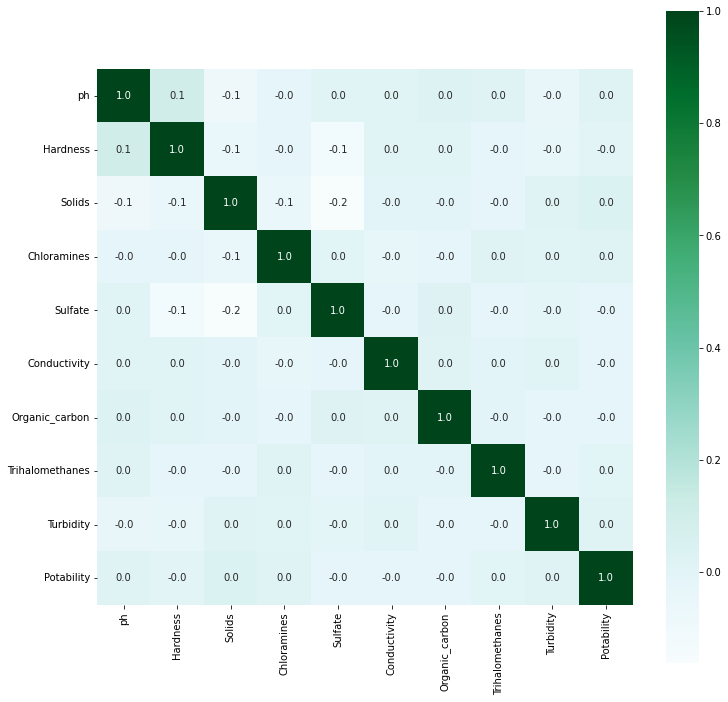

In [13]:
corr = Water_potability.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='BuGn')

In [14]:
x = Water_potability.Potability.value_counts()
labels = [0, 1]
print(x)
#out of reduced dataset majority of them are not potable(1200) and remaining are potable(811)

0    1200
1     811
Name: Potability, dtype: int64


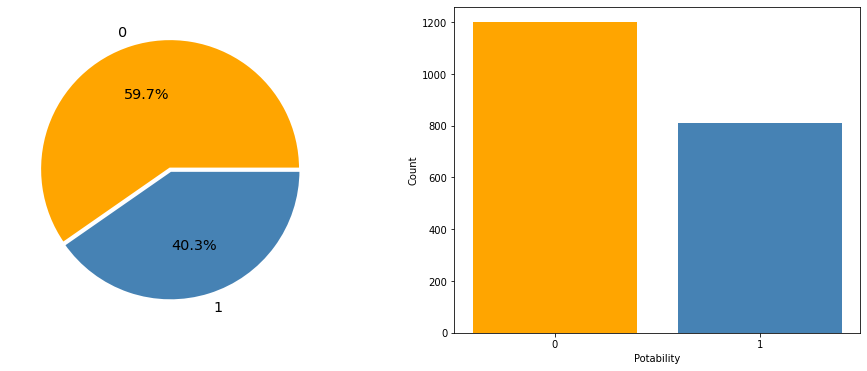

In [15]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,6))

ax[0].pie(x, 
        labels = labels,
        autopct = '%1.1f%%',
        colors=['orange', 'steelblue'], 
        explode = [0.005]*len(labels),
        textprops={'size': 'x-large'},
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})

ax[1].bar(labels,height=x,color=['orange', 'steelblue'])
ax[1].set_xlabel('Potability')
ax[1].set_ylabel('Count')
ax[1].set_xticks([0, 1])

plt.show()
#just exploring output of dataset

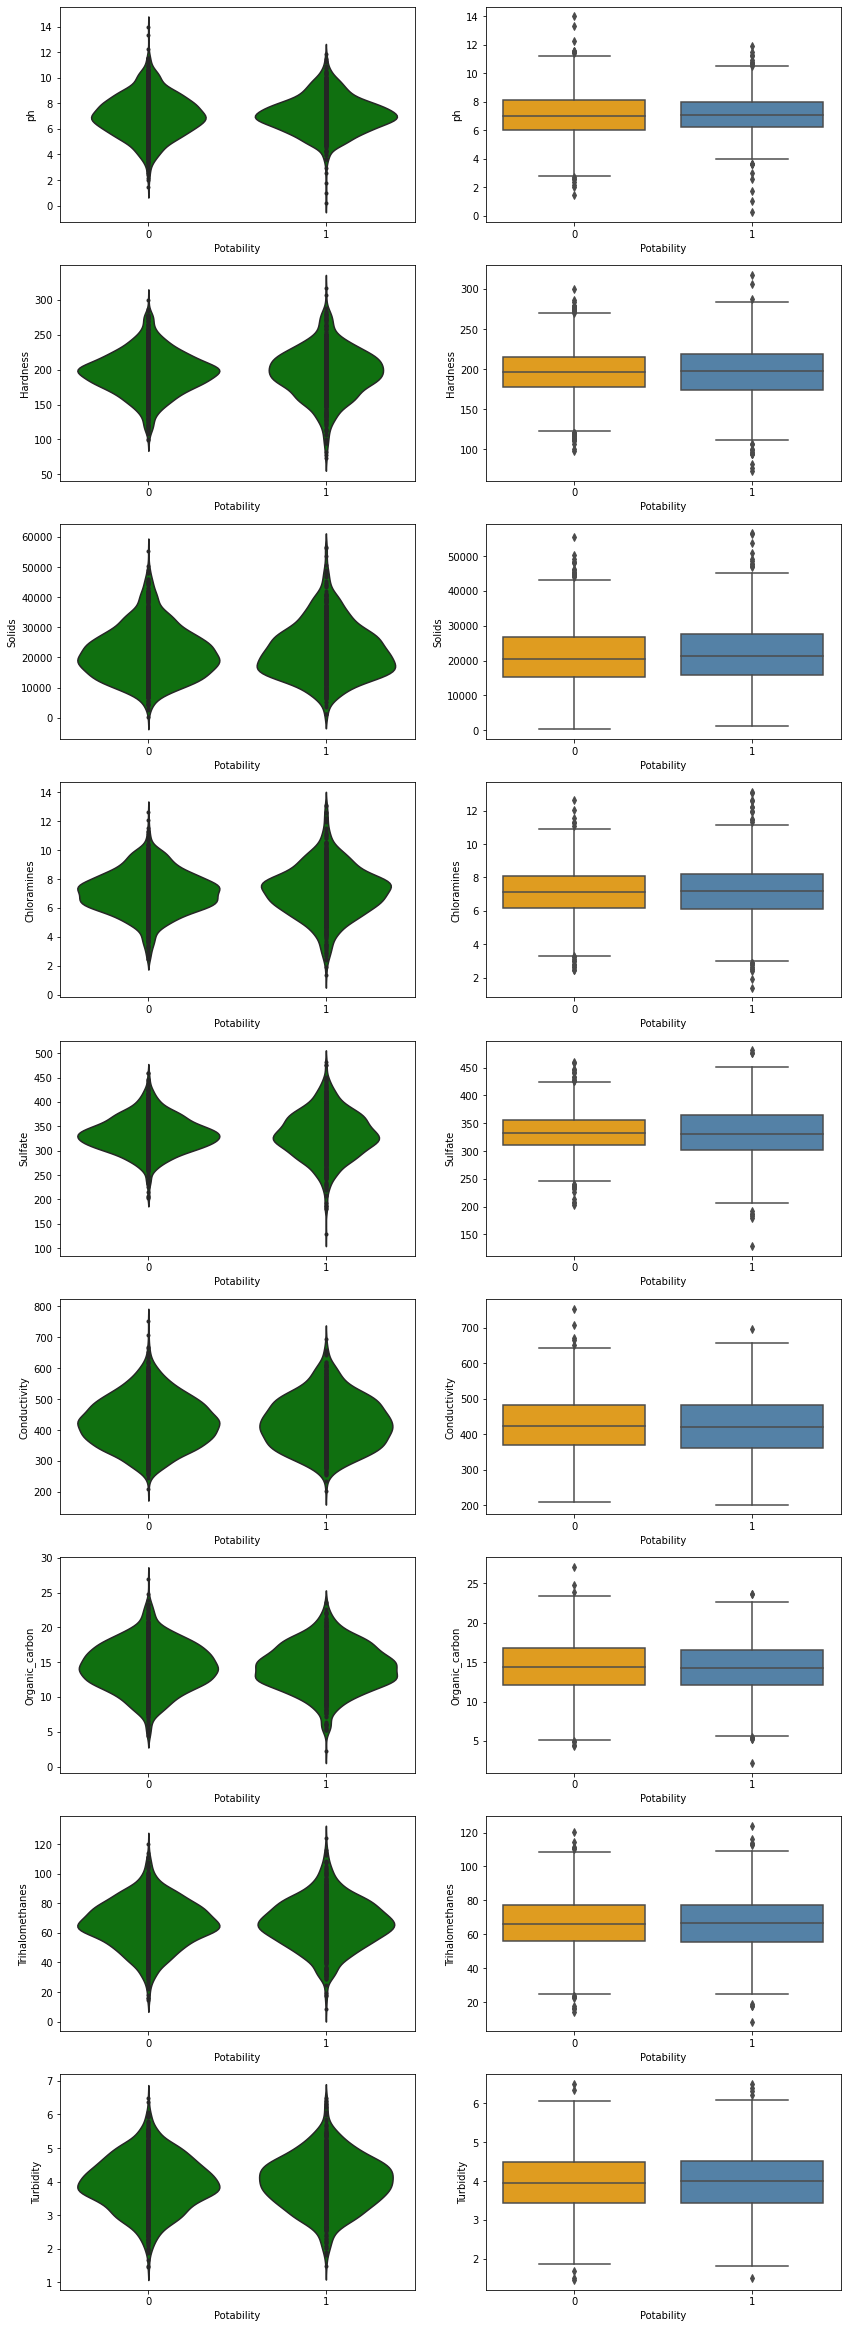

In [16]:
fig, ax = plt.subplots(ncols=2, nrows=9, figsize=(14, 42))

features = list(Water_potability.columns.drop('Potability'))
target = 'Potability'
idx = 0

for col in features:
    sns.violinplot(data=Water_potability, y=col, x=target, ax=ax[idx, 0],
                   inner='point', color='green')
    
    sns.boxplot(data=Water_potability, y=col, x=target, ax=ax[idx, 1],
                palette=('orange', 'steelblue'))
    
    idx += 1
plt.show()

***OBSERVATIONS:***
(i) PH -The pH scale determines how acidic or basic water is. The range is 0 to 14, with 7 representing neutrality. Acidity is indicated by pH values below 7, whereas baseness is shown by pH values above 7. In reality, pH is a measurement of the proportion of free hydrogen and hydroxyl ions in water. While water with more free hydroxyl ions is basic, water with more free hydrogen ions is acidic. Since chemicals in the water can change pH, pH is a crucial sign that the chemical composition of the water is changing.

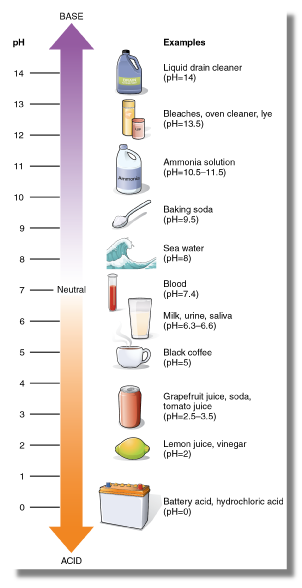

# ***It can be concluded that,there is not much impact of ph value on potability of water.with a slight variation in its value from the box plot signifies that.Acidic water are unable to drink.***


(ii) Hardness- Salts made of calcium and magnesium are the main culprits in hardness. These salts are released by the geologic formations that water passes through. How long water is exposed to a hardness-producing substance influences how hard the water is when it is in its raw state. The ability of water to form soap due to calcium and magnesium precipitation was the original definition of hardness.values less than 76 mg/L are considered as soft water.76-150 mg/L as moderately hard,151-300 mg/L as hard water and greater than 300 mg/L as very hard water

![Hardness-Chart.jpg.crdownload](data:application/octet-stream;base64,/9j/4AAQSkZJRgABAgEASABIAAD/4RN2RXhpZgAATU0AKgAAAAgABwESAAMAAAABAAEAAAEaAAUAAAABAAAAYgEbAAUAAAABAAAAagEoAAMAAAABAAIAAAExAAIAAAAUAAAAcgEyAAIAAAAUAAAAhodpAAQAAAABAAAAnAAAAMgAAABIAAAAAQAAAEgAAAABQWRvYmUgUGhvdG9zaG9wIDcuMAAyMDE3OjEwOjMxIDIyOjM3OjM5AAAAAAOgAQADAAAAAf//AACgAgAEAAAAAQAAAtqgAwAEAAAAAQAAAjcAAAAAAAAABgEDAAMAAAABAAYAAAEaAAUAAAABAAABFgEbAAUAAAABAAABHgEoAAMAAAABAAIAAAIBAAQAAAABAAABJgICAAQAAAABAAASSAAAAAAAAABIAAAAAQAAAEgAAAAB/9j/4AAQSkZJRgABAgEASABIAAD/7QAMQWRvYmVfQ00AAv/uAA5BZG9iZQBkgAAAAAH/2wCEAAwICAgJCAwJCQwRCwoLERUPDAwPFRgTExUTExgRDAwMDAwMEQwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwBDQsLDQ4NEA4OEBQODg4UFA4ODg4UEQwMDAwMEREMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDP/AABEIAGMAgAMBIgACEQEDEQH/3QAEAAj/xAE/AAABBQEBAQEBAQAAAAAAAAADAAECBAUGBwgJCgsBAAEFAQEBAQEBAAAAAAAAAAEAAgMEBQYHCAkKCxAAAQQBAwIEAgUHBggFAwwzAQACEQMEIRIxBUFRYRMicYEyBhSRobFCIyQVUsFiMzRygtFDByWSU/Dh8WNzNRaisoMmRJNUZEXCo3Q2F9JV4mXys4TD03Xj80YnlKSFtJXE1OT0pbXF1eX1VmZ2hpamtsbW5vY3R1dnd4eXp7fH1+f3EQACAgECBAQDBAUGBwcGBTUBAAIRAyExEgRBUWFxIhMFMoGRFKGxQiPBUtHwMyRi4XKCkkNTFWNzNPElBhaisoMHJjXC0kSTVKMXZEVVNnRl4vKzhMPTdePzRpSkhbSVxNTk9KW1xdXl9VZmdoaWprbG1ub2JzdHV2d3h5ent8f/2gAMAwEAAhEDEQA/AJpIf2nH59VuvmEvtGP/AKRv3rpLHcPFcJ7H7EieCUL7Rj/6Rv3qvmtoymMZ6tYG4stk6mmwellMZt/wj2bdiEpUCRR8LTGJJANgd6tuplkOx8t7Q1+dX72WjILXObve9tlVR2t/Nrb9l/cs/RWI1TLhkufdnB1Re17aW2mGtAftq+iyx21+xrnOs/WfT/S1pgykkeki+5C84QATxg0Ogl3rR0Uvis6ykn1XU5TGvsda5kuIa0Wmr6JY31Gv2VP/ADlA0XvpDLc1trnbRbNj2tIFVdW5u0f6dt9zqdvp5HrfpkTkP7v4qGIEC5V9JOoksuyrLc8GvqO1psFjxvMn3WF21z2WbK9jqG+ht9NEx/XrvZZblsfU0Wh7DY907iX0nhjfUZ9Gyz6Hp/zNFT/0iXua1wn7Qg4qF8QPhUnQS/hysqui6qs11ZFNdYrcymttrwKyfz3Pqrq+2Oc32+pc31Kf+HTVY2Syyt5z2/SY7I2ug2bG1VbnvLDv9ldjPT/P9RD3Tp6T9q72Rr6x4aS1/l/L/OOskofacf8A0jfvTfaMf/SN+9SWO4YuE9j9iRJD+0Y/+kb96X2jH/0jfvSsdwrhPY/Y/wD/0BWnM+xM+yODbtjSC4Bw0r3bdri3+cs9Ov8AkKuL+pnM+yWk+maw02NZAJdZtde61n8zsxvzGP8A55XaiPRr1/MZ/wBSEBuRnHJNbqYxxaGh/csh26z6e381jt//AAnp+l6i6GUT6TchdDTZ42JHqHDA1ZuXDxfb+khe3qjun0sHqDKZZNv6RoL2t3kfpd/83ZNbN35n+gt/m1LLyeqtcTQyA3HFljQ0OAtd6ocyt27c99b2VenU39Hs/nrP5tIXdRY0foTbc64tsDtoqazcfTdU5hbZs9FzHvc71P8APUWv6l6dcGz1NjZ3CsN9eW+sLNv0cLZv9JzP/SKZ5e5qB0/dXga2RhPql1/f+b/B/cSMPWfVabHsFYLQ9m1pJANYed7X+x72vvc/Z7GWU/of0atBzvXdqf5tv/VPQ8V1xZZ627+cd6RfAca4bs3Bv8rf/wCq1MEeu7/i2/8AVPUsImgfVr+8xTNkioih+gOEJNx8SlLuZKjuHiqNuPn2Z3qi306mS2t4LDDXWYtv8zHue1mPker62/f/AINGZlEaRMvJEIxkaJjHTeToS7xKZ7jsdqeD+RAw2W04tdd799rd298jWXve12n8hzf6iK4jY7XsfyIiyLoixsggCRAo0asfpeLMFx7kpS7xKr3se62hwb6lbCd9Ys9PU7PTu3fn+jts/R/8IqlNXV6q2VN2ltVbGxvZ7ng17vc5u+pu31vU/wDAvVTTIg1wy8wF0cYkL4og9pERdQFx4kptx8Ss1+Lm3kC4gsDudzJeGv8AUr3ta3b6f/BpberspYyvb6zTWHOL69m0Bu/ZV6e79+uze/6f8yhxn9yX2J9kfvwvzoefE6W4+JS3HxKzzV1JrWip+u3Y57nsLi4F/p3WPcw76PzrKm/rCs44yG7vXfvkNInboZfva302s9m30URIk1wyH00RLGAL4oHyPqf/0btIb6FXtH82zsP3WqcN/db9wUaQfRq/4tn/AFLUPNbacZwrFhO5m8UnbYa9zfW9F8s2v9P912//AEf6RcZVzq6s081dyq6spob+637glDf3W/cEHFbm+hQzL27zSBk2BxDxbADtrWN2f1rW2/zn82qdNPUKrsR0X2Nc55tqste5lVb3O277nW/praKRX+gtqyN9tn6JOEL4hxDTx0l83/epAu/WNPHd0ob+637goQ313e1v823sP3rESD4KEH13f8W3/qrEwHfyWiW+rKG/ut+4JQ391v3BQvGR6Fv2eBf6b/RmI9TafS3bvb/OIGE3LbSQ5ryw2+wZTybm07Wbtzm+r6lv2j1vSZY/+a/wiIjcSbGnS0jUXxDyttQ391v3BM8N2O9rfonsPBV8ZmeM3LdkfzDhWcYB25gg3Ne1jdrHNe5noWX/APCqy8HY7T80/kSkOGVWDsdP6w4lE0a4gdtj3VDf3W/cEob+637gng+CUHwTbRxeK0N/db9wSgfut+4KjkHPZlXPpba+ssYAY3NYAaw/7PQbBXk2PabrPo1W1e/+kM9CpRxW9W+2tsydzabd3qVgNLGn0cY0t+m91TG5H23+b/wv85v/AJxS+1pfHH5eKidduLhX8Ol8cdr3/B0Ib+637glDf3W/cE8HwSg+Citj4vF//9Ls8TpvTji0k4tJJrZr6bf3R/JRf2X03/uJT/223/yKJh/0Sj/i2f8AUhUOqu6iMpow7raWMouttPpC2olrXV47PbU/Ide661uRspdZ+jw/S9H9OvOBxzmY8fD8x9Rl0/utrhj+6Psbn7L6b/3Ep/7bb/5FL9l9N/7iU/8Abbf/ACKq4eZm2dKrtyKbabXMt9R8B72bN/p3ej6WNdb6zWtsqp+w+t/g7qGPVCrqHWXMx3u9aLMGp+QBQ9r6rNwGZd6T8bbdfs3+jist9X1Gf8nZNdieMWYmQ4/lPCfUfzirhh+6Psdn9l9N/wC4lP8A223/AMigt6b077ZY37LTAqZp6bf3rf5KJ0qzLtwKn5gLbju+k3a4sDnCiyyv/BW20enZbV/g7P8AB1/QRG/02z/imf8AVWqMynEziZk8Omh00krhj+6PsY/svpv/AHEp/wC22/8AkUv2X03/ALiU/wDbbf8AyKq9dyuqY9VB6dTZbN1frvqayxwr9SsWV+nZZV/PMc/9Mz1fQr9R/wDwiJ1bJzKsHIfjVvbbWWem9rRZuBcz1NjKxfY3Y0v32fZrvS/nmYuX/M2ujHIRAif84eEer5dYx9X+Mrhj+6PsTfsvpv8A3Ep/7bb/AORULemdNFTyMWmdp/wbfD+qs8Z/VSOlODLS95bXnUmpzCS5tLjcbTRZSyuhr32PZ6mJ6v8AMs/Wafsi2bv5mz+qfyJTGSBjc74r2kf0ZcKhGJ/RH2IB0zpsf0Sn/ttv/kU/7L6b/wBxKf8Attv/AJFA6xkZmPTj2Yge8i5gtqrYXvsZDt1Vb/Ttqoc5239LkelR/gvtWJ6v2mvFu+sPUsU1YeQPTyMneK7LW7XOhuM1jcenYzdY+/K9Or+f33M9P/in4sObKAYTu704jxen5lGMB+iPseg/ZfTf+4lP/bbf/Ip/2X03/uJT/wBtt/8AIrI+3/WEkUmoNe0MaLBTZte/1MNz7HWODmU0ejlW1XM2b/0ORdj2fobPSKOqdYy+nY2ZhYzBZfY8GmwvaBW2u33PtbRe7+lV/oXNp2X1el/pEjhzUD7gomr4/Dij/jIqH7o+x0v2X03/ALiU/wDbbf8AyKX7L6b/ANxKf+22/wDkVlYvVutPspxziPcdtPrXWVPrAcarbslo/wAE52+mqtjv0VdNmT6ditdAzM/Nqybs1jqibW+jW+t9W1pox32Ma25rLLPTynZDPW/P/wCghPFmgJEz+UA6S/f+VVQ/dH2P/9Ppsay77NT+ls/m2fnH91qJ6l3+ls/zihY39Hp/4tn/AFLVkjq+YS17fTtYzKvodVUybbQyyuvF9Blln0Nj9+Tcz1P9N6fprgo4pTlLhrQ9fr/3rsHgiBcRqOzt+pd/pbP84pepd/pbP84rO6dnZF2ObLh9pPqsY2zHr2CHsqtfuZbZ9DFstfTdYx/+D/m/V9RV8zqebTm3Y7LKmUjZGQ6o2CokXudXaKrvf6j6aKq/W+zf0j9H6yIwSMjHS46/y/S/SVeOgeEa+Ds+pd/pbP8AOKGLLvtTv0tn80z84/vWrO6R1HOzbbBl0iiGlxx9rg+hwsfQ2i61/tudfUz7Uz2Vez/g/TV8f0p3/FM/6q1NnjOOUoyqwOmqQISAIiN+yb1Lv9LZ/nFL1Lv9LZ/nFZZ6lezrhw7NrcJrGlztjt24sNu71N30d22vf6P2b/A/aPtn6BS6dm5b8e05TfXyKrAx32Zo9Mh0QKHus/S+g0/rG/ZbX/o0TgkI8WmojL6ZPlQDjuuEdenZ0vUu/wBLZ/nFRssu9N/6Wz6Lvzj4LNzuo20X5lLbGsGPjV5FZbUbX7i+yt9Pp72+s63bT6e3Z6frK8BcMUDILTeKv0xZozft/S+nM/o9/wBBA4zERJr1VX2cX/dJHASQIjTwTepd/pbP84pepd/pX/5yj2TjlR/RdwR/dH2L+pd/pbP84pepd/pbP84rFy+t5uJXZacQ2Nrruc1urfUdXkfZ6msez13Vbsf3fpqv0lqnkdXyx9n9LHaxuTexjHWOdv8AS9XHptPoir+kbciz9D6v6OmqzJ9X/Bqb7tk00jUiYg3HePzLOLHr6dv6rr+pd/pbP84pepd/pbP84pklCv4I/uj7H//UzKvrJ1wVMAyyAGgAenVwBH+iRP8AnN1885rv+26v/SSya/5tvwH5FImAT+VYB5fBf81j/wASD6JHkuV4QThx7fuh0z9ZevHnMJ/63V/6SS/5zdf/AO5rtOP0dX/pJYH29wAlgmdrhOoJLxu/qN9P3/8AqNHpv9Qhpb7vdJGrfa70/pJx5PEBrhx/4kGKEPh+QiMccL8YV/Vdj/nL17/uYdOP0dX/AKSUB9Y+ueq532sztaJ9OriXn/Reaz1EfzjvgPyuTRy+HX9Vj/xIMp5Llbj+px7/ALo7Or/zm6/EfbHR4enV/wCkkj9ZevHnMJ/63V/6SWYq5yXy4AN3NtFYEzMhr/D81jtyI5XCdsWP/EgtyctyeOjLDDXaoW7f/Obr8R9sdH/F1f8ApJM76yddLSDlmCCP5ur/ANJLLrsFgJAIgluojgwnd9E/BD7vhB/msf8AiQXfc+UMbGHGQRvwh1P+cvXf+5Z/7bq/9JJf85eu/wDcw/8AbdX/AKRWYqxzQ1xa5hJaS1zW6un3OZp/LrZ6iI5XEdsOP/EgtycvyWOuPFjjxbeh3B9ZuvjjMcP+t1f+kkv+c3X9f1x2vP6Or/0ksYZTC9te1wc8kM412k73c/m7UP7c0AuewtA3RqDO1zm+z/M3I/dMX+Zx/wCJBYcfw8b48f8Aifu8MvV/jwd3/nL13/uYf+26v/SKX/OXr3/cw/8AbdX/AKRWI7MaCA1pkvDdYiN/oud9JWEDy2Ib4sf+JBfDluSmSI4sZqj8n72z/9Xl2b9jfpcD93wSfv2O+lwfpbI/tLkklk9f0X0EfL/l9vo9O3ftZ9D+aPGyPzfof8Ai1b/SZz9EfQ2bePzP5K5NJE/4P1WQ3/yu36L13v8A5f8A0Ew3+ofpcD93xcuSSQ/xF53H+6N3rvf/AC/+gg0797/o/TP0Nk8H6f8Awi5dJIbH5US+aP8APb/pfN/gPXe/+X/0Ejvg/T4/kLkUkv8AEXHb/wAEPXe/+X/0UK7f6dn0fpN+nsj83+c/lfuf2FyySQ3/AEfotn8p/nuvz/Ls9X7vVbzMO/dnlv0f+/qNm/0zxyPpbNv0v9f+uLlkke3yoO0v53+Uf0/5fI9U7fvZxy7nZPP5n/f0T3/y/wDoLkUkD/gpj1/n/p5dX//Z/+0YOFBob3Rvc2hvcCAzLjAAOEJJTQQlAAAAAAAQAAAAAAAAAAAAAAAAAAAAADhCSU0D7QAAAAAAEABIAAAAAQABAEgAAAABAAE4QklNBCYAAAAAAA4AAAAAAAAAAAAAP4AAADhCSU0EDQAAAAAABAAAAHg4QklNBBkAAAAAAAQAAAAeOEJJTQPzAAAAAAAJAAAAAAAAAAABADhCSU0ECgAAAAAAAQAAOEJJTScQAAAAAAAKAAEAAAAAAAAAAThCSU0D9QAAAAAASAAvZmYAAQBsZmYABgAAAAAAAQAvZmYAAQChmZoABgAAAAAAAQAyAAAAAQBaAAAABgAAAAAAAQA1AAAAAQAtAAAABgAAAAAAAThCSU0D+AAAAAAAcAAA/////////////////////////////wPoAAAAAP////////////////////////////8D6AAAAAD/////////////////////////////A+gAAAAA/////////////////////////////wPoAAA4QklNBAAAAAAAAAIAAThCSU0EAgAAAAAABAAAAAA4QklNBAgAAAAAABAAAAABAAACQAAAAkAAAAAAOEJJTQQeAAAAAAAEAAAAADhCSU0EGgAAAAADUQAAAAYAAAAAAAAAAAAAAjcAAALaAAAADgBIAGEAcgBkAG4AZQBzAHMAIABDAGgAYQByAHQAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAtoAAAI3AAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAEAAAAAAABudWxsAAAAAgAAAAZib3VuZHNPYmpjAAAAAQAAAAAAAFJjdDEAAAAEAAAAAFRvcCBsb25nAAAAAAAAAABMZWZ0bG9uZwAAAAAAAAAAQnRvbWxvbmcAAAI3AAAAAFJnaHRsb25nAAAC2gAAAAZzbGljZXNWbExzAAAAAU9iamMAAAABAAAAAAAFc2xpY2UAAAASAAAAB3NsaWNlSURsb25nAAAAAAAAAAdncm91cElEbG9uZwAAAAAAAAAGb3JpZ2luZW51bQAAAAxFU2xpY2VPcmlnaW4AAAANYXV0b0dlbmVyYXRlZAAAAABUeXBlZW51bQAAAApFU2xpY2VUeXBlAAAAAEltZyAAAAAGYm91bmRzT2JqYwAAAAEAAAAAAABSY3QxAAAABAAAAABUb3AgbG9uZwAAAAAAAAAATGVmdGxvbmcAAAAAAAAAAEJ0b21sb25nAAACNwAAAABSZ2h0bG9uZwAAAtoAAAADdXJsVEVYVAAAAAEAAAAAAABudWxsVEVYVAAAAAEAAAAAAABNc2dlVEVYVAAAAAEAAAAAAAZhbHRUYWdURVhUAAAAAQAAAAAADmNlbGxUZXh0SXNIVE1MYm9vbAEAAAAIY2VsbFRleHRURVhUAAAAAQAAAAAACWhvcnpBbGlnbmVudW0AAAAPRVNsaWNlSG9yekFsaWduAAAAB2RlZmF1bHQAAAAJdmVydEFsaWduZW51bQAAAA9FU2xpY2VWZXJ0QWxpZ24AAAAHZGVmYXVsdAAAAAtiZ0NvbG9yVHlwZWVudW0AAAARRVNsaWNlQkdDb2xvclR5cGUAAAAATm9uZQAAAAl0b3BPdXRzZXRsb25nAAAAAAAAAApsZWZ0T3V0c2V0bG9uZwAAAAAAAAAMYm90dG9tT3V0c2V0bG9uZwAAAAAAAAALcmlnaHRPdXRzZXRsb25nAAAAAAA4QklNBBEAAAAAAAEBADhCSU0EFAAAAAAABAAAAAI4QklNBAwAAAAAEmQAAAABAAAAgAAAAGMAAAGAAACUgAAAEkgAGAAB/9j/4AAQSkZJRgABAgEASABIAAD/7QAMQWRvYmVfQ00AAv/uAA5BZG9iZQBkgAAAAAH/2wCEAAwICAgJCAwJCQwRCwoLERUPDAwPFRgTExUTExgRDAwMDAwMEQwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwBDQsLDQ4NEA4OEBQODg4UFA4ODg4UEQwMDAwMEREMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDP/AABEIAGMAgAMBIgACEQEDEQH/3QAEAAj/xAE/AAABBQEBAQEBAQAAAAAAAAADAAECBAUGBwgJCgsBAAEFAQEBAQEBAAAAAAAAAAEAAgMEBQYHCAkKCxAAAQQBAwIEAgUHBggFAwwzAQACEQMEIRIxBUFRYRMicYEyBhSRobFCIyQVUsFiMzRygtFDByWSU/Dh8WNzNRaisoMmRJNUZEXCo3Q2F9JV4mXys4TD03Xj80YnlKSFtJXE1OT0pbXF1eX1VmZ2hpamtsbW5vY3R1dnd4eXp7fH1+f3EQACAgECBAQDBAUGBwcGBTUBAAIRAyExEgRBUWFxIhMFMoGRFKGxQiPBUtHwMyRi4XKCkkNTFWNzNPElBhaisoMHJjXC0kSTVKMXZEVVNnRl4vKzhMPTdePzRpSkhbSVxNTk9KW1xdXl9VZmdoaWprbG1ub2JzdHV2d3h5ent8f/2gAMAwEAAhEDEQA/AJpIf2nH59VuvmEvtGP/AKRv3rpLHcPFcJ7H7EieCUL7Rj/6Rv3qvmtoymMZ6tYG4stk6mmwellMZt/wj2bdiEpUCRR8LTGJJANgd6tuplkOx8t7Q1+dX72WjILXObve9tlVR2t/Nrb9l/cs/RWI1TLhkufdnB1Re17aW2mGtAftq+iyx21+xrnOs/WfT/S1pgykkeki+5C84QATxg0Ogl3rR0Uvis6ykn1XU5TGvsda5kuIa0Wmr6JY31Gv2VP/ADlA0XvpDLc1trnbRbNj2tIFVdW5u0f6dt9zqdvp5HrfpkTkP7v4qGIEC5V9JOoksuyrLc8GvqO1psFjxvMn3WF21z2WbK9jqG+ht9NEx/XrvZZblsfU0Wh7DY907iX0nhjfUZ9Gyz6Hp/zNFT/0iXua1wn7Qg4qF8QPhUnQS/hysqui6qs11ZFNdYrcymttrwKyfz3Pqrq+2Oc32+pc31Kf+HTVY2Syyt5z2/SY7I2ug2bG1VbnvLDv9ldjPT/P9RD3Tp6T9q72Rr6x4aS1/l/L/OOskofacf8A0jfvTfaMf/SN+9SWO4YuE9j9iRJD+0Y/+kb96X2jH/0jfvSsdwrhPY/Y/wD/0BWnM+xM+yODbtjSC4Bw0r3bdri3+cs9Ov8AkKuL+pnM+yWk+maw02NZAJdZtde61n8zsxvzGP8A55XaiPRr1/MZ/wBSEBuRnHJNbqYxxaGh/csh26z6e381jt//AAnp+l6i6GUT6TchdDTZ42JHqHDA1ZuXDxfb+khe3qjun0sHqDKZZNv6RoL2t3kfpd/83ZNbN35n+gt/m1LLyeqtcTQyA3HFljQ0OAtd6ocyt27c99b2VenU39Hs/nrP5tIXdRY0foTbc64tsDtoqazcfTdU5hbZs9FzHvc71P8APUWv6l6dcGz1NjZ3CsN9eW+sLNv0cLZv9JzP/SKZ5e5qB0/dXga2RhPql1/f+b/B/cSMPWfVabHsFYLQ9m1pJANYed7X+x72vvc/Z7GWU/of0atBzvXdqf5tv/VPQ8V1xZZ627+cd6RfAca4bs3Bv8rf/wCq1MEeu7/i2/8AVPUsImgfVr+8xTNkioih+gOEJNx8SlLuZKjuHiqNuPn2Z3qi306mS2t4LDDXWYtv8zHue1mPker62/f/AINGZlEaRMvJEIxkaJjHTeToS7xKZ7jsdqeD+RAw2W04tdd799rd298jWXve12n8hzf6iK4jY7XsfyIiyLoixsggCRAo0asfpeLMFx7kpS7xKr3se62hwb6lbCd9Ys9PU7PTu3fn+jts/R/8IqlNXV6q2VN2ltVbGxvZ7ng17vc5u+pu31vU/wDAvVTTIg1wy8wF0cYkL4og9pERdQFx4kptx8Ss1+Lm3kC4gsDudzJeGv8AUr3ta3b6f/BpberspYyvb6zTWHOL69m0Bu/ZV6e79+uze/6f8yhxn9yX2J9kfvwvzoefE6W4+JS3HxKzzV1JrWip+u3Y57nsLi4F/p3WPcw76PzrKm/rCs44yG7vXfvkNInboZfva302s9m30URIk1wyH00RLGAL4oHyPqf/0btIb6FXtH82zsP3WqcN/db9wUaQfRq/4tn/AFLUPNbacZwrFhO5m8UnbYa9zfW9F8s2v9P912//AEf6RcZVzq6s081dyq6spob+637glDf3W/cEHFbm+hQzL27zSBk2BxDxbADtrWN2f1rW2/zn82qdNPUKrsR0X2Nc55tqste5lVb3O277nW/praKRX+gtqyN9tn6JOEL4hxDTx0l83/epAu/WNPHd0ob+637goQ313e1v823sP3rESD4KEH13f8W3/qrEwHfyWiW+rKG/ut+4JQ391v3BQvGR6Fv2eBf6b/RmI9TafS3bvb/OIGE3LbSQ5ryw2+wZTybm07Wbtzm+r6lv2j1vSZY/+a/wiIjcSbGnS0jUXxDyttQ391v3BM8N2O9rfonsPBV8ZmeM3LdkfzDhWcYB25gg3Ne1jdrHNe5noWX/APCqy8HY7T80/kSkOGVWDsdP6w4lE0a4gdtj3VDf3W/cEob+637gng+CUHwTbRxeK0N/db9wSgfut+4KjkHPZlXPpba+ssYAY3NYAaw/7PQbBXk2PabrPo1W1e/+kM9CpRxW9W+2tsydzabd3qVgNLGn0cY0t+m91TG5H23+b/wv85v/AJxS+1pfHH5eKidduLhX8Ol8cdr3/B0Ib+637glDf3W/cE8HwSg+Citj4vF//9Ls8TpvTji0k4tJJrZr6bf3R/JRf2X03/uJT/223/yKJh/0Sj/i2f8AUhUOqu6iMpow7raWMouttPpC2olrXV47PbU/Ide661uRspdZ+jw/S9H9OvOBxzmY8fD8x9Rl0/utrhj+6Psbn7L6b/3Ep/7bb/5FL9l9N/7iU/8Abbf/ACKq4eZm2dKrtyKbabXMt9R8B72bN/p3ej6WNdb6zWtsqp+w+t/g7qGPVCrqHWXMx3u9aLMGp+QBQ9r6rNwGZd6T8bbdfs3+jist9X1Gf8nZNdieMWYmQ4/lPCfUfzirhh+6Psdn9l9N/wC4lP8A223/AMigt6b077ZY37LTAqZp6bf3rf5KJ0qzLtwKn5gLbju+k3a4sDnCiyyv/BW20enZbV/g7P8AB1/QRG/02z/imf8AVWqMynEziZk8Omh00krhj+6PsY/svpv/AHEp/wC22/8AkUv2X03/ALiU/wDbbf8AyKq9dyuqY9VB6dTZbN1frvqayxwr9SsWV+nZZV/PMc/9Mz1fQr9R/wDwiJ1bJzKsHIfjVvbbWWem9rRZuBcz1NjKxfY3Y0v32fZrvS/nmYuX/M2ujHIRAif84eEer5dYx9X+Mrhj+6PsTfsvpv8A3Ep/7bb/AORULemdNFTyMWmdp/wbfD+qs8Z/VSOlODLS95bXnUmpzCS5tLjcbTRZSyuhr32PZ6mJ6v8AMs/Wafsi2bv5mz+qfyJTGSBjc74r2kf0ZcKhGJ/RH2IB0zpsf0Sn/ttv/kU/7L6b/wBxKf8Attv/AJFA6xkZmPTj2Yge8i5gtqrYXvsZDt1Vb/Ttqoc5239LkelR/gvtWJ6v2mvFu+sPUsU1YeQPTyMneK7LW7XOhuM1jcenYzdY+/K9Or+f33M9P/in4sObKAYTu704jxen5lGMB+iPseg/ZfTf+4lP/bbf/Ip/2X03/uJT/wBtt/8AIrI+3/WEkUmoNe0MaLBTZte/1MNz7HWODmU0ejlW1XM2b/0ORdj2fobPSKOqdYy+nY2ZhYzBZfY8GmwvaBW2u33PtbRe7+lV/oXNp2X1el/pEjhzUD7gomr4/Dij/jIqH7o+x0v2X03/ALiU/wDbbf8AyKX7L6b/ANxKf+22/wDkVlYvVutPspxziPcdtPrXWVPrAcarbslo/wAE52+mqtjv0VdNmT6ditdAzM/Nqybs1jqibW+jW+t9W1pox32Ma25rLLPTynZDPW/P/wCghPFmgJEz+UA6S/f+VVQ/dH2P/9Ppsay77NT+ls/m2fnH91qJ6l3+ls/zihY39Hp/4tn/AFLVkjq+YS17fTtYzKvodVUybbQyyuvF9Blln0Nj9+Tcz1P9N6fprgo4pTlLhrQ9fr/3rsHgiBcRqOzt+pd/pbP84pepd/pbP84rO6dnZF2ObLh9pPqsY2zHr2CHsqtfuZbZ9DFstfTdYx/+D/m/V9RV8zqebTm3Y7LKmUjZGQ6o2CokXudXaKrvf6j6aKq/W+zf0j9H6yIwSMjHS46/y/S/SVeOgeEa+Ds+pd/pbP8AOKGLLvtTv0tn80z84/vWrO6R1HOzbbBl0iiGlxx9rg+hwsfQ2i61/tudfUz7Uz2Vez/g/TV8f0p3/FM/6q1NnjOOUoyqwOmqQISAIiN+yb1Lv9LZ/nFL1Lv9LZ/nFZZ6lezrhw7NrcJrGlztjt24sNu71N30d22vf6P2b/A/aPtn6BS6dm5b8e05TfXyKrAx32Zo9Mh0QKHus/S+g0/rG/ZbX/o0TgkI8WmojL6ZPlQDjuuEdenZ0vUu/wBLZ/nFRssu9N/6Wz6Lvzj4LNzuo20X5lLbGsGPjV5FZbUbX7i+yt9Pp72+s63bT6e3Z6frK8BcMUDILTeKv0xZozft/S+nM/o9/wBBA4zERJr1VX2cX/dJHASQIjTwTepd/pbP84pepd/pX/5yj2TjlR/RdwR/dH2L+pd/pbP84pepd/pbP84rFy+t5uJXZacQ2Nrruc1urfUdXkfZ6msez13Vbsf3fpqv0lqnkdXyx9n9LHaxuTexjHWOdv8AS9XHptPoir+kbciz9D6v6OmqzJ9X/Bqb7tk00jUiYg3HePzLOLHr6dv6rr+pd/pbP84pepd/pbP84pklCv4I/uj7H//UzKvrJ1wVMAyyAGgAenVwBH+iRP8AnN1885rv+26v/SSya/5tvwH5FImAT+VYB5fBf81j/wASD6JHkuV4QThx7fuh0z9ZevHnMJ/63V/6SS/5zdf/AO5rtOP0dX/pJYH29wAlgmdrhOoJLxu/qN9P3/8AqNHpv9Qhpb7vdJGrfa70/pJx5PEBrhx/4kGKEPh+QiMccL8YV/Vdj/nL17/uYdOP0dX/AKSUB9Y+ueq532sztaJ9OriXn/Reaz1EfzjvgPyuTRy+HX9Vj/xIMp5Llbj+px7/ALo7Or/zm6/EfbHR4enV/wCkkj9ZevHnMJ/63V/6SWYq5yXy4AN3NtFYEzMhr/D81jtyI5XCdsWP/EgtyctyeOjLDDXaoW7f/Obr8R9sdH/F1f8ApJM76yddLSDlmCCP5ur/ANJLLrsFgJAIgluojgwnd9E/BD7vhB/msf8AiQXfc+UMbGHGQRvwh1P+cvXf+5Z/7bq/9JJf85eu/wDcw/8AbdX/AKRWYqxzQ1xa5hJaS1zW6un3OZp/LrZ6iI5XEdsOP/EgtycvyWOuPFjjxbeh3B9ZuvjjMcP+t1f+kkv+c3X9f1x2vP6Or/0ksYZTC9te1wc8kM412k73c/m7UP7c0AuewtA3RqDO1zm+z/M3I/dMX+Zx/wCJBYcfw8b48f8Aifu8MvV/jwd3/nL13/uYf+26v/SKX/OXr3/cw/8AbdX/AKRWI7MaCA1pkvDdYiN/oud9JWEDy2Ib4sf+JBfDluSmSI4sZqj8n72z/9Xl2b9jfpcD93wSfv2O+lwfpbI/tLkklk9f0X0EfL/l9vo9O3ftZ9D+aPGyPzfof8Ai1b/SZz9EfQ2bePzP5K5NJE/4P1WQ3/yu36L13v8A5f8A0Ew3+ofpcD93xcuSSQ/xF53H+6N3rvf/AC/+gg0797/o/TP0Nk8H6f8Awi5dJIbH5US+aP8APb/pfN/gPXe/+X/0Ejvg/T4/kLkUkv8AEXHb/wAEPXe/+X/0UK7f6dn0fpN+nsj83+c/lfuf2FyySQ3/AEfotn8p/nuvz/Ls9X7vVbzMO/dnlv0f+/qNm/0zxyPpbNv0v9f+uLlkke3yoO0v53+Uf0/5fI9U7fvZxy7nZPP5n/f0T3/y/wDoLkUkD/gpj1/n/p5dX//ZOEJJTQQhAAAAAABVAAAAAQEAAAAPAEEAZABvAGIAZQAgAFAAaABvAHQAbwBzAGgAbwBwAAAAEwBBAGQAbwBiAGUAIABQAGgAbwB0AG8AcwBoAG8AcAAgADcALgAwAAAAAQA4QklNBAYAAAAAAAcABgEBAAMBAP/hEkhodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjw/YWRvYmUteGFwLWZpbHRlcnMgZXNjPSJDUiI/Pgo8eDp4YXBtZXRhIHhtbG5zOng9J2Fkb2JlOm5zOm1ldGEvJyB4OnhhcHRrPSdYTVAgdG9vbGtpdCAyLjguMi0zMywgZnJhbWV3b3JrIDEuNSc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIycgeG1sbnM6aVg9J2h0dHA6Ly9ucy5hZG9iZS5jb20vaVgvMS4wLyc+CgogPHJkZjpEZXNjcmlwdGlvbiBhYm91dD0ndXVpZDphMWI2YmJmOC1iZTJlLTExZTctYWIxZC1iMTM1YmI5MGJlNTEnCiAgeG1sbnM6eGFwTU09J2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8nPgogIDx4YXBNTTpEb2N1bWVudElEPmFkb2JlOmRvY2lkOnBob3Rvc2hvcDphMWI2YmJmMy1iZTJlLTExZTctYWIxZC1iMTM1YmI5MGJlNTE8L3hhcE1NOkRvY3VtZW50SUQ+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCjwvcmRmOlJERj4KPC94OnhhcG1ldGE+CiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAo8P3hwYWNrZXQgZW5kPSd3Jz8+/+4AJkFkb2JlAGRAAAAAAQMAFQQDBgoNAAAAAAAAAAAAAAAAAAAAAP/bAIQAAgICAgICAgICAgMCAgIDBAMCAgMEBQQEBAQEBQYFBQUFBQUGBgcHCAcHBgkJCgoJCQwMDAwMDAwMDAwMDAwMDAEDAwMFBAUJBgYJDQoJCg0PDg4ODg8PDAwMDAwPDwwMDAwMDA8MDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM/8IAEQgCNwLaAwERAAIRAQMRAf/EATIAAQADAQEBAQEAAAAAAAAAAAAFBgcIBAMCAQEBAAMBAQEBAQAAAAAAAAAAAAQFBgMCBwEIEAAABgADBQcDBAICAgMBAAAAAQIDBAUTFAYgERIzFTBAUDI0NRYQMQchIiM2JBdBQ2CARCUmNxEAAAQDAwUHEAYGCAQDCQAAAQIDBAARBSES0zFBMhOUUWEiMzR0lRAgMEBxgZGhstJzk7MUNQZQsUIjtHXBUmJykhXw0fGCosJDJOFTg8NEJRZggGOjVGSkNgcSAAECAgQJCwQBBAICAwEAAAEAAhHRMUESkhDwIVFxkbEyAyAwQGGBoeEiQnIzUMGyE8LxgiMEUmJgFICQ0kMTAQABAwMCBAcBAQEBAQAAAAERACExQVFh8HEQgaGxIDBAkcHR8VBg4ZCA/9oADAMBAwIRAxEAAAH6/UvgQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqMC2t0+ppVddXWxpapCtbXNqh8/Pv5PXp9cgABVYVpaptXVYVpaptWAAKzX2X3leJ/tAAAAAAzin0UhJ4XefSAAZ3U6HRLbPAAAAAAAAAAAAAAAAAAAAAAAYPmd1sd1kOWst9O6q1ny7Lq7TyP5G/Pv19OPmgxr3b7zFZrVaPUrzMZ7S6Cx2FddJ1NiGd2236LE4fnNtqVvmM2q9FpVznKlWW3p78/hx90aru9P0eZqVRbf3r+a7d5PJaLVz02B7PzlV49ndplLnlfoNkv8AH+GH3xWp2ey3WP8ALy6ZtVaPRrbPZ7VX94taXPKa/wBevMnlNPqNGuM9YZFeAAAAAAAAAAAAAAAAAAAAAMpz+phPM33euPk89dUvsvQaW9zOr0m+6DCV1YUOlvbDLr3VDQ5m+6jBjnjJ/QbLNrafCt9tvsXQKy+8Lv5OHXfNNhMMz23tvaplbOLm9Do5v3BkJnCjwbv5+f25y6f1yOX15+Yz8k61d5T+vzMqTS1CLbfd43XSYiAizs6q9DCcJsh6j/Hn7kJPDxeO25aLEAAAAAAAAAAAAAAAAAAAAACPjSOW8p9O6m1nzDlbI/UOttp8p5syX0bxee3ROl+fYbSba3yKnyfnXQLehzek0W3aTFDEM7ttv0WJw/ObaR9R/N+9Pj+e3ht2kxfO2S+g/V41LR5ihUt7L/sSyWtdmlPpLpY0318ec1rNHq1vlsuptPvGswqP+5ZU6eH4zJ3pA87p6/3lF/kry8+nu/eNik10FynXezpblNpwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABWodl9PXkAAAAAAAAAAAAAAfPz6+nryAAAAAAAAAAAPn59fT15AAAAAAAAAAAAAAAAAFhlV4AAAAAAAAAAAAAAr0WwsMqvAAAAAAAAAAAFei2FhlV4AAAAAAAAAAAAAAAAFei2FhlV4AAAFMqbmueLG+2lDM9YYxHNbX2SeOxXmQAAAAAAFei2FhlV4AAAAAAAAAAAr0WwsMqvAAAAAAAAAAAAAAAAAr0WwsMqvFNq7ihwr3x8u3v7x7fJqc8q9Bp1/mqbV3Fn61kpZRrRIqxzTjfpGkXecvFlSy3WJj2e10Zzk6DaUOf119NSIfm4dInlLkesexz67RLLPAV6LYWGVXgAAAAAAAAAACvRbCwyq8AAAAAAAAAAAAAAAACvRbCwyq8Z5S6Cy3Fdm9Foh+/H5H+e+w3+RzKo0tj9V0pZRrRIq6jV21Q429MqLjW9NlLrLpcTz+00GbQUOFe2OxrqxW2Xq6c573AsFtAzyk0GzX+OAr0WwsMqvAAAAAAAAAAAFei2FhlV4AAAAAAAAAAAAAAAAFei2FhlV4rsKwk5ketwbEUSpvPz+fte42G8ajDfKN6zas0Wi3GfnOsHIaLWy8iJ7+/C/WNDguY3cvIiXabS5RWanTLbN/f98e/wDY8jL4V2FYXOfTAV6LYWGVXgAAAAAAAAAACvRbCwyq8AAAAAAAAAAAAAAAACvRbCwyq8AAViDZ0uDc6Lb56W6xAAAAKzEs7NLrPBw7+f11l+sMAAAV6LYWGVXgAAAAAAAAAACvRbCwyq8AAAAAAAAAAAAAAAACvRbCwyq8AAAAAAAAAAAAAAV6LYWGVXgAAACs19l95XjycOtqm1dVhWlqm1YAAAFei2FhlV4FehWFGgXeiWWfr/ifdptKAAPz5/aNAu/Nw6/z9TMyJbJdSAB4ufeMjSfp38znaCAAABXothYZVeAAAABn1RoK9wn67fZP6vAz6o0Fe4T9WustlVJqPb346TZ53JqPVXi2pbZLqQABXothYZVeAAABm9No6NV3en6PM0Knvtv0WJw/ObbcNHiQAAAK9FsLDKrx8efvAM3vd70mErFdZ1j8s/Ry5fn36vk+iy6o02n3OazOm0mkXWdgYE7Ec/tN10eI9HfnBwZvl9dZrpDqUO10Czoee8tvt40mHlZcSmVVz4PzvqFrmcsqNP7u3DUrjMACvRbCwyq8ACrwLTPKy/0+6zWYUul1m/yv94fmU1uq2S6x9YhWefVl9pFtnc7r9Dsl1j8eoNdqt9l6NTXctZRI6FJheczXbvJAACvRbCwyq8AAAfzz+4Zntvbe1TK2cXEcrtL9a0UPxl71pcKAAABXothYZVeIWDNzWJo9kucfEwZeex9Aj/mZ1ek2+8xdMj3Ghz8/ltXp9o0GOx/Pa3+fv7rVrlM6h6GI4y9svsXRqu8zem0WpaTMUSnvLzLpIX8meX96znmF4P3tEpfhh99y0uIAFei2FhlV4AFAqb6hVd7drmmrFbZahe5r6cPGdRNDr1xkqBU31Cq72yWFd8fXvXrjJYnnNps+jx1Fprv32HD3eOOT02q3rS4QAAV6LYWGVXgAAA/edsl9B+rxqWjzFCp77b9FicPzm23DR4kAAACvRbCwyq8fz8/eespv7HNr7RIq4JOodPe+Lz23TQ4jLaXT3W2pqzW2Votays1ll+f391q1ymexr+m1NxdLSmrNfZfHn70vRZzKM3qdCsqD2TOObU2i9P7z1S3y9T520RBlbfpMUAK9FsLDKrwAKJVXtSg2tws6inV1xp13mZvtCyWg1fl/Os/KgVyFY6Dd0FMqLjy/nXR7fO5jT6X2duWi2OezOo0lqsau+WFEAAK9FsLDKrwAAAAAAAAAABXothYZVeAAAAAAAAAAAAAAAABR8top3tCAAAAAAAAAAAAAAEFxmzvaEAAAAAAAAAAAILjNne0IAAAAAAAAAAAAAAAACx/zboLNAiAAAAAAAAAAAAAACsz5dmgRAAAAAAAAAAABWZ8uzQIgAAAAAAAAAAAAAAAAFZny7NAiAAAAAAAAAAAAAACsz5dmgRAAAAAAAAAAABWZ8uzQIgAAAAAAAAAAAAAAAAFZny7NAiAAAAAAAAAAAAAACsz5dmgRAAAAAAAAAAABWZ8uzQIgAAAAAAAAAAAAAAAAFZny7NAiAAAAAAAAAAAAAACsz5dmgRAAAAAAAAAAABWZ8uzQIgAAAAAAAAAAAAAAAAFZny7NAiAAAAAAAAAAAAAACsz5dmgRAAAAAAAAAAABWZ8uzQIgAAAAAAAAAAAAAAAAFZny7NAiAAAAAAAAAAAAAACsz5dmgRAAAAAAAAAAABWZ8uzQIgAAAAAAAAAAAAAAAAFZny7NAiAAAAZXf3Erwj3+nrwBV58zNLyzkuHG41sTPLmx0yjqrPAigAAAVmfLs0CIAABH9uuRaO51jPU0rH5AAZvd2t9qaz18vIAAFZny7NAiAAAAAAZbfW8hy46FTVwFCt7KKke9Cpq+Q48gAAAAABWZ8uzQIgAAApFrY12Z1o1rZ9HYvLfTyAH5/f3nTZ6WWj8dVoKixQowAAAArM+XZoEQAADnjZaXdspn8B12h6PxWZAEFLk8tb3WdRYPIWCHxAAArM+XZoEQAAAAAR/btz5sdBvWSoPl69ZJobjRaar562Om1nPU2NaW86rwGPmovEAAAAACsz5dmgRAAABk2hurPBg5vd3G15fOxfeRmt5Z7blqIZLoruxwoMvG50S2sK9M775kc+AAABWZ8uzQIgAAHOm003ReLzPO2z0vROMzWY3tt7efLQaau512em9nPzptHTXGsiAAAVmfLs0CIAAAAABk2huqLbTfZy89C47N867PS+jx56Ex2b582Ok6Dx2bAAAAAAFZny7NAiAAACAmSsA1+g+/jz0vh8uABzXt9R0piMvm93a0yzmz8SLrmcpwAAAKzPl2aBEAAAxDU3/g7e5ePw2fMUgAz+4sso0FxqdDS6JS14AAFZny7NAiAAAAACKkd8c0tzAy5Fsr4sd29/bz58HXr0Jjs3y1vdd0XjMvNReIAAAAAFZny7NAiAAAAAAAAAAAAAACsz5dmgRAAAAAAAAAAABWZ8uzQIgAAAAAAAAAAAAAAAAFHtdBZIMcAAAAAAAAAAAAAAVudIskGOAAAAAAAAAAAK3OkWSDHAAAAAAAAAAAAAAAAA2zK/U7zVewAAAAAAAAAAAAABRrXxear2AAAAAAAAAAAKNa+LzVewAAAAAAAAAAAAAAAAKNa+LzVewAAAAAAAAAAAAABRrXxear2AAAAAAAAAAAKNa+LzVewAAAAAAAAAAAAAAAAKNa+LzVewAAAAAAAAAAAAABRrXxear2AAAAAAAAAAAKNa+LzVewAAAAAAAAAAAAAAAAKNa+LzVewAAAAAAAAAAAAABRrXxear2AAAAAAAAAAAKNa+LzVewAAAAAAAAAAAAAAAAKNa+LzVewAAAAAAAAAAAAABRrXxear2AAAAAAAAAAAKNa+LzVewAAAAAAAAAAAAAAAAKNa+LzVewAAAAAAAAAAAAABRrXxear2AAAAAAAAAAAKNa+LzVewAAAAAAAAAAAAAAAAKNa+LzVewABRbVh+qizUb80qjk43pY+35bpe6nsBBylKtOOl0cjlvew7fXNyykvm3bxtnzHq6VnYAACjWvi81XsAAYtp+er55JcegAzy5/Mm0MbpLESPV49ZJovGYXvDoTHdbNB6gAUa18Xmq9gVyawHXxuisX2x/Scvdy9bTmOwGD62PvGSkCIkfmfXK81PKfidgM7ufN/qFEtv271X56fHoAAYPrY+8ZKQAKNa+LzVewAAPx+/vGX02DYIfrfshIuVZ7AGJ6jjlGh4dYfPbLlL6DUdY/PLHlze8ujMX+8lfRI3bfy2cAABRrXxear2ABV5/7wZ9bgd0fKOlzrJQA4h+pw9ozEuQ4xNmzMzkj6JD6Mxcm11/sAAUa18Xmq9gcT/UYvWnzvv6+f7yxv4uw5rtNxeuBa+LsuZ9csb/lruc9a7nJfFP1Gu3/HzLDC47Hmu+b3f5sma7clfROXU+A/OYt376KxfjnrZeL7UPfx60K35aZRyMj0UWDl+Ow/m04AUa18Xmq9gAAc/bD8tlfFs8CVlGh5Uyzj9cfOp2Harn7+PPYs3I4/+kQ+vPnE7EtTG562Ua0wOnZvzKZxr9Mh9lfM5gAAFGtfF5qvYAHGn0yLKR+m1ZjjptFM542XG9VX5ptF35H+i8M8uY3XPzqToVN3oVt5yDSePT4i9J4ieABRrXxear2BX5jkT6NG3rI/mQaTyPn++/R4/dry/jnzY+L3UzNnzPLnXZ8bfXS7rV8ctv8AlF9/3r75xM5K+icv3+Rsd0vruv5N2572XLN7vhb62R1l8878k/RY3XvzibyP9Fr+xfms8AUa18Xmq9gAAcSfUoXbfy2bi2n55ne8bXX/AJ0Vi5YGA6/ny3voPbvyufi+oj1efz1XPzc9uYnv4/nWfzycAABRrXxear2ABkWj54Dr+e55TltGYmgDhr6tEssH3pNHzipHv3cumdXXPXM552fMywAKNa+LzVewMF1vLPLrxo1Jzze7Dy9Ong7cumsL3592PG51krWc7w4u+n89lzPfbsrz4p+o/vXnzjzplHL5K+icup8B+cxbv3qmf8837eH5vf5cazr1/wDOJvIX0eP7eXjw9eXX3ziwAFGtfF5qvYAAAAAAAAAAAAAAo1r4vNV7AAAAAAAAAAAFGtfF5qvYAAA5J+iR/T483Osb1kZQAA5L+hxOtPnksAAAAAAADDdX5uFZ7AAAAAAAAAAAAAAFPs/FwrPYAAAAAAAAAAAp9n4uFZ7AAAAAAAAAAAAAAAAAo9rd3CukAAAAAAAAAAAAAACn2Me4V0gAAAAAAAAAAAU+xj3CukAAAAAAAAAAAAAAAAAU+xj3CukAAAAAAAAAAAAAACn2Me4V0gAAAAAAAAAAAU+xj3CukAAAAAAAAAAAAAAAAAU+xj3CukAAAAAAAAAAAAAACn2Me4V0gAAAAAAAAAAAU+xj3CukAAAAAAAAAAAAAAAAAU+xj3CukAAAAAAAAAAAAAACn2Me4V0gAAAAAAAAAAAU+xj3CukAAAAAAAAAAAAAAAAAU+xj3CukAAAAAAAAAAAAAACn2Me4V0gAAAAAAAAAAAU+xj3CukAAAAAAAAAAAAAAAAAU+xj3CukAAAAAAAAAAAAAACn2Me4V0gAAAAAAAAAAAU+xj3CukAAAAAAAAAAAAAAAAAU+xj3CukAAZrdxbzVdKtP85XoK/XM5N/rrmN7XbzkrX7efQAyXQwvN047HmrPGdNAlo35pFJPwXXVerZ+XbK+UABT7GPcK6QAMk0ULxdOG0Zm0GIamuhJcbonF3P8AX6AKzO5eHrw+n52yHR1srH/d5yVuAKfYx7hXSAAAAABQraJfamXQraLfamUAAMa0tbsuasgAAAAAKfYx7hXSABHdvzk76FR9LYefjGnh7Tl7K1QJHJv0Kh33IXeX31N0LjrwAV+Xx5f3tRveQtKlY1+f3HmXj/u95Gy5o3FR1v8AO78ACn2Me4V0gD8v3kj6LnvVz7dT4C19Hnry1vqLozFXEzG6gAYXq4MTJr+isXffk5T+g0PV3z6+AFPsY9wrpAAAAAA5d3tH1Fgrzl7eUuqZ+fnN3A6HxltgGwrtMopOb3cXIdJV9y/KdUAAAAABT7GPcK6QABhWsg6TRvr5k5vdw6pYw47s6kwN/wAybvPdRYK/592FXqdBJt9dLyu/h88bOn1zOWN+qPWW3/moWNX2F830/K2/o+qcBeAAU+xj3CukAfH05B+j5/zdPHYHza+9vPrmt3Ew3V1vSOIsbLCm877Om3HKWE7FkREj1hmsz/RWLvsU1EKxQuWk0lkAKfYx7hXSAAAAABw19VzWr5+bWp0fWs7Z41poGz5jtkGkjbjlLmvzK3NL3h1h89vwAAAAAKfYx7hXSABH9nHH0rPaTSe7tVWNAuIdjheqFb8/p+Noy8vRaawAHOe0qqHbxOhsZa8/bGo+/hqNDaUe1ge3l+9LYe8AAp9jHuFdIAhpLk76Hm/v4675kLP5euWfXHKnWcbqbAXExH7gDnfZ12R6Km7b+W6blH6DSdb/ADu/AAp9jHuFdIAAAAAHLu9o+osFecvbyl8Hb8+Hpruc65zd8egMfdcs77PVybH7p+UasAAAAACn2Me4V0gAAAAAAAAAAAAAAU+xj3CukAAAAAAAAAAACn2Me4V0gAAAAAAAAAAAAAAAADDdV4s0GQAAAAAAAAAAAAAAKzOj2aDIAAAAAAAAAAAFZnR7NBkAAAAAAAAAAAAAAAAAcrfQPqMnHtQAAAAAAAAAAAAABGSKqTj2oAAAAAAAAAAAjJFVJx7UAAAAAAAAAAAAAAAACMkVUnHtQAAAAAAAAAAAAABGSKqTj2oAAAAAAAAAAAjJFVJx7UAAAAAAAAAAAAAAAACMkVUnHtQAAAAAAAAAAAAABGSKqTj2oAAAAAAAAAAAjJFVJx7UAAAAAAAAAAAAAAAACMkVUnHtQAAAAAAAAAAAAABGSKqTj2oAAAAAAAAAAAjJFVJx7UAAAAAAAAAAAAAAAACMkVUnHtQAAAAAAAAAAAAABGSKqTj2oAAAAAAAAAAAjJFVJx7UAAAAAAAAAAAAAAAACMkVUnHtQAAAAAAAAAAAAABGSKqTj2oAAAAAAAAAAAjJFVJx7UAAAAAAAAAAAAAAAACMkVUnHtQAAAPN0i1Kxxlpr9d+nqqWGPt9btI3vWRMimt9dtH5+gAAAACMkVUnHtQAAB+PXOBl56eiaGk2mDFyrNv9/EkAAAARkiqk49qAAISVQzcW+hpVFMxb0AAARUinkuNpHdq2Q42P089QABVrDI2mv1wAAEZIqpOPagAAAeXpE/T9z64+b/Tz1vlT9Cott8/+f7yscLT/AJ/fz9+fc3FvvR4kgAAACMkVUnHtQAABX5mbrE/J6PSfUBnd18z0Km+k1awyVrrtgAAABGSKqTj2oAAzi7+YaPS/Ts9uPm1sr9jWZ2VulXuqjZYv6+e1mg6qJkU1hhaajW3z+41u3qVhjbPB1dWn5GS4Wno8SYmTTzkS/rs3M+XpD0Ol+mAAARkiqk49qAAAB+PXPP7j5x6PEjy+4ui0v03Obv5j+/z3cqzcU+yxMVIqJaPcX+n+jf389AAAARkiqk49qAAABn1z820Gm+k+bpEpVphLRA1ucXXzC1QNdc6vdAAACMkVUnHtQABWZ+U+Prh8vXKvzM3J8LX2cp0RJpb/AE/0enWeI+XrjoFN9Io1t8/+XrjByqDSqP6nVbDHwsqik+Ftean6BQ7f53oNP9Jz64+b6JS/TAAAIyRVSce1AAAAhpVHW5uX/P74/X57/H74lOFtXpma/f57vNV9A8fSDLR7n7+JAAAAAjJFVJx7UAAAV6bms+uPm2n0X1mp2GNutXu/VzmVudl7JB1AAAAEZIqpOPagAD+fvnEdT8F2rL/dqVaYT+fv5aq/XU+yxWg030nKtB8gvFXvp2HoaNbfP7jW7epWGNmI91TLLD/j1zkuFpoNN9JoVv8AOv69fD1H0Om+lgAARkiqk49qAAAAAAAAAAAAAAIyRVSce1AAAAAAAAAAAEZIqpOPagAAAAACh2/zu+VH0QAAAAAAAAAVydl5DjZgAAAAAAAAAAAAACP7VkhxswAAAAAAAAAABH9qyQ42YAAAAAAAAAAAAAAAAH//2gAIAQEAAQUC/wDeBi5iv2Qh30KdPES4jTZv0WtLaWnmX0bS7eM3aB23jM2e1cTHa+uq5Tk2v7OdqmqgPVuoK60Xs2NvIiXHh9x/9bqadIykOuQ5VypT6YsbRsdRQpmpkNyIWp0PS9TTpEeJQ3M6LAsLGLWR/lclJQpsewjuarjsvVNpJsFCV/dRO/udjZRquOrVUxKa6xjWceXqWNBsKu6k2Eiz1GzBkWuoUy6zT3srer4xts6r4ZJmRE7qrjdqb+PZuW91HqUM6llY9naRaqP8qloIj3lLxcrop2Clo4MRUmxsotWx8skknqkQq75VKcKpuItuzd/2aVKYhMHquSpNbZxbVjwzWEXHqruxOTpvUlcSdP3Vmb2mK6Nk4MjUcSK/d2cqc7de0aT9j1O+rrp6jtFFo9iXHapYzL2pvpcwmrDVXwmqDVYxVaqtJsCAx8nmulok/wCJcZmTrQaPST7uqmWnKbT3sujmGVP60bQqruJC0aXqLibBr8Wxn32oK+eqXB1RFkP6krJVgzF1U2ThGRkLTS0CxVDsLWksrpJTNTiYqvhQvlUh8aXdU7d3f9m1o6oJ1FZoTppuYVr4ZKYTKjUpPyrKUwmTGp0Py7AVs74vIvLGTbHYMKkwKS/RVxtRQJmZTravIqqe5ZR6D+xfSV/dRO/uerYUl9otXoko0alxAb/uwbdf0nZWtvLuoGnvZdGjWXs64RWFDAv3aNiBqRFnLtLt+pl2UwtUu29pJqlW101qGPCYONDmLkNxU6yjtBKZmpbXUsCZmE60iuIuo9ha6fi6tYbjaazKr27/ALNqasfnRm9Zxm01Nsdt/wCaptojiepxx1OOOpxx1OOOpxx1OOOpxx1OOOpxx1OOOpxx1OOOpxx1OOOpxx1OOOpxx1OOOpxx1OOOpxx1OOOpxx1OOOpxx1OOOpxx1OOOpxx1OOE20RZdTjjqccdTjjqccdTjjqccdTjjqccdTjjqccdTjjqccdTjjqccdTjjqccdTjjqccdTjjqccdTjjqccdTjjqccdWicXU446nHHU446nHHU446nHHU446nHHU446nHHU446nHHU446nHHU446nHHU446nHHU446nHHU446nHHU446nHHU446nHHU446nHHU446nHHU446nHHU446nHHU44qfau/Vnp+8Oe6+B1PtXY387IVTOLQaZr5C5cH6dSvbmXXWdvHtu2rPT94c918DqfavpqCU/CqWpWqLaPE1BdT0MWV3WWd7au1rU9WsK6LRqsHINx/9ne6n9jpPaPp1JOnLetrJJyoc6LYMi0uLCHdy39W1zb1jjUcOdqW3i09tYFYXNzPgXMyXqqqTm9SXCdPWz9k19az0/eHPdfA6n2r6aq9iq/bNNe66m901SnFkPs6stmmm2oMTTCTlu6n9jpPaBevvRqilqa2Xp9ywsdNs6eiZOoExxDes7xxtqohIUjRmlXELpJBk9rOX/c9VexVHtWmvdfrWen7w57r4HU+1fS1gdTgxWctGrajp8qzqOoytSkxOs5OkqqIwdtLd0vXRCgwbOF1GCjS9k2ishvwY7jaHUHpJTDkXS0BsVNH0l8W0Nifqv4kp1duhLdLUUGaq6iij1IdqcW5tYHU4MSPlYtbUdPlfWs9P3hz3XwOp9q2rKog2qG9F1CFlAhEnsV1UddmJUdEuPAhNV8TsKz0/eHPdfA6n2rv1Z6fsriY7X11XKcm19fbxrJ0QLeNYSOxc91+thaQaxDWs6hxbkpBwqCyetYG0Z7ipLvrJXl05Wqi2Fy2xTWnV4ey3JjvLtJ/TINbN6hB7Gp9q7O01FErnflbrBoWlxH0tNRRK535W6wZyGSYVqw3nIeqWHZD7zcZk9VyHCqbiLbs7VZ6fsbPUbMGRa6hTLrNPey6U9eNL+69i57r9HFpbRQRCvZzrLL7eQj1tVoz2eZqZDciFqdD0udNYr43yqWaUzo5wi1VJfFdORZQ6i66qmZazHr2FaSJEKmtOrw7LUbEKRC1LjTLW9jVi/ljrC5s9bEGmtZkSa5aOM09dM6hCnanYYks6sSl954mo6NXsOR4Gp0SJexU+1bNrMmRGXbfVMJDNgw9Xt3WpJ6YbzkiLLfy0XSEQlsKSlabOVLhMO2+qYSOotuVekIhLYUlK06tWrBjRmYbGqYTUqppneoUr+qaVgaXiPcW1Wen7HR6Sfd1Uy05Tae9lqqSLcTvhNUNINJYn9i57r9LJJrr9EqT0wT/Q6M9nkajiRX7uzlTnb+tctK6LqRyAU9hFtWQrqXRMxpTExnRos/7hP9Do8+Gl0YgnSU2hYtbquqnre7nzK7Tpmql0v7rqP2SsdUxpTRsdtFXqeO2/TVbq3dLaLYZKu1gkkPbFT7Vs3tu9WlPjasKBp1pD2ncpeadbrZ7dnDsWVSYGjZCF1ovbd6tKfG1YUCoZVJ0lo2QhdaNXkbTiFpcRqaSiNT0DCo1O5UVbxUZHX6j2qz0/Ytuv6TsrW3l3UDT3sulPXjS/uvYue6/Vcex0tO+ZRXQ0dium0b7PWzvi8i8sZNsdvNmQGLHU0S1hxm7Cn0+9q6FIj6WgPwKzRos/7hP9Do32dl6RpKfF1Iuyl2uLUahtL9y3gac9kam/G7q2lFN01RNE9p6BOlaVOdbydRtnFTBpdGez6z2an2rZvKbqqHKTUE9uFWSY9GdXqx9uugtVsMT9NvZs6jU0wrWhKdFcpNQT26aE7X1s/Tb2bOo1NMJ6ujPwG6PUNeGNNyZMmwhlPh9M1a2VNRt1W3Wen7w57r4HVzW01mfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaGfaFdNbTHz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qcmt9Tz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7Qz7QpfZu/VPpe8O+8+B0vs3fqn0veHfefA6X2bv1T6XvDvvPgdL7N36p9L3h33nwOl9m79U+l7w77z4HS+zd+qfS94d958DpfZuxsdY01c9U6lq7hWxb20emi/wCwKYQ9bVU2VcXcWkZ/2BTCptY9zF7Gp9LtypUeEwevqUnIc6JYMbNvqmtppDDyZDG277z2tlq+nrX6rU9VcOfXUN2VHDqJ2pX5LUuK+521L7N2Go5i4FLo+tYh1GtY6a+UhRLTsGZEVER32pNdGRMIt6lxfZVPpdvVO+yvSiRSjaYI6zUmxZT2ayFPgPfH6r2vbd957SVi5XQL1ehCq+EuXY2USqjfMpriaa+g3beq7SXJnNaktVx6S4nQ7OukuzIfa0vs3Ya2Iz0/p5XFR/kEy6XFSaI1pNfgRG9UW63PprGzyFVp2t6VU2FXAtW5GiaF5rRUyVxdjU+l27D+PXghFx6+Fre2NfLpridZOi5mRbe+1jY1sikpJkR+v23fee1uNH1tqqHZ3OnbXUqSm6nIiIiQUHX2t/VjSnv3bUvs3YWkFNlX1WoHtMsHm9ZWmz/Y9YC6updO+5ruO8nSlNJrmexqfS7eraqa6789im1pSpmMK2JGlqKW/qvT1PW1OnqivgxNt33ntJq5LcROu47IJM3V1vqyrnPOFr6ClFBX2My21v6sIn/FdQ180rCH2tL7N36p9L3h33nwOnkGVRmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxVSDKNmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZow7IPq+aMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxmjGaMZoxpj+td+096DvD/8AZfA9Mf1rv2nvQd4f/svgemP6137T3oO8P/2XwPTH9a79p70HeH/7L4Hpj+td+096DvD/APZfA9Mf1rv2nvQd4f8A7L4Hpj+tbWodQQ9NQP8Ab2mhXflCgs5+pNTwNLxv9vaaGntQwtSwPrYWUGqi6b1bW6pDiyab/wBvaaFH+RKXUFk881Hak/ljS7D1JqCq1DG29Peg2tRa7pdMy4cpudE2L7VNNptuP+WdLvPMvMyGhqXWVXpZz/b2mhT2se7rdl/+y/W0tq6lit/lvTC3YM6JZRNG6on6ikHrDdrD66N1RP1FJ+kSwgWCdaXsvTlHVSlzqz66k1LB0vEQonEaj1HB0xCacJ5ra0TqifqQ9jTH9a2zMklpcj1brf8ALBkVe3qLT7zmxP0RCuLr8WJSiZN9H+MrmngacjSo01n8qzHziVdTBqK+KwjTH5R29Peg2bm2jUdZa1MhWkNO/wBf2LM4cL8o/kN+oTpfQESbC0oNcvNR9YR72jmPbT/9l+v5QMm7yP0mzrYFfDq4v4u9c5qvD1dqTU1bpiHJ/J9rCZ0pqSbqNrSGpq7TkiP+TMGbqa5nU0LQmpbWlh/kZ9yToeRqB3TWi62ezaV87VuW1SPzB7DG9P8Al3+ux32o1Uv8kvyl6X1rC1I5qjVKNMmj8huTJ2pdVVml4zH5KdaV+JlEvZ0x/Wtv8j3nSNP6LpOg6euKKqv2Zn4w0lIj/jKxnoeGoNVXFPP03qS1u5A/F3rlJStP+t9Fixr1fjzVP5L/AItQjURYv5T29Peg2dT2MHUWq/yPc0kvS+lbKvl0wt9ZXtdY6avLC7aGr53yqxl6BuNJK0zqKNqarFzpmj1Aq5/F+m34P4xu5ltSbL/9l+tnVV9xFsNBXWlxorU56oqfxd66T/8A138kuJrbzVmvtM2Gn9FwJVZpj8ZQortz+V2GnNMUi1Oaf/EPtn5T/qcWubt9F/i+zUVXoFB3eoh+YPYWfxJpxxrXWhKjTFUhcVum/wBjk6dLZyrL8m/l1BOMw4cavi2CE2n5YkR2JbH4lQlvZ0x/WttX/wCz/Iw1PqWx05Je/K8KSj8f6anU7P1u/wAjUlBZaN1tVadkuXL8vTafyxWRxFj3Gv8AUX5E03I1BURfytGhxdIVFvaah29Peg2ZuhNKWMrX2jtN0untG6dp6ut2H1WegNVzfylEsI3490/L0/RaR1fZ391f6xm6btZ35KO5Y0LptzTVLsv/ANl+upNWWemrGX+Uo9gx+P8ATcnTlN+LvXSf/wCu6+lqqdWNaodrFae1JW6mh/i7135T/qenf109prUSfx9J/I0g5eh9O/pQa5zWldSaPqOiadH5g9hjen/Lv9du66RbaP03r+FpmqqpVtY/kn8s+Qa4r7So1B/sh26b/FTL0dzY0x/Wu/ae9B3h/wDsvYapqNQV2qla51dILQWmZmn4W1e11jqXXfcdPairWaD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVD5PVCj1FWtQvk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UPk9UHtRVp3/AMnqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqh8nqhp/2Hv1J6PvD3v3gen/Ye/Uno+8Pe/eB6f8AYe/Uno+8Pe/eB6f9h79Sej7w9794Hp/2Hv1J6PvD3v3gen/Ye/Uno+8Pe/eB6f8AYdm81XT0BxJKJkW+1BC07H/2fQijvIl/DuL2somY35J06+8haHUbFvrWipnanXVDbyBa67oaqRSavpb1brrbDb/5K06y7UXdbeMbNJ6PYuNbUVM9V68oLWR9LTX1PUz0/k2hUrZtbivpo1HexNQRLu6i0ML/AGfQiD+Q6WfM2Hvfu0qtRQreYKzUMK1n7Wr9QzaBPa6f9h2JbTj8XVGla6k05Q+yfkoyKCi9pHVivYb1HrnUFVHt6r8bTXJNFsRaquhv/kpqOczU096s07oKojwqT8hREVsn8hTnHoNdWQ6yEwyjT/5D2aT0f1Pfu/H6ocWx/IqYs2Q0S0titmw4OvIthAnbUrR8Nb34y9hBmRFp4j1Nq7Ye9+7TQ/8AYRo3+1X2qIVCo9fyoio77MphH5DjKaobiTbsSNfpXL1ZqOLfM9rp/wBh2fyL/WqH2S0p665alfj3TL7P4/nTUPaF/ZqJwyJv8Xp/wRI1heMyKSxlWkIX1BZW0iXW2uhrDWUluy0XpRXHpz8nmnomsEnHmC9LE/IuzSej+ri0NIkwnPyFORFsfx5NjvtSo4m6Q07YytV6UiUMWjnKs6hxRoR80vhWSnp0ET/Q/jL2Ea7uOl0mk6jo1JsPe/dpTaag6jvv9YUI0DFbhX9/qSm0/Iv9UW8+n0Qo1aX/AB1CjOT9Wvrjac0FFaj6Z/JUWOlztdP+w7EuQiHF1XraqvajTetqp9Gob+fRSHfyTEfRoqgmVjVvHsNKalstcneRdLUvQafYc12/VP3V7M1s2uhaXpul1NI0ews5uv7fXFC9dVcb8kMRY+mKyzsbzZpPR/Wwi56BR38jRLd3qJ/Wcd83tOaX0ncyr6pXr1dW9a3NjrlFfDbroWxb6/p46tH6yrNP1jThPNL/AP1eu9l737tND/2EaN/tWpCk0OrbrWDmoKvQ39W/HH6OWsBNnW0mqXdIM6qn29yjtdP+w9+pPR94e9+8DpdU0ken+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0A+X0AqdU0jEX5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQD5fQB3VNIdx8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voB8voBC9H36Jyu8K9Z4HC9H36Jyu8K9Z4HC9H36Jyu8K9Z4HC9H36Jyu8K9Z4HC9H36Jyu8K9Z4HC9H36Jyu8K9Z4HC9H2LrrbCFX0IjYkMyUPPtR0FfQjU2628iXPjQw1dwnV9rE5XYKUlBRrONLeUrhT8ghj5BDDThOt9kr1m0zPaekiVOair7CZMbhNpPiTLltw2kKJadqumuy3NuF6PsXWWn0qQ0TVCX8kss5brZaW1SGpt2sQmZMtY6H4dQ6bsG0fdjxGlGprsonK7CVATMdhNoauvpZmcyaREkrSS9GLsVes2rD/Cswj/Nupc1iEjrLqA06h5vrTYO0eTGYeTIZen4Uwag9G1yr70TJkmMdyazhWTctU6bkk9XNTkyazCQm5UQozJTu3C9H2Ki3pep5biKqUaVt/t1AK4uK009ypm4olWiQdXYtWqYzTF3hl9uxicrsY3voedSw1StKcVMTLW3Yt2SSbZuyX2CvWbVvHx4UWaXS6Vngiz3VFbrspTiKRDzcWmaQqW80TzVI6aUVv+VPGoPRooYikWdXHhx2zSUXrBGGn3HrrUPIaaQy3JLGvFJStNERJd24Xo+xmvyI6PkEbhro0hyZZR325R3qFoqYa4zR4tPMk2K7JESOUWPYxly4zaeBvsonK7CZZMQls2TDdlElNzGrt1Swy0lhoWMNyWXYq9ZtGW8lpeadQhLaLBiQzLLUETdFeXIZpeeLTjgza1jLwxqD0bXKvvRONKfrodo3AYbcfeuNQ8gWjLzUnrJyCo0rQ9twvR9+icrvCvWdtMaemWPdIkltMTNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtCNJbJvNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtDNtBUlvN5toZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtoZtof/2gAIAQIAAQUC/wDeBuQlagzJS6YafJw/oZ7gR79vHLEGOWJtSXTaQ2riT2a5zaTZkod2lPmT/h6v45L6+BuOnBceXwIgI4W1TP1al8SprhkUV9RJeeS0WdMglRKLPEGHTc+ifVD/AOW88los6og24TiTmpSth9SzdmElUmTxtsctFgSkom71DO7wxJJ0PySaCJZmp99LRZxRfR/fh16kcOGniefS0WeMgt5KUZ1QZeS6Tnq3HCbLOmGnScLwywT+2YvjRPRuRMc4m0p4SOYRG66a3ZfKh8mQs8wcpZiAlSUQkkbn0W0TsjpzYaaJuS+6hsZtRit5baSVJM9wrS/bYJLDY5dWkuCyL9s5X8TUhSUo41PyG1k41LSs5bKlBE0t/wBHYKVhl5xta/3Sg6pDac6oxXn+5z1c4/35twQUqI/DHkcaIm9xx1HGiJvcWYjvZYOuKcckJ4m4soklJQpK+ooDSzWmD5von1Q/+XNQe/PcYri3Ns+pDaziHIdU8hjl1fKsvI+1iIbmYZMysVTsk2lKVmVvvm0b7uZBfoHTUSeoJCEqfdlIUlfUCMS21uNlPIygkfE56uY0ox1BIZdxC/8ANCfSYxiGMQxiGMQxiGMQxiGMQxiGMQxiGMQxiGMQxiGMQxiGMQxiGMQxiGMQxiGMQxiGMQxiGMQxiGMQx0jGIYxDGIYxDGIYxDGIYxDGIYxDGIYxDGIYxDGIYxDGIYxDGIYxDGIYxDGIYxDHSMYhjEMYhjEMYhjEMYhjEMYhjEMYhjEMYhjEMYhjEMYhjEMYhjEMYhjEMYhjEMYhjEMYhjEMYhjEMYhjEMYhjEMYgxy+/M/bvB8zwNjl9jNc4G1mcZlB70/RLrz4YeXx9sz9u8HzPA2OX9JbhoRxSHCblOvE284lyS+pAeOQ0TPFwr/kkT+U15Poh7LqaaNBoWSyDkhwnVrkNB53+JK33SjPqM3ZC0uuOvsjifcEV7FT9Wft3g+Z4Gxy/pP5ZfaAH+fL3m4tD7wMyQmCn9J/Ka8gmKNLTcdC2VvLZSwjgQCPdJmHuaMt0WMe9tP6yi9TP5aPLA2Gft3g+Z4Gxy/o+zipDDGEFscS5JE685DQ2lbqlMpTwk+1ioyaw0g0JUklFkTIJhIIMMYX0W0Tj+S3nL5TcTeliOTRYP8AI+zipItxMMYWwz9u8HzPA2OXtPR0Ogq9shwJ7LBLjDiONKE8Jdgz9u8HzPA2OX35n7dlJdNpDauJLL5O/Rl8neyPmfV19DQTYNmHV8Lcdw3EbRnuEZ/GTIkGhRPOJQy7iJ2UrJQkPYSW1cSexY5fZuyyQed3bDsskHndwUoklnTMNTCUa1kgs6YZeS6W0z9uxdmElUmTxtscuu8oruyPmfRauEobWIFJJROtkhiFylTP1al8SnXSbLOqCnCSnOqMNr40x5OKjGVjE+eGy7iJcmElTUriU9KJB57cbzhoKK8pAcf4G0K4krmlvRNLe6vgTniMmZZLVsMcvZecWkKkPoBukSCffUST3k8vgRAb3IMt4ecWkKkPoDju5uA3uQZbxN/coiIint722z40KnNEITRpTtM/bsDPcK0v22CSw2OXFjJdLpzYruyPmfSTyoB/xCTyoXKOYRG66a3ZjJuoTN3CQ3ittyjaJKiUVXyj9XJ5UU9zFcn9m4PSUtnJfUtDHLrhP5JnujwUkTU9O9pR740FJE3L/R7YY5ezIfUg30PkhpJKZ/ljk2slpkJ4m4KyNoSH1IN9D5I4eKPBWRtCZ+1wTl7m2U8KDjtmIf7XNpn7di2s4hyHVPIY5dd5RXdkfM+pccRWfIw5xYEPkx3ssHXFOOPuqbD0knknxtNuTUuJitmhur5R+rk8qHyW1nFNuUbqlngPSJBvIY5bTuWVMVxR0I42WnzjhxxUoPp4WIXKmc3YY5ezIjm4FRnnCwlYRsPrCEEhIXEMlZd5YkR+MKjPOE0nhSuIZKy7yw60TiSYfQG4h8TzeInCkhiOTRbTP27wfM8DbtIyE9XiDq8QdXiDq8QdXiDq8QdXiDq8QdXiDq8QdXiDq8QdXiDq8QdXiDq8QdXiDq8QdXiDq8QdXiDq8QdXiDq8QdXiDq8QdXiDq8QdXiDq8QItIyS6vEHV4g6vEHV4g6vEHV4g6vEHV4g6vEHV4g6vEHV4g6vEHV4g6vEHV4g6vEHV4g6vEHV4g6vEHV4g6vEHV4g6pG4urxB1eIOrxB1eIOrxB1eIOrxB1eIOrxB1eIOrxB1eIOrxB1eIOrxB1eIOrxB1eIOrxB1eIOrxB1eIOrxB1eIOrxB1eIOrxB1eIOrxB1eIOrxB1eIOrxB1eIOrxBJ5vfpHm7wnleByeb36R5u8J5Xgcnm9+kebvCeV4HJ5vfpHm7wnleByeb36R5u8J5Xgcnm9+kebvCeV4HJ5vYs1rrhSILjOzHjqfV0h0OVbiExoqnz6Q6JEdTCuxkebbQ2az6S8HGlNnsx4Dj5KTwntp5Xas1zrpSILjJfWHFx1SGo6Um2pJdtJ5vYQm8R2yfNbtYvESZbtqV/jx6r7nHdLs5Hm24H8TOIrinfyx9hlo3VtOljyOZtp5XaN7uK3SswTyySyyp5XTUEJMRbB17CUoVCbJUqMhbbyCQrtZPN7Cr58znU/MX5mGycUcBoi+laxiOTH8V1l9bRotHiOzbT2UjzbbP6wg76IR4qHEyYyGiEZtTLNay4l6U2pK9tPK7WNYuNBxhqS3C/ZHG/EhVflFhye2k83sGHcJciGUo/2wW9n00URoyXiKpMhYSUun2MjzbdfISRdJVvsJCVbKJ7yCr5jrrsyQtxW2nldo0STUdUpQ/ZDar30EXSFiW8hDVX5QbWbYebw1drJ5vfpHm7wnleByUfy8A4BwDgHAOAcA4BwDgHAOAcA4BwDgHAOAcA4BwDgHAOAcA4BwDgHAOAPo/dwDgHAOAcA4BwDgHAOAcA4BwDgHAOAcA4BwDgHAOAcA4ASP4uAcA4BwDgHAOAcA4BwDgHAOAcA4BwDgHAOAcA4BwDgHAOAcA4BwDgHAOAcA4BwDgE71Hfpnn7wj0/gc71Hfpnn7wj0/gc71Hfpnn7wj0/gc71Hfpnn7wj0/gc71Hfpnn7wj0/gc71Hfpnn7wj0/gc71G1DhqlL+OSA9QvtIhQVy1fHJAmQ1xV/Vllbyptc5EBFvP45IEqmejNpSajRp6SopUN2MrbmefahVL0pLiDbVsRIDso16ekpJSTSYg1jksvjkgSY6mHNlHp/qxHcfUenZBE60ppVnARGT03/ABPrZwERk/RxlbYrIiZL0hvDc+sKCuWoy3CFCXLWotx7VpARF2Z3qOwn/wCFD095zhPkWw1aLYZvz3pa817GdckLQpB6fbLifkLeWtWbrduZ59mNHVIcjyE5qbz9hjiXW0yHczcOIckiqSaoi4jyC2ken+tD+rK8Vpx15Tqr7yFX74sKC5LUiiaWdhCRFOygrlEuj3ogxkPrtoLT6qVJJmIhlKlvtG0tqu4ow03zl+bTnPWk1OFSEgT6tcUoEDNA6YkIgwHJal0ZGNQ7M71G3SRcZ+zlZh+NLcjm3eyknesoMhDgNPImwm2Ei+8hHuHW5YZe6nGo/wBWBD/St25nn2YLK40aljPIk2DK0OiPWsuNzoqGDFc1k227dqYJ0NURwRpz0YRr6Qld7FSy9so9P9WH1sKZt2ZYtIOUdvvIj2qkLFZr6iQ2/Zupdk3rqia0+oykyi3P6j5lB6pbxszL5j+S3PAYGm+crUUgjqbZ2W6ZKN3om4SWEtV2nD3G44pxTJ4VWhZoPUR79md6jbL/AAa8QILcpKdPLSLich4/rFpXpDdnVuSUlGJEj484oOLarmKaamM65p9S1WUhppjbmefZatpLaaiykPv2cx11zYTh2MZqgU2q5mJkvWNc3GZh1qJTbVHgHbTSlPbKPT/WFXtykN0JtncTUynb7yI9qqG8aKqATomQnIq77yUHqpnPnQupJpUcEyZz6rhmR7KRjvjTfOX5tOc+K8lmVNqFynZDbTdfp76VTzbzHRCYPUCiUWxO9R36Z5+8I9P2ECQw7G6VFSLecmSvaivNxYXcZkJxT+QcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcGQcEqE4a8g4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4Mg4EwnMDIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIODIOCZz+/SvP3hPI8Dmc/v0rz94TyPA5nP79K8/eE8jwOZz+/SvP3hPI8Dmc/v0rz94TyPA5nP79K8/eE8jwOZz9mLXuyA4jgVEhrkq6E+JUVUZUaI5INdI+kjLdsxqt58pFU8ykR6l95MquejhKTUaKN8ykRXI57Mrz7EarefJ+pfZT9GKh15B0T21HjLfVKiqjKixVSF9CfDtM82nYTyO0kQ1spD8NbKNquhok9tM5+w2okqgWDj8iXzqPznEeL6PKOLChyFMuXbRJe2FyFrKjUrggtE6/byFOPUzmKmmaIlvPqdWpWZgbMrz7FwSlt0pqQlX3D7SnITjK29puyWRXvP+kz/Fi7CeR2lryBZ+miQFyB0dKwtBoM6ZW+XGSyaKjcmvhKjn2szn7NL6iXzmJLjBouZCTuGkGVt+rBfe+84RWsmUplLSxEltsk2+3YIrEG1LsC3SKLnVv7kiJ+kDZlef6kW8IcKtQbjdmhaDQYasX2019gqQqU1hOkOlsB9sm1hrz3vPFTGxXrCRjvbCeR2kmcuKx118W6zWxDhOySiQGm3bUv8AJunVEiuRxSLdZqkUiz3drM5+w2jjVX1bkd2bVuJEOIiQSaRSRaS0unHWiZHYqsuqfKzDuwVSTxRYiYBlLMpEqCU0y4K5qqlkw4ukNap77bTOzK8/1ZXhrlQynnFhFBUndKk2EZMd0qjFKPGRXh5w3F7EeodULKsckuKLcZf4cLZTyO0teQLP00LhkRY1aUZy19Td/aO7hOSoBTTr2WmO2mc/v0rz94TyPA5MB5TvTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfEiA8pXTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfCYD2F058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfHTnx058dOfDvm7859+8F5fA3fN35z794Ly+Bu+bvzn37wXl8Dd83fnPv3gvL4G75u/OffvBeXwN3zd+c+/eC8vgbvm7FKTUMosKQaQlJqGUWDIyDbSlhUVZds59+w3bwthSCIZNQyagotx9kXl2lNGSQho19i22azDbZrMy3bbzRILbd83YpUaRvPfL+zf7GiUZHK/Unz4Ex18KpCdy2EkpSvv2Tn37Bt3gJ097P0Y/YgMIJXZF5dpn97YP8AYy22axliCk8J5UxgFxKTwmlrekQ/Mr7xPOrzZbcHWDQGmuMZf9G2jWDjCV9tt3zdiQTJSQkNg+QHuXM+7fmfNOIypviNTO/snPv2K+SEp4jknuDZpI2TbBqZ7EvLtR18K1tfySlb1NJ/iJhJCUZGqSr9qVcJykh/9iBD8xy1Bh81qPzZYKSRMw/upXEaP0Z+wl/bbd83YtpJQyag8tJJYWRpym4SHOI/0eShnCDi+JTK+BRnvPsnPv2DbBrCmTNtxs0HFTuClcRhlwkdkXl2yMjIz3hlRGnJqDieE5X2DH8iH18ShD8yvvE85K4XHGDcMyImof3DCiNOW4RK+2275u/OffvBeXtm1EhvujiD4sMxhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxhmFoPfhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxhmMMxwHw4ZjDMYZjDMYZjDMYZjDMYZjDMYZjDMYZjDMYZjDMYZjDMYZjDMYZjDMYZjDMYZjDMYZjDMYZjDMYZjDMYZjDMYZj/2gAIAQMAAQUC/wDeBcNaWg7BW02HYim0fQi3hSDSe0URRtBMRSmtqIyTrslomnOzYrHnSkwHWC2Y8RLjHh8T+aIw3iLkGT6Wkcarhz97VaZpereFFawla50NtbkeOt9XS0h5lTSk1alFKjJZ+jfoAx6GPHU+oqtAkR1MKarlOtyYaWkxq5TqYsDDdn89VSreur/aE1e4pUFTJRIapAXXJ4Y0ZT6uloP6NbuO5S5vxl8MeMt9XSkjLLxeloISoio5wvSNNKcV0tJCRGWwrwyod4XoUfglV0jfJhxuGXIcxHG69a0woyGih8619RWo/wAfp7QtloWcxw0xPpDeNmH1p4KkqfhxmXHVdNbSLn7k4aIAtz4Sq1mT8/n26z4aZX80RBHLlxEOucLTUeA+3wPVi0prpKWjcqz3fSNZuMh6OzJahnhxA0TjjnS0pFmncxC9JTJB17RiyUjB8MaXwKmcKGm18CpZpbbEhjPJhR0sBhfA5Ng46q99HCdM4JTBMqnem+jfoAx6GqeSk+kmg7gyMK9AFJTPaixERnJ/PuBT88nsGQ/AKUp+uNhEaEmQiOzkSiRkviLDOIp5fGtkkms6dSgZohM1z6OE6ZRHDcbYku1SjVY8OXhekrZKWlKp1GJUXL/+anFWQyyhllDLKGWUMsoZZQyyhllDLKGWUMsoZZQyyhllDLKGWUMsoZZQyyhllDLKGWUMsoZZQyyhllDLKGWUMsoZZQOKshllDLKGWUMsoZZQyyhllDLKGWUMsoZZQyyhllDLKGWUMsoZZQyyhllDLKGWUMsoZZQyyhlVjLKGWUMsoZZQyyhllDLKGWUMsoZZQyyhllDLKGWUMsoZZQyyhllDLKGWUMsoZZQyyhllDLKGWUMsoZZQyyhllDLKGWUMsoZZQyyhK53fpPm7wnk+Byud2MBnFeXuly5DZNufTLR4yJEZlbPbSfN3hPJ8Dlc76QGkuPKbiR1OwGGjXHYeagxSeNgoTy5pNk5E/gj1vqJnO+mXzjMiSngeZW0YjRG3GGkQnjTH4ZDrMWOuXFbw4kNt1hlqG+MKLHFhFSyf1k+bvCeT4HK530q/USebY8mt5NYfClC4cc1KN1dkeGVb6iZzhBQS3pkp1uSlhqYdg7iPBlJnBhJM3nj3zrRJlIb/AGwWvQ1fqJfOseT9ZPm7wnk+Byud9Ir+A46vjVIl4yI0vBRXcTTTdq84rKoKXIdxXIz2C4dm0YkvJdUlRpPqvETlm4YlTcwkRXVNQ+q7iiHvflz+B2XNVICZW5iK/gOOr41yJeMj6yfN3hPJ8Dlc7ajy3GDVcPGWOvsilKJoNuG2p943l9hJ83eE8nwOVzu/SfN2URknXZLRNOPxFMkH4imU9ink/ViM4+aqd4iS0eJPjpYc25sPLCFDJ4OsMGqZGy69lTaklGYxnJDOC52MrndnGr1vF0slAy3H9I1et4ulkocB8RVXCT1YokoQaz6WkhKiKjntSfN2MauU6mLAw3Z/PtOWLPk9ink/RJbznu5VtKzSeOp5645zVaZpereFDLKnVdLQDZVidLSkSGTZXLh4AZioTHejJQuZGy649cpxL1dwoiwVPl0olBljicmRUONpjEp6QzhOM1qlJVVb0oRxKOpUSn600I2JXO2YrSHDTEiOGphSXFQ4rQdQSFNI412zu5RHuEZpDqkxIjh5cyetndyiPcKov1ccU4qseND0xOE+isfULN1O3J83Y258JVazJ+fz5UxcdvrTwtlcTfYp5P0jnucui/lDHMuOc3XrWmFGQ0UCQTDrlcToYXl3XoaJSnG1NncCN6FjmW/PuD4QSjIRYbj6YkNtt2w59nya7nyU8Uy3WZu1rhpfkp4Zlys8WoPeWxK52zCiE8GHIeJYKNMnFjzDkMGyuOvgcuGzJ0QohPBhyHiS18Ey4bMnRU/uIy3CtbNb85fG+mW8kTf5ou1J83YqSme1FiIjOT+facsWfJ7FPJ+pLbnN9HWkKwifuOfIYzyYUdLAiModVHrVsLcU3IkoqVoVZvpdduBG9CxzLjnrSmwbcriZRF3SI0aAUdyx56mc6xFbw5U5XDJfZRPDERMM8XFfuOdT7MrnbMKZgGmbGaN6SlcgpMNJyHzeWGLEuDNxGxFnYSkzYzRzHiedYsS4M3EbCJCkuKmxnguxShMd7CXmYRiZNN/bk+bvCeT4HJiOG7k3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3Bk3A/EcNWTcGTcGTcGTcGTcGTcGTcGTcGTcGTcGTcGTcGTcGTcGTcGTcGTcGTcGTcGTcGTcGTcGTcGTcBRHMLJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuDJuB/md+e+/eC5fgb/ADO/PffvBcvwN/md+e+/eC5fgb/M7899+8Fy/A3+Z357794Ll+Bv8zvz337wXL8Df5nYtwnFk9GW1sssm6fTnA5BWhLLBujpzgdaNtXYvffbQg1n09wLQaD2WYi3SMt3YFy+1bhOLJ6KtrYjMYpvIZIjQZdu/wAzsIqONyY6a3IR4idqT/E1BBsrLs3vvtxf42eM98z97Ww02bim3CN1zzbZcvtG93FYkvfiK4WmlOHkkh5hTRxWkpQcZG+QylSXE8Ku1f5nYQOa/wAyt8xhpBLNUVBF9ILXEuQ7iLbdU2EznCOcguye++2n0od9MGo6VpeZSj6NIU01BbUlx5BkrbLl9qzNW2HGm3kR/wBjAUfHFhcsTfJ2z/M7BlzDW7GxzPdGRsq/gYDDBOkUAyEx8nD7F777cR1O7p5iY8StlMt1JQ5C3FvvKWe2XL7RsiNXTzMGaY7cR1O7p6hJcSSIXLCm8w24jgV2r/M7899+8Fy/A3YTylZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8ZB8OQnjPIPjIPjIPjIPjIPjIPjIPjIPjIPjIPjIPjIPjIPjIPjIPjIPjIPjIPjIPjIPjIPjIPjIPjIPgoT3DkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHxkHwn7d+T3n/nwNP278nvP/Pgaft35Pef+fA0/bvye8/8APgaft35Pef8AnwNP278nvP8Az4Gn7bR/bFIYxBR7ixSCF8WyThGZFvGKQxS3g3CIJWSuwTtqVwhKuItgz3DFIEe/6KVwjFIIXxFs/wDOwbpAlEY4v3rXwn9eL9/1P7Nq4k/VR7iI95H+hJPeW0Sv37Cft2Cv3uSeVxFsrRxAuaj7sHuG/eHlcKG08JOlwq207fnDHk2HvNvLcx9hI+3EW3/z9ZHkTu3EW4f9y18Jn+hYhhC+IGfC4bu4b9xJV+7fvba/RtCuIlq4fo75G/KvyM+XECXN5rVwpU5uBnuGKEHvd2E/bbUrhJlO4j/UYaQj9qwo9wJZmY/7hhpDqeASfIJHYJ2njBmXCyf7QpW40qM/o4oYJhC+L6GW8YSTDJ7X/Oxhfq0viH/c95ny3pxU7mS3J/7l+WP5UedXlj+RotyvM4HfIhsjJTRElny4hBat65B7m0p4Sf8AMEFud2E/bbe/coLMyGMQQRmf1WrhHH+9KuIsUK/lCk8SUr4R+rittO0aSMKbLhZSW7YcIyWTxEGU7hx/yLPcMfcGkbtr/n6rMyBPkQaRuBc57zPfbeEr4h/3K8rHkP8AY5xcTbHkd/RTJftDvkb8q/Iz5EKwwszNUrkh1PEMYN78TYT9u/J7z/z2Dqd4xDCEnv2ni4u5JI924xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjCSMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbj37jG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4xuMbjG4w15O/N/bvB+fwNryd+b+3eD8/gbXk7839u8H5/A2vJ35v7d4Pz+BteTvzf27wfn8Da8nfm/t3g/P4G15Nlx5LYQvjJxwmyzqA08TgWskDOoBHv2XH0oCZaFGHJCUBuShZhUtBBt5Lm039thx9KAmWg/q5JSgznILaUokk08TgWvgLOoGcRsn5+0S6RqBOka9qU6bSO1a8my5HJCI3LsOTio+iixH1IJYhK/TY4C3zt3CajSiGj9s1H6SXP4mmybJZYb2y39thj9HZu40o37gZkUklke1lyUuD9voX8r2wfn7RrnhHqHXSbByjIJUSiOURG04awqV+st7ja7VrybMnlxuWtBLI4rYjGaVtc9P3h/cKfURtLNZB1s1hbSmjcVxsxeXL5cj9GhK5my39thf+QeGqOaFcRBbCFm/GSSWF8aBmFhtRqIEIP2D7nAiK3wo2D8/aYROPZJAYRwPPOobC31GmFy2Ekbyz3JhF/HYl/H2rXk2XZSVoYkpJLzhoGcSI7Z730qQtUveUZrDTsKkGg3H8Um2uFDbhsBZnJD7WIhErhJtKnXNlv7bDajjhyRipQnDbjOm4SpPAbjxuk2jgTsLlJQqM+TZJVxE7/K7sn5+0a54R6iSRktUnjKFy4/NMt4bcNgS3FON9q15O/N/bvB+fwNltfBhuDDcGG4MNwYbgw3BhuDDcGG4MNwYbgw3BhuDDcGG4MNwYbgw3BhuDDcGG4MNwYbgw3BhuDDcGG4MNwYbgw3A02vdhuDDcGG4MNwYbgw3BhuDDcGG4MNwYbgw3BhuDDcGG4MNwYbgw3BhuDDcGG4MNwYbgw3Aba+PDcGG4MNwYbgw3BhuDDcGG4MNwYbgw3BhuDDcGG4MNwYbgw3BhuDDcGG4MNwYbgw3BhuDDcGG4MNwYbgw3BhuDDcGG4MNwYbgw3BB9P36H5O8L9R4HB9P36H5O8L9R4HB9P36H5O8L9R4HB9P36H5O8L9R4HB9P36H5O8L9R4HB9P36H5O8L9R4HB9P2LzyGUq1FHI48luQl+Q2wktRR97TqXUzLFmKGb+M4rtYfk7BSiSUW1ZkuKVwl8jjj5HHDThOI7JfqNpmwbdeEueiMrsJs1ERCVcRTJiIqEK4i2q2euSvbg+n7F5hDxKQjg06X7phZqethC0UKjbXVIKVIt4yXY9K8bka3kLYYZVxI7KH5OwmVxSlwG0t2P0tVZqQkiSVvKcY7JfqNqy/xJgR/l2Myc3ET1xaQy6l1PXUg7ZxLMd4nm37HDkDUfp2fJqH0zB7mTuzUcC1TJVYT8oXWeJc2c3ESi8MhQHvXtwfT9iot5PUj6008wyU3+lqKwt83TZ/sm8ipQ6cKzanJZaYsuAuyh+TsYvuYfdJpFG0bhzUPqRZtTEhtiyJXYL9RtXMbGjRJ3+DRMcDNi8ZT3LR9aaFtxDNG0lT77ROooXTJNX/kyhqP07eno6k2tQ1FaaMiY60QZkKdsdSctlpLSZRYtmpJKLT6eFe3B9P2M6Q6yn5GzurIrq5FrGdbeVqFK008FUdB8dXIlWSp6YcfLtWcVUllpPCjsofk7CbaNxFM2jaJkOWmUi+eNYYZJlAs4S5PZL9RtGW8LS42ttBITZMOtPlqNgQ31Pt0PMFtxRJFXHwI41H6dnyah9M4yb0SDbIhttuOu2GpOWLZhxt7rmMVAlSXNuD6fv0Pyd4X6jtpzLkqX3SFLQTGcQM4gZxAziBnEDOIGcQM4gZxAziBnEDOIGcQM4gZxAziBnEDOIGcQM4gZxAziBnEDOIGcQM4gZxAziBnEDOIESWgkZxAziBnEDOIGcQM4gZxAziBnEDOIGcQM4gZxAziBnEDOIGcQM4gZxAziBnEDOIGcQM4gKlox84gZxAziBnEDOIGcQM4gZxAziBnEDOIGcQM4gZxAziBnEDOIGcQM4gZxAziBnEDOIGcQM4gZxAziBnEDOIGcQM4gZxAziBnEDOIH/9oACAECAgY/Av8A5wFubBAYDCrkRHLsV4P118u0EDzkKVk5QZVCf1AHP/REpn/YY/ZErSoMaXKyRAqzDtTW2cmftUSouYYKIRyZautZRDBjmwY5lErKwwUQnNNSgWwVloiUWkQKboUYZTUrLhDB5GkrrUKSgHNIisq8zCBgdDMoVq1WsqiWGCt1KIYYKITdE1EqNgwUR9NDsyaB6kCPTjJCHqUFZ4bYpkWwRTca0MkYVKH6zj2KBTz1zwkHHIq1AY5FFy+Mwx6l2p0caMBdWopuhRQPXgAHDOPYg6yQhxW5VZOQprm0tUHiycMRkK/XxEAca8EXULysJCfjnTdE00U/dfGcexOyQ+mkJsfTjJEJoPpx24LLwmOhARyIgIcMjKhxW5VQVEiCfpnhxzYMcya+mCgwRK7U/HNgLXDyrIPLtTdGAafsVBWXg5FkGReYZE2yKK1R5UGsGCLaVlBCHEIgAhxWrygxQzqAblT40puiaD20hZQYqMIf+a16iq9RVeoqvUVXqKr1FV6iq9RVeoqvUVXqKr1FV6iq9RVeoqvUVXqKr1FV6iq9RVeoqvUVXqKr1FV6iq9RVeoqvUVXqKr1FV6iq9RVeoqvUVXqKr1FV6iq9RVeoqvUVXqKr1FV6iq9RVeoqvUVXqKr1FV6iq9RVeoqvUVXqKr1FV6iq9RVeoqvUVXqKr1FV6iq9RVeoqvUVXqKr1FV6iq9RVeoqvUVXqKr1FV6iq9RVeoqvUVXqKr1FV6iq9RVeoqvUVXqKr1FV6iq9RVeoqvUVXqKr1FV6iq9RTdHT+07ekjQft9Ebo5rSslSB6sMWZAv1v5/tO3pI0H7fRG6MMQrTcgUGjLnxx+1jiVoNbSVEleYxQbU3GWBugbMJY3KKkeI+nYojAWtyq07KFaavLk+6LH0hWRlUXZQrTcg71lp5HadvSRoP2+iN0cl2lMTbO8rLoALqCLz6sDdA2YDBAYxR4TuxAYOxFdiCyVBdmAJ2nkdp29JGg/b6I3RhhgPWg7Mgw5MaFaiQmtrcoKyvkOPaoExUCvK8hZcqpiMBBzLzuJRQLXWcFtQwHr5HadvSRoP2+iN0cvLgo5q3ggVDme07ekjQft9Ebo6f2nbzdoIFZMBhVzQ0H7cjLgLhmVo8xGCDGiJKcXihWuVkVpA803RzlkZSvO0jkWRlK87SFEryNJVk5ColRDDBRHL7Tt5qy0RKLSIFN0J2B/Z9+aGg/bDFHiPUCnAZigoMaXKyRAqJUbBgrRoWRhgrQVqCtWcuZF5EIK0rLRaKskQKswiV52kKIEU6DYq3DEoFQYLSg8WUXZkICJzKyRA8lujleURUXNyY6VbqUQ3IoolWqzg8oioubkx0q0MytVnAxmcqAUcyEVSiT6uX2nbzRdWopuhGKrT+z780NB+2F2jC7QUFZ4bYpkWwWSpQ4ggoBBvEbBRGAY1J2gqOlE9eCEIuUCyCboT+z7o9m1diHWo5kfb9lFcM41clujlBraSjacIY9SAOZf8mhWgiFowBraSjacIY9Sh1LRgY7BDOgFuhOZVy+07eaLXDyrIPLtTdCdgf2ffmhoP25GduOPXs8gJKdapgUFZeEx0ICORRAiK1ZaMqEBGCsgZSgDgGNSdoKCLXDIvKMmdF5GQqDRkTdCcHBR0bQg3OFYeFZYMicP+v2QXDxzclujlAtMCF53KzGBUHOyKAwWuGYKD3ZOrEIFpgQvO5AK1wzBQe7J1YhWSoNdkx0q3xDEqFCha5jtO3pI0H7fRA0vEQvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5Asrx/XKvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5ArVsQxkvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QL5AvkC+QJ2k9P7G7B0k6R/L6I7Sen9jdg6SdI/l9EdpPT+xuwdJOkfy+iO0np/Y3YOknSP5fRHaT0/sbsHSTpH8vojtJ6f2N2DpJ0j+X0R2k81GjSomjk2QqRj2IuJGRQaqRj2Kyea7G7BzEG0qpQdyohQ5g6R/Lno0aVE0ciFS/xuiVEjn3aTzICIqCdwnUcscKs0p2hbp1c32N2DmH8WtWo5UziV8kNCHCbutHenaeYOkfy50RQPpVmORWWqDuII49a8yMHRiNSA/YMe1MBeBDvUAY887SeZCdpR0IqBMF8ox7cMagiVFpWUxTeIPVzXY3YOYdgbgieIG46V5Xh2D9gEXOo0KLgUSRXzB0j+XPQpCPE4eQhPeKcGWpcTRPBw+fdpPMh2Zfs4RCIjF55X/Z2OzAfNB21Re4AINZQOa7G7BzB4b6Ct4WccaUOGyhvJgCoOKLXHIDzB0j+XOi1QoscCMdKLYxcUeG+hyyOEEODwzHOuJongbZOVqs5uedpPT+xuwdJOkfy+iOytpPqbNbzbzZrebebNbzbzZrebebNbzbzZrebebNbzbzZrebebNbzbzZrebebNbzbzZrebebNbzbzZrebebNbzbzZrebebNbzbzZrebebNbzbzZrebebNbzbzZrebebNbzbzZrebebNbzbzZrebebNbzbzZrebebNbzbzZrebebNUtoHqbmHWt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmjlbSPU3r61vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmt5t5s1vNvNmuJ7jt6ePaz8R0l3ubsf9E4nuO3p49rPxHSXe5ux/wBE4nuO3p49rPxHSXe5ux/0Tie47enj2s/EdJd7m7H/AETie47enj2s/EdJd7m7H/ROJ7jt6ePaz8R0l3ubsf8AROJ7jt5dhsO1Ut75IvJbk0yRayGTOqW98lYdDs5FlgiULcMuZQVLe+StuIhj1KAUcgx6oqDxzA9rPxHLtNgB1otNXJ8g7alEQOPXBQOAlkMmdUt75IsdSOU73N2P5FlgiVS3HsRa7IQmFsfMF/7Frs7YchhbHzDD5gRpVh1Cc0VHkWWQ7cFlkO1Q5bLMfMK+TxPcdvMt4A3nU/eSf7VEsdqPJ/XwgGms1lcLRJBRa0nJUFBwgU/in0hW3HKrTt5uOw8wPaz8Rygxtab/AK/D3WDvx+6f7jyYcHerhTjBCx26OtOLcHHAUXMIGg8t3ubsfyOKGb+MO9ZYh3erTzErg6JL/wBiPZ4qyxQbxwTj/wBkAHh327yuFZoAymoUK1weIHwxzlQe8M04hNL+KGZK/wCoUAYwinstWcp660WGpO45dCHfgd7fuij7ZKArK/zcVrDmxIQdG001p2WFkaYr/JxA18I2cSoN1r/FxWvcKsSVwtEuTxPcdvMRNDcskXVUDQo8MwUSY9g+yZx25Lf9cFp3FDOo/wBQgWcUP0f1ODg6JYN/uEk8cQeZteOjKuMOr7HBxMc3MD2s/Eco8ZrSXvohlgM+PUrT2kZDSE4uaQC44A53Ga0mrJNCxxA/R/U4P/Z4jiAaAPVpx7UeE+LLVYKsHAf1mEca15zaGOZAtyB3Kd7m7H8i0wwKHD/2WDTjlGtQFBoXB0SR0/dcXhDISg93lA605zaFwmxyESUM4TvcdqZoXYUXipx2pvFbQ8Lh/wCuNJx0xwO9v3VDe+aLXgUVf1XlpjkUePxQ0nGsj7ota+2Aae3tXE0IudSU5zaXH7wUW0rh6Jcnie47eY/78T7+GAi3ZfV144hR4r2huOeCazh7reQOI0iBxzJgaR5Qv1cUwEYEqPDe0tz/ANI7U7hNda4jqer+mtebdco8JwsHHtQ/1uEY5zj18wPaz8Ryg1rsg6grL3REMwTmOOQEw5LeGHQe2rHEK1xXtDRjXBRbQMiY9piXY5F5XgPzHGO1W/8AYeA0d/VlgoigZByne5ux/IyPhxM2fHtVrjPaG454Ly0BcHRJHT91xOGfKP8AljjoVk/7drqjH+SsvXB0SXYU/wBxTOJwnBWaYRT/AHFNa6nhu/onOqwO9v3RR9skHuoBX7eG8FpTmcN1qBp68i4mjA7/AFeIYRox061a/wBh4DO849q4RFEJcnie47enj2s/EdJd7m7H8yf9biOs9feou/2BDqhHadiAZut5bnBwtv140noTzk3j6m59K9N5s16bzZr03mzXpvNmvTebNem82a9N5s16bzZr03mzXpvNmvTebNem82a9N5s16bzZr03mzXpvNmvTebNem82a9N5s16bzZr03mzXpvNmvTebNem82a9N5s16bzZr03mzXpvNmvTebNem82aq3W+pv/Eda9N5s16bzZr03mzXpvNmvTebNem82a9N5s16bzZr03mzXpvNmvTebNem82a9N5s16bzZr03mzXpvNmvTebNem82a9N5s16bzZr03mzXpvNmvTebNem82acMm831NzO616bzZr03mzXpvNmvTebNem82a9N5s16bzZr03mzXpvNmvTebNem82a9N5s16bzZr03mzXpvNmvTebNem82a9N5s16bzZr03mzXpvNmvTebNem82a9N5s16bzZr03mzXpvNmvTebNem82a9N5s16bzZr03mzXpvNmvTebNem82af7jt6f8A2t/EdJd7m7HfRH+47en/ANrfxHSXe5ux30R/uO3p/wDa38R0l3ubsd9Ef7jt6f8A2t/EdJd7m7HfRH+47en/ANrfxHSXe5ux30R/uO3p/wDa38R0l3ubsd9Ef7jt5XlozlFpqUGqlvfJWXKDAo5Dj1qB5MRkHWrVI6sFqgdai6jOFAKoKDxyv7W/iOTEZB1q1Towh4Iy45lS3vlyoMCsuVlqpb3yRcSMmObku9zdjuda4w82Brz6uW61Vzz/AHHbyQSIoChsKE/SU/Qolh1YGBuQuQcFEVjkhpOQJ9rcximtqRbUE7guognvPpVpytOpbjs5X9rfxHJY5nxpznfH98PDsiOJXmBHKbw2CyK85xxKGjC3g1upx7uS73N2O53g6PsMHBxqUaGitf4+KHHHrKgaUPN5YRJzIBrrUcetR4rwzHsTqwRkPPP9x28rsT9JUWGCymOPUm8ZvqXCONGBujAD+5vdNQa61gg7hh2Ogr9QizqFGPVkVk1RT9KOhcfHPg4mOblf2t/EciCg4lzjVUFZBsuFVWOxQNWCy12TsX6uLlinNzYPnb3TRaDHrwDShowRNDcskTVVyXe5ux3O8OzDKPsqG981w3GtZDBvd/VBzeMDjpTkxtRTB1o9Se2rnn+47eSGitW3EJ/FiIUoi1B1XWo8RwDcc6DGbrV+lxg4UL9nGcIBF1XJjwXg/bHQv2cZwjmX7utft4Lh1pwjHiHux715qCo8NwslD/X4ZjnPK/tb+I5AdmK/ZwnBfs4zh1LLkDirLVHgvB+2rwX7OK7zVAIuNfJa+IhTjkVppFCgv+z8dnKd7m7Hc7wdH2GDg41I8AGDttaDuK8RqArTsalw9EkH5l+3guGWlOYHWnwy5tHPP9x29P8A7W/iOku9zdjvojiBWaxNUd4mqO8TVHeJqjvE1R3iao7xNUd4mqO8TVHeJqjvE1R3iao7xNUd4mqO8TVHeJqjvE1R3iao7xNUd4mqO8TVHeJqjvE1R3iao7xNUd4mqO8TVHeJqjvE1R3iao7xNUVNrGYdao7xNUd4mqO8TVHeJqjvE1R3iao7xNUd4mqO8TVHeJqjvE1R3iao7xNUd4mqO8TVHeJqjvE1R3iao7xNUd4mqO8TVHeJqjvE1R3iaIhWKx/261R3iao7xNUd4mqO8TVHeJqjvE1R3iao7xNUd4mqO8TVHeJqjvE1R3iao7xNUd4mqO8TVHeJqjvE1R3iao7xNUd4mqO8TVHeJqjvE1R3iao7xNUd4mqO8TVHeJqjvE1R3iao7xNUd4mqO8TVHeJo9P1bOknHP9EPT9WzpJxz/RD0/Vs6Scc/0Q9P1bOknHP9EPT9WzpJxz/RD0/Vs6Scc/0Q81AYMqyYIFZOf1bOaieRDmzjn5drm4DBAcwOYPNZMAzq0ooOQaMMDzmrZzOSlDCX4DHmjjn5Zbg0rIsjlA4IRUEXcrzGCjVgymBWRZDFN5g83uq2MLUEFlXlCo5vVs5oYIIMC8yNkKjmTjn5iChmVMFvrIgFFB2dBvIgcHmMEcsUVEonA3mDzWUwwWArBWU5FkoChWrTioqPOatnM5EGqBRcVHAeaOOfmP2dWCwcEKU3BA1cqKtAogGKOCwV5jkTeYPT9WzpJxz8+TX0UrxC8QvELxC8QvELxC8QvELxC8QvELxC8QvELxC8QvELxC8QvELxC8QvELxC8QvELxC8QvEYPELxC8QvELxC8QvELxC8QvELxC8QvELxC8QvELxC8QvELxC8QvELxC8Rg8QvELxC8QvELxC8QvELxC8QvELxC8QvELxC8QvELxC8QvELxC8QvELxC8QvELxC8QvELxC8QvELxC8QvEL/2gAIAQMCBj8C/wDnAOLUcA4hoOAPNeGAUDk5f7asB4tQ5Yaa0WirnI0aVE0cp7zSPqD+Hm/qg3OuJwx6f6oNzoMHpCtPcGgq2xwcEHF0IGjOi48QA5sSrLVAcQWs2J+ysuTSDT3IWXh2B2mWB+mSstUP2iObEqy5B7azjlUQ8OVtxstTXtcHNTlkOSFNEFa4bw7HtwR4rwzHsVqMW51kyAVolnEDoY5yrLVBvFBOPXgEaIoH0qxHIrLVAcQWs2J+y/VWoO4oBx6woFcRWW0qDuIA7NiVB302GdO/6ox9SI/44hF2dW+I6yOvuTrLw6OPWmaUU8xsxrXzDHtTbJBXDArwlwzqgY9qc52NCssxC83FAOPWmaFkxy4GMFCAFacmNqUOpQ6z3Il3FA+3ens/YHJ3C4mQOVphtN6kQ+gq1wjaGGByhHicLIRUnvFODy7y8/EAOOhMyx61xE9y+YY9qYA4OI+mh2ZP4g9QCDsyfxR6gMDXcNwyVJwtRdDL1JrsxX7WuFlO4PEyByyEQVm1HGhcLGrC7TLA/TJOaTCKjxHANTIZkNP3wCB84Qtui6oBOTNC7FbzFfs4ThlVp7hHNnWR3nzIu4juxEWoOq61+ziOACLs5QDqFFjgRjpTmRi93cncLiZAVlcLOONKOXy0RRdbFnPjNMsmIXERDqHKLHAhAWonZ/5rAwvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqOS82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZqq82aqvNmqrzZp+k9P7G/iOku0j+X0R+k80AoGiSLRVhB40STj1L9vCyQq5/sb+I6S7SP5fRH6ThDXUKy+LjsX7HHyZs+OJRfwchaiXboVkNOPaocMQht70/i1nIMcaE1P04Wl3lI7wv08KjaoOpwWnZMtPUv1gEHPjJDhuzo28vUKl+7hUIudky09SsNiDnVnieZ3VVsQLN13I7G/iOku0j+X0R+k4W9uxO0lcLRJcXRNcQndhlVtpLjjoUaymcEVJqfpwNBUc2zxQ4rcn/IInA6GeSbDOu0Ip0azJP0yTe3YnaSuFolyOxv4jpLtI/l9EfpOEPpRdnTGw3U9sN5P4oy9Ss2QYqIoAjjtRdnQfmUTwhj2KLW2VEL/IwOx7VBnlAzIRaI58Bc2mMl5GAHOmk505j2hwUKAKkeFCk47EH0ouzpjYbvI7G/iOku0j+X0R+k8vyqpHKctPXzR4VRwBwqRea+Z7G/iOku0j+X0R+k9P7G/iObDTWi0VIE14GuPq5p2kfy5HlCqKsuzqy3mBljFFzjBoTRwnUmvEKzGPKiRSgyMEWUw5p+k85aobnX+PiBxx0qGG1Q3Ov8fEDjjpVmtf5HhuPYrTDaCgFB/EAOOhQPL7G/iOatuNlqa9rg5qcuFolg4WiXNO0j+WGCbwuHkx+6iKU1zqci7Fae4NBVtjg4Ky1QPFEc2JX666F5+IAcesItKblpTmB4ga8Sg1r7UVZjFW3Gy1W2PDgMetWqGitf4+IHHHSrDzZTAXgQ7+9frDu1FmZW3myFHhuD8e1BqMXQaK1bY60OS/SeV53WQFZY8xx6gv11xVniPNrHqKIBig3OhwhQMH+R0BtVljzHHqC/Wc8EOEKBgfxD6QrTkBUU6yqE3hDLZ5fY38RzTGChACtOTLMMoVAx7Vwzn5p2kfywt0hDRgbpXYrfEdZHX3J1l4dHHrVo0Iv4Lo9WP3ggSKFb4T8pqVl1KZoT9Mk3SuxNYKAMFMGoOHFBx0py4WiSaodYVmoIda7QrNUE9tUOS/SeUS4wa1ANaYxxrRI6l5/K/PVjjFFhTTmKtVHAS4wa1ANaYxxrUcxH2Vqo4HszhQKHUnFZHFN4rt7H+vL7G/iOaED5whbdF1QCcuFolg4WiXNO0j+XIDXGDxj3qL3ADHQmjh0ZF2JruG4ZKk4Wouhl6lZc6zmQe5wACMTBprVq0IZ8Zry1JmhP0yTdK7EIHzhE8RwjUF+kGDttaB4jhGoJyZYOVqDcyJGdB/DPmzL9nFcI1BWs5XYn6OS/SeUYiLTSo8NmXr/qV+yERmKtNYY49aLjg/Xxm2gos4eXrxKdaEQ6lR4bMvX/AFKLxWv18ZtoKLOHl68Sv2ClR4rMvViFY4DbPXXj2oOpUTwzHu2jYgIQaKuX2N/EdJdpH8vojjkpNYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqtYmqqBWMw61VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE1VrE0RkpFY6+tVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNVaxNO09P7Bs6SdI+/0R2np/YNnSTpH3+iO09P7Bs6SdI+/wBEdp6f2DZ0k6R9/ojtPT+wbOknSPv9Edp6f2DZ0k6R9/ojtPNRoWXkwCqUciyKpQPNdg2cxAKpQPKiOZOkffno0LLyOpeQrLz7tPMgI9Scw8scNO0Kg832DZzDn1qNaa/kwCsNoAR5g6R9+dEVGpWY5FAKBeIrKj5qe5QthNi6EFAZeedp5p2lHBAmC3xj24Y5kSvKsuVBwr5rsGzmDgbgiXwWR0cFoDzO2LKEYjmDpH356ByhW2ZE5wpxngy1LiY58DNEufdp5kOVthREfMeVCt2CmBXnIgslA5rsGzmDw3UFZTkQa2gcmAKg4qBq5g6R9+dy0LykEItjFxRY6gqkQQ4bFxMc+Btk0KHPO09P7Bs6SdI+/wBEJDVurdW6t1bq3VurdW6t1bq3VurdW6t1bq3VurdW6t1bq3VurdW6t1bq3Vu5ti3VurdW6t1bq3VurdW6t1bq3VurdW6t1bq3VurdW6t1bqIs45VurdW6t1bq3VurdW6t1bq3VurdW6t1bq3VurdW6t1bq3VurdW6t1bq3VurdW6t1bv/ANGEcMeXDDDocebjzpbmQGfkFubkEoHkRUVFR5bm5vHnuoI45+W5BHT9hyARjVz7n6kOS3Nj9+Q3TLncmByAzqKowOJWUKIRRUVFDrwds0EUFkUCorJlgsqjBOxz87HkFuGjA7DaC14G4189Y1449yKAw0YLPKI5vy4HJmOdDTjswuRTU7HOigixaMcdODtmoqKCg1NxzonGtQTRjXLA7HPzoZj1ywZMBceSXZ8GVQqUFByjUOfKDq+TbwRVnThy81kwRTkzHOgt3A5FBHrRKCD8caNS04O2aCKGhQcmo458AIqXWnRxp/8ABgRUqEXGvlhuOMOhUKgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqhUFUFUFUFUFUFUFUFUFUFUFUFUFUFUFUFUFUFUFUFUFUFUFUFUKgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgqgoaOn9p29JGg/b6INHT+07ekjQft9EGjp/advSRoP2+iDR0/tO3pI0H7fRBo6f2nb0kaD9vog0dP7Tt6SNB+30QaOVlUVEqtZFl5eVQwQUMOTldp28nLyIFV8qJWRRVar5I0H7c6W5sFnl2hzw0comkpuhY9apGCBoGO1QKI5Ma0M6icytVlWq1pUAhCv8Apyu07eS61SoVrLgMc0lkPKtOyo6cPU3Hx5I0H7c6/t24HLKsrVEIjN3rKIKDRFEUHnho5RTdCgcB4ad27cDsELKyiGDIYK3SicaUF2pmObAzGvldp28ny0CvHHWrVIUcESrTakDg3CokQwnTgitPJGg/bnXA9e1VohRKPkWtP6vvFHQo45lHnho5RCDVECKyBF7qSv2BQaMvK8wVlgVkqy4KA3VBQeMqtns5XadvJg4Ky0LQFEqDgrLAocmBRiooMqGJlyhoP251/btwOQfUMfuoMGDiY51BWXKMPLt54aOn9p29JGg/b6IPK6jMVuOumS3HXTJbjrpktx10yW466ZLcddMluOumS3HXTJbjrpktx10yW466ZLcddMluOumS3HXTJbjrpktx10yW466ZLcddMluOumS3HXTJbjrpktx10yW466ZLcddMluOumS3HXTJbjrpktx10yW466ZLcddMluupNRzrcddMluOumS3HXTJbjrpktx10yW466ZLcddMluOumS3HXTJbjrpktx10yW466ZLcddMluOumS3HXTJbjrpktx10yW466ZLcddMluOumS3HXTJbjrpktx10yW466ZIeV1BqPUtx10yW466ZLcddMluOumS3HXTJbjrpktx10yW466ZLcddMluOumS3HXTJbjrpktx10yW466ZLcddMluOumS3HXTJbjrpktx10yW466ZLcddMluOumS3HXTJbjrpktx10yW466ZLcddMluOumS3HXTJbjrpktx10yW466ZLcddMluOumS3HXTJcP2jZ08+5/wCR6S32u2s+icP2jZ08+5/5HpLfa7az6Jw/aNnTz7n/AJHpLfa7az6Jw/aNnTz7n/kekt9rtrPonD9o2dPPuf8Akekt9rtrPonD9o2dPPuf+R6S32u2s+icP2jZzVp5gFQ446VaYYhWnmAVDse1WmmIK85y5q1DK3TieePuf+R5mJyBfrZH7T7lFUO7pqh3dNB4rEebb7XbWct3ByhzcDWmJLs3M23xphkUVbd3IHPy+IHQ8vjLmOH7Rs5qDxEKyQLPdBcSG6m8I7rf6yVgjy5lxeDmPguJx35YHJj1JxNLREJsasitMMCgTm5s+5/5HmQXuNkenrxyfdPa3IAJYWf6zdJx6htUAmWDCJ5pvtdtZy2ceo07NmAmrh47dii/xUeJwXBufEDag9uUFO8vmBgBnx7UeI7hEQNByU10IPFabwA2JPdgHu+xQ0L+5NJzL/DwnPGfEFFhFl4qTTCMToX+Phlzf+WIUXoHi8JzWmvEBcY9Y+/McP2jZzUFD9xd1GMNp2L/ANZ7bJbmxprinaPsMHHh17U8daf7TsR/UYOjk7tK/wAzwW49QQhxGwhj6ebPuf8Akea4miWAvNSf/sPpdicepf4HAGNebUUz9zwcuTTqCFriNhj/ANeZb7XbWcs525cexftPpHeJq2aX5UPLbsijv60Wn/Wdl0//AJRDwRlrXFeaQcnbFFhrTuC6lhx71xP9iqgY6NuAe77FAxd3SVtpNNf9ELVFn7Kz/r8IuA7NFAP2THOZYObsOhM0oMbQExrqAJlQNC4wGcffmOH7Rs5oO4bLefOt10ccaE7/AGeKLMak3/Z4QjClQ4bDb+/31IufvOTn2Y8N2OOdfp/12nLSm8PMrDaUBm5s+5/5HmQ14OXMncYgwI7albb3pv8ArspdiMepBgqwMswyGPNN9rtrOYd/pihzhjs1INFATf8AZ4QtQpGOIWVru6atObZ6sYLj6f8A9YDxG/8A9GkY9xTW1068A932KGhf3KwKS1fp4jCCP61wXDfxG2Y0DqypmnA3/Z4YjClWeAwl/cMexcYOpiPvzHD9o2dPPuf+R6S32u2s59jLJ/W3Vn8OisHm3R6XZtCodcdJUOuOkqHXHSVDrjpKh1x0lQ646SodcdJUOuOkqHXHSVDrjpKh1x0lQ646SodcdJUOuOkqHXHSVDrjpKh1x0lQ646SodcdJUOuOkqHXHSVDrjpKh1x0lQ646SodcdJUOuOkqHXHSVDrjpKh1x0lQ646S9W870u/wCR6lQ646SodcdJUOuOkqHXHSVDrjpKh1x0lQ646SodcdJUOuOkqHXHSVDrjpKh1x0lQ646SodcdJUOuOkqHXHSVDrjpKh1x0lQ646SodcdJUOuOkqHXHSVDrjpKh1x0k0+bdd6XZ29SodcdJUOuOkqHXHSVDrjpKh1x0lQ646SodcdJUOuOkqHXHSVDrjpKh1x0lQ646SodcdJUOuOkqHXHSVDrjpKh1x0lQ646SodcdJUOuOkqHXHSVDrjpKh1x0lQ646SodcdJUOuOkqHXHSVDrjpKh1x0lQ646SodcdJUOuOkqHXHSVDrjpKh1x0l//2gAIAQEBBj8C/wDfgXpYEUI5QmIiYAujKWS3f6i9PRBQFkL0zmALo3BkMreo6YoEUvs561UQC5YMrBn1THUMBCECZzmsAADOMAqgqRZMcihBAweEOvSpIkU94WLeKeQXMgjuzzbnUQpRiKC4cFvEOABcz5bZ5tzr3LtECmURALoHyWmAM0oau1QKVRcl4wFyeOfZBQEyjlQgiCgIgA3RDdERAPBGqQOZNe0QQVCRpBnsmHj66m09MiZkXktYYwDeCZpWW/SFMqGim7kRUf8AAbxCEOnP/ISMcO6AWRQqmcRuPjnA4juXrg+IZw4cm0UEzHHvBDl6paq9V0hzgX/iIwozp7BepuUBEFypgIAWVg5AMNg70FZP2KtMcKy1IKWznuzAohCrZKnqOUnKBwVdFndSzWyKMN2yNEXdpAY3+6Jeu2m3iDk7sC4dGkXIQgWmMO4AQC6lBckY2D71boD9rQl44TdNj30lPCA5wGKgiq3EDs1NU3IU14yxpiFgSsyQuVzTFacKIFEusnwr090pdzqMfQ/5D9Smeh/QpHvLoRuTulKUJiY24ECt/wCn3PumkDgRMAXP1uLlk34By1Ebk7pimsMUdwYdM3KVxNslrNcBpicRlIpSS392NStSVmKYpiokuecjSEN0obsAybNj1B7nQTzb05Db3oesXbJamvTlKKSKk5GC8GcQLv5op/ov0wqKjYwOAV1SDRMb5j7+QJWwRvU6atS9boKKT8YCUtkTGwAyjB06XTF6oVKxVVOYBvSkU0HbHSOzfJz1jVTeHMNkJ6wpl3C89Q3JlHu7gThBN5Q3LJJdQEirmnpGyZSFj3hyIiAjdImS0xh3skFVc/L7lFrYJ3HCkADntIUPHADuw51PHao+q/elZC6I3CVEyg6WmYkshe5IYI9FuT3pOd1cAka0JW7tke8OjCACMiELaYw7gBALqUFwRkMhF1MZXBz6AB44CqGMJWokA8xC22yUu7AqtKA6cNR4txaE5ZdEhg8cGUQmQ6cgWRNlLP8ARFC/u+WMHcuT6tJPKMGXbUFyszCYg5tAJBlEZEMHjjXtTDIo3VEzWGKO/wDRuvDTZqAef7I8EfrhjcG8rUhTIaW6Gl4whEiYW03ViEtyV0frnDZQozVqOrTHuhp+MsoaNf8AkplA3dz+OFWdLp537m+JliIFulE32xmACIj3u/FNM4pKtNMgr92dS9wrQstKWKlzdT6obfvKeWMU1P3Uz0rdMFCNA+2ImHeH9WBKb5WdCA2CHDwofkcNVWqQqFMgRUBDLOeUA3orCqhL5myhzIzzCJ5T6rdmsYxU1kQvCTLYBhzgMcod/wARPMinNm5jnIJL81BARmJT7gBuQVy/ADAmeaBbt41/Nd34vt/lx04bn4pXhcIveTEPHFSC7cAFSiBNyc4OVcmsIQhVAIOSZUwlPqVV+oE11FJTHKAGmYYcqHTAx0LpkT5yiJgCyKf6L9MVNwZMBWTUupqDlABnOUJqCHDTXLcN3QGcGUDTVbpFMPpLoD9cIINvlxwunK97wS/JQR+1xYxTX/8AJXLHVmKRc4gaQlnaIiJC5hhlVqcQF1mIcJuOcAtsDPANHiClNeCMtUrkmOQJ2eMIbKspGcslL5EjWAbw2ZoI2q7RSmORlwjANzu22hMe73YAQGYDkHqGXTEWTo4zMoQJlMO6Yv8AVKEaXVlfem7iQIuBGcrw5QMNuXKAxSGS3CQIQDiQcgjMwj4bodQwuiJkZIy+6uAJcvBAC92BOwoLp23yFWty59Ehw8cVc5kBaiqAnO3HKUb+TNuxQv7vljFLb3BVIdQxzJB9oSyAA8cFIX5WdFKUJFKF+wA/6UVNdSnrMGzot8E1CiAAa9kCYBuj9GuGxtFdMxB74RTKasH3dMWVUENyVo/4ghdubRXTMQf7wSim0pYPu6auoocO5aID3y9R61qTNUQWPNJ0QLT3e7KYW7sMVwYnb08iwFbrKaShjf2ZvDDxuTTWROQndELILSnTNx74RUSppgUPtjYAzkIWjuQyrFPTFZwysURAJiJZzyd+ABZo5TVDjEwAogA90TB9UGcHZnZlvyRBTKckgED5Ayziv/vG8vqsfQ/5D9Smeh/QpDJ0giLkGagis3C2YDK2XegEqfTV13xgsRkFwB7pRmIB3A70VYqpbqhVigoG4YL04W9D/wBsOo71zc6tLemmmqTNlEsp2TDJLvw4Cnszo05Ml907XsvXbbpcv9NyKf6L9MVf0xf80f8AXJ+mE2Yjd1zVO6bcMBQEPHBadWGK5DITBBUgBwiz35BZugMJt2bBcyIz94cnsBOwRDRvZZbsBr2J1aaYgf7pPKU9tgzs3NyGjamsVfuj/fO1ChwAHfARs78N1QZGdMRAfe1CaRMkh/p4YLT6bT11nBjga+cocAJ5bBGGrcw3jIJETE37oShdRomCrkhBFFMcgj4oFN/T3LVyXTRAAHyhIPihm9FoZpTGQ3k1FPthenZuzlmyQyq9PSFZwzEAUTAJjIBmFmeClRYOFXh5AVuEpCbcAwW/4YROZASPCiVdVoQBnnCUsuQZyhFoSmuBfJFBIrQgBdvFsl+t/hiqndpalwdO+qkH2RMIDvxQv7vljCK7QJu2B9YkXOIZ5eCNW/YuUHZLFkylDL/eEowuoVkq3bEl7uup/qTnOWayW6P/ALalOQrk5DheIcrVwICA5w+7ji3eyOMOOLd7I4w44t3sjjDji3eyOMOOLd7I4w44t3sjjDji3eyOMOOLd7I4w44t3sjjDji3eyOMOOLd7I4w44t3sjjDji3eyOMOOLd7I4w44t3sjjDji3eyOMOOLd7I4w44t3sjjDji3eyOMOOLd7I4w44t3sjjDji3eyOMOOLd7I4w44t3sjjDji3eyOMOOLd7I4w44t3sjjDji3eyOMOOLd7I4w44t3sjjDiZCuTBMSzBq4G0oyEOLzDHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHAEuub5gExSe6uJiASmPF78cW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHHFu9kcYccW72RxhxxbvZHGHFM5oj5Advqc7d/iFO2WfNHPlofQlM5oj5AdicqgMlDhqkf3j2eLLAKpkKLlMgKnKfJeUMGWUsk4aOVAADrpFOcC5JiGbqukqMZJm1Zmui4UCd7wgbxBBaPWLi5liidFyQJZp5gCywc3Z1Odu/xCnbLPmjny0PoSmc0R8gOq6ctj6tZO5cPIBynABsGcEcMTJMUCFkUVAC+uMrTWlMGXuR/Lm7Qv8zIIkcOzWETALLwhuz/szQ2Y1lRN0i+ECpLkAAkOSyRS5xtmEN02qQLPHqmrblNo/o3YF2q/SUTJLWAmUgmLPOM0wgq1QckdHXkoioQJfdmAJAPBLFNpIcJBt/uXhc3cHvfXD7uF8sIpvNyfV1agg1uPWzkb2rA8tWpPII25Mgwat1dQhnZifcop6CJe7/Tvxr2iutSvXb0hLaH7wB1E2jYguiqtw1TMAC1QRG0TSnII/mK6zdduUbyzMgBwQNu8EBs/eGFqm0HVmFsZRLIN0wB+gYRFiKbUqYfev1gD70+cChdEJd7vwrRqwBRdlATIuCyC+GXNIMmTxwg2bFFwmq3mRmABwlDCYAGcpwSoO1UF2on+9aEAJEvZhG6A+MYF1SwTpzMOI1shOr4Sm/R34cJPCgR4xMCa8s+/3bOsU527/EKdss+aOfLQ+hKZzRHyA6r3/p+0LFO5qj5AR8yc5/zqR8t84Hy04oyCBgTqBlxFqqYZFLky2DnlHuDtBuxbqS1y4CExAM1hzQmkAyRapAF4f1SBlipVtUJHeKiRHeIH9A8EPu4Xywim83J9XUerITBUpJFMGUJjIR70JpCmU/vQXl1g0wUCef8AZhzSXZfeUjpm/ljoNwbP6Bm7kNExEDGOXWmELQ4dvUp5lDgQvu8pmstEFACKiKgyAyByB+8YJB44VvfabLmDuCJpQ0KU4GMlfBQAzDfEbYZAkMxbN/v96w4/5gimc0N9SsPf+n7QsU7myfkhHzJzn/Op1inO3f4hTtlnzRz5aH0JTOaI+QHVWZa3U66795K9K6YDZJhuQ3b3r/u6RE7+Sd0JTipOfeNd/MFNZcu3blphlOYzyxTXPvGp/l6l+5dvX7SjlmEtGKVSlhIgU81DvDZQAfslHJbL6oUcg/cNTIheIuc5JFNm+yXPvwCSxjKuni4tUDjaYxLBER+qGrQP9BMAMIZzfaHwwuz1mp1wB95KcpDPJZBU0/mVymQgSIQoHAADeDWwKLh8pUD3xNr1JzkOa0TQdJUoHTUC6cg5BAYONMrDinpKaaQTHxlMSFFHxz1NysElVlh8YZ/HCxknyqrQ5ZJsz5CiMuFllOzc6jRo4ARSVajekMhsBQQGCA9rDh40SGZGpp960TD9UP00y3SJtTlIUMwAWyGbxlUFqY5WAwODpiMjgBzSsAxYUU1hnLtbjnJ89s7AhtV9fL3dIUvd7uXStvT/AGtyFmWt1Ouu/eSvSumA2SYbkNm16/7umVO/KU7oSyRUnPvGu/mCmsuXbty0wynMZ5esU527/EKdss+aOfLQ+hKZzRHyA68Cu0+ETi1ijI5f6b8FMY7hYAypnOEh/hKA+OG5PdErrXk0yANz93c7EjVhOp7wiTVlJMLkpCG5P7W71FmygiBFyCQ4lyyHchJmiYxk0Z3RPltERzS3ewqc7d/iFO2WfNHPlofQlM5oj5Advqc7d/iFOxuXaIFMoiAXQPktMAZpQ1dqgUqi5LxgLk8c4dooEUKZka6qJwAAG0QskI7nUeNkSKFOxNdVE4BIbRCyQjudiZ80c+Wh1gHeLau9xaYWmN3ACAKYrhAo5VTkCQfwmMPihV42OVYoJGUSOFpRkEe9OCEIprDEknOVkt0R68R3Icj7qLb3cwBaa9Oc94NyG7Vo395fO+KIOQLZZAyzh8tV6cRL3ZLWo6kdKU5hpHgXXu4t5KCS5O9klbOQbvXKJouE1VERkqQhgESjvgGSFnmqFfVS+7AZZRllthu81Qo68BHViM5SGWXsVM5oj5Adk91ImZ6+NKTZPdHIAjvwBqjRHTFA1gLDMeFucIpPrgihBvEOAGIO8PV91ImZ6+NKTZPdHIAjvwBqjRHTFA1gLDMeFucIpPrj3kygFQuazWjYF3LODlpdJcVFNOxRUsw7lgFPl35QDN+0VpjkwyKVTJbkmIgUQn3IUXWNcSSLeUNuAECqzoLpy0zOLQyZdEhws7sGUQmQ6cgWRNlLP9HXqc7d/iFOxAybNj1B7nQTzb05Db3oesXbJamvTlKKSKk5GC8GcQLv5op/ov0xX/TB5R+p8w+m/wA5+xM+aOfLQ6p1D2FTKJjDvBD2r1EmvIU91BI9pZ7kv2QgyKyRVUjaSZwmHgh83bXgS1axwKYZyvFyQPpz/UEKM6ewXqblARBcqYCAFlYOQDDYO9BWT9irTHCstSCls57swKIQo6cmkmnmDKI5gCBWT+X3J2lpiuZmlcD7WgIeOC1Aw6psZIFpnygUQnbAnY0F07bZCrW27uiQ4eOEnZCGTBScyGygIDIYeiDXUi0Ndu3r17LvBuQxeHpKyS6BABNga9ePaa0OBv7kO3bmmqMTNrwlRUnwgKWecoR73qfd+GJNXevZN+QR7k2bqVF9nQSzb05Db3oTYvqavTl1+IvzGeXLMCjCbfVKOnqwTRaphlnYFu+ME/mNEcMUDjLXDPL3DELAPGbU1Rv3RTSSnMSmz2AP1RVFkaSs8O5UmqiS9NLhGGQyIO7BqosyMkoUl4zM4yEOFKUxL+iG7zV6rXhPVznK2WWyBZMWqtTdlHhppZAllCYAIzDuQVGqU5al6ziznmId0ZlKMoVcAF8E0zKAE8sgnlhIU2aiz9e9cYJDfGzdNL9EAxfMlKa5OIAkVS2YjkAZgUQnm62mc0R8gOuT9xYi+XWPqygGQkwsMbe8HdgXL2kIe6p8dqxtl3lDy8EBUgEStxSFUZ5QAMsC6ptJRFkYRBIVR4Qyy/bJ9UILLIC2VULM6BspR3IcucuoSOpL90JwvVV/vXbpQwa0css/hGDEOUDEMEjFG0BCEgp7AXiqhtUmQthSWWCaWbwd2BcvaQh7qnx2rG2XeUPLwQappB93qDLAUf2QnKF6qv8Aeu3Shg1o5ZZ/CMGIcoGIYJGKNoCEU2lpDqyvlgKMskiyAA8JoTbtyAmkkEilCF1RKGuaBrET5w/WDvhDM7goK6xO4qB7b10btvdlCge8ioolMNSRM85hmCYAHjh/VVU9QSpnvt0Z/ZERNPx9epzt3+IU7FVX6gTXUUlMcoAaZhhyodMDHQumRPnKImALIp/ov0xWPeVFSahbgasQDSMbLMB3I5Q7/iJ5kVtAkxKicCFEcsimOHYmfNHPlodV8UukZuoAS/dGHBftFciJu+Usuo99Ap5IwPpz/UEKs6XTzv3N8TLEQLdKJvtjMAERHvd+KaZxSVaaZBX7s6l7hWhZaUsHboiALFMCiYDYAiGaEmdbYKsjk+7K4KEyGu2TlvfszhdFBULrpP7lUNHdCEmFYpqiaKPASeJWlHOAbg+HvQRw2VBVE+icIq/pi/5opHoS/WpD30CnkjBx3FlB8QRUX6kjOVlbpj57eEPhEYIJyFOKY3kxEJyHJMIC+jr6gqS6QiZQv3fsgJtyf9kOW6/y+4bJnAJuD3pEkIDO1MIp4j/y5eARj5h9N/nPFQ/cDyggqxLDpNVjkHfC9AuAD75yobWHzyLYAQ7E4cJAAUSNuCAwUx8oNVSd4l4oeIIUcAmGvOqYhlc90JWRR3BQkqVUQv7wCUetpnNEfIDrmqDREq718e4gQ2jm7m7Do7uotxb6kwrogAXrsrQ4v9MNUVAvJqkVIcu8JzAMKGYqkqNMTmYWqgSOQMoiH9v92EXiYXAU0iD9kwWCEPW5dNZE5Cd0Qsg7af3rZUb5M8jWgPUaoNESrvXx7iBDaObubsOju6i3FvqTCuiABeuytDi/0wVuXTWQXITuiY8oO2n962VG+TPI1oD1KO/lNNqvw/CUweTBVCGA5DgBiGDIIDDu9pLhqky7om/4QwSPpau+Ifvje/TCmspzcdbO+bVlA1v7QWxUKW3OYzK6JrgjO6PBHxTl16nO3f4hTsTvXNzq0t6aaapM2USynZMMku/DgKezOjTkyX3Ttey9dtuly/03Ip/ov0xX/TB5R+p8w+m/zn7Ez5o58tDrHDpo3F5S17VCF+yAW2ynK7u5I1bKnunLo3FoSC3d0RMOTeh4pVAKRyomsbVF+wW7YEDvrn+oIetakzVEFjzSdEC093uymFu7DFcGJ29PIsBW6ymkoY39mbwwm4as/fSgf/cphO8BJDaEp54VYNGDhw5cBJMhiAMv2guiYZhCBUW/vTxCRlG2Wwx5mAJZwAYO2/ly6jpYur91MUolvjZdyz8UXXJRTUXUFXVDlKAgABPwRVvTF/zRSPQl+tSHvoFPJGB31z/UEOiLtjq0p0eaSxM2W7LNPMId+G6NNp6pkBOHvblULCBb+rMPCMBWVWx3LJQoAKgf6dlwe/8AXDlCm09YyFybx0qAABCltzCIePvRT/3B8oYqgvW6ot3xzHROQMvCvBKYhPSh06KmZIq6d4hD5ZXwl4YaIn0VUTlN3DCMLMak1UVZGUvIOkwsnvTst3J2R/LqQyV1Soh705UsAueQymAZN2FGhBmCDU5b27wRmMD6c/1BFJ9Mb/L1tM5oj5AdcidFf3Z40ETNlc09wZZLQywdGp1cgoSmVJEJXjZrw3C2eGC0wXOocgQ5feUZjdExhGYaI5492cVhAG5+AqJQ4d3P/plHxwizSG8VILTj9oRyj1DVKjvPcXZhmdMdAwztyfVIZxqX9aIm3HS93DhDvWFTs78MyNlzN3NOLJosO8AZRDuBbB0anVyChKZUkQleNmvDcLZ4YbM1jFMojevCTJaYRzy3YNUqO89xdmGZ0x0DDO3J9UhnGpf1oibcdL3cOEO9YVOzvx/LlQE6AJlTAR0uDkGe7GopdXT90ylKsFpd4AEp4I8rz7346eg2Lxe9ueAAhZqKhkdZISKlylMUbxR8IQKKNaROiEwIdTjBDfHVmHxwqsdYXT1xxzk3hln69Tnbv8Qp2yz5o58tD6EpxRQdjdbJBMrRwYNAMggnIY5O82Nzhxyd5sbnDjk7zY3OHHJ3mxucOOTvNjc4ccnebG5w45O82Nzhxyd5sbnDjk7zY3OHHJ3mxucOOTvNjc4ccnebG5w45O82Nzhxyd5sbnDjk7zY3OHHJ3mxucOOTvNjc4ccnebG5w45O82Nzhxyd5sbnDjk7zY3OHHJ3mxucOOTvNjc4ccnebG5w45O82Nzhxyd5sbnDjk7zY3OHHJ3mxucOOTvNjc4ccnebG5w4UDUOx/3LoeC0cDlXOOZOOTvNjc4ccnebG5w45O82Nzhxyd5sbnDjk7zY3OHHJ3mxucOOTvNjc4ccnebG5w45O82Nzhxyd5sbnDjk7zY3OHHJ3mxucOOTvNjc4ccnebG5w45O82Nzhxyd5sbnDjk7zY3OHHJ3mxucOOTvNjc4ccnebG5w45O82Nzhxyd5sbnDjk7zY3OHHJ3mxucOGhtQ7sbOAl7o4nadHNq55o5O82Nzhxyd5sbnDjk7zY3OHHJ3mxucOOTvNjc4ccnebG5w45O82Nzhxyd5sbnDjk7zY3OHHJ3mxucOOTvNjc4ccnebG5w45O82Nzhxyd5sbnDjk7zY3OHHJ3mxucOOTvNjc4ccnebG5w45O82Nzhxyd5sbnDjk7zY3OHHJ3mxucOOTvNjc4ccnebG5w45O82Nzhxyd5sbnDjk7zY3OHHJ3mxucOOTvNjc4ccnebG5w45O82Nzhxyd5sbnDjk7zY3OHHJ3mxucOOTvNjc4cUnmaHsw7fV549/FK9ssOZu/aNvoSk8zQ9mHb6vPHv4pXtlhzN37Rt9CUnmaHsw7fV549/FK9ssOZu/aNvoSk8zQ9mHb6vPHv4pXtlhzN37Rt9CUnmaHsw7fV549/FK9ssOZu/aNvoSk8zQ9mHb6vPHv4pXtlhzN37Rt9CUnmaHsw7ELcTKOlSCIKg3KBgKIZhEwlDwRqmyhknFsmywXTCAZwlMB8PWg7dEUOmJwTkkACMxmOcQ3I5M8/gTxIQaJN3ZVHBwIQTEJKY7sjjCSzsiqhVj3CgkACOSecQjkzz+BPEj3tsRQid8SSVAAGYdwR7Erzx7+KV7Ao5dKgigkEzqGgSAk6MUDS1oELdHftPPxQDlmsVdE1l4N3cEBtDritXBVlVhLfEqIFG6A5JzMWEXBJ3FyFUJPLIwT7Aw5m79o27MLYx1HSxBEFityga4IZhEwlDwRqG5zpORmJW6xZGEAzgITDx9YVYEte4XNq26Wae6PcgpavS0mzVVMRIsnlA2ULwXzwqki5SWVQGSyRDgYxB/aAMnZ6TzND2YdhfuEzXVblxM24JxuzDuThu51ZfenpdYqtnuiPBLPuRTK20KCTkFZKmLZeEvCKI+OcFOGQwTDv9aIiMgC0RGH1cOE2rL7tlPJuF8VvfikiIyAHYTHvQVNOptDqHECkIVYgiIjkAAn2NXnj38Ur2Ci0MTf7c0lVy7sxGf+Evjj3MG6fut257vdC5LclFYo5BH3UQMdIu5dELv+E3WrvV9BEthc5hzFDuw5rj8J1CquCG/dSzB3/qlFN5ql5AdgYczd+0bdlc6jjtUfU/vSshyge4nVDqDK/YcycgsL3JDMITfi2J74lO45AJGtC7aIZbN2DO3ilxMLClC0xjZilDdgy7X5Zdrs7RTczMACUM9iZg8cHM1ExFEuNbqWGDf7kMU1qSs2IxcKagTzk44RdHghub+WHSxvlh2mdC5q0RvzUvDIZfdZorDhCiLvVXagis2JevI8MwyNIgwi5XanZKqzvtTzvFtlbMA+rs1J5mh7MOwuP2VExH+KKUP/ANsQPAEoZhnF1Z/AaG5RylSIA+CDOGzE9RVAwADZOd4Z57CmhMhvlN4QDmABPw7J5+K6pkExk5qH3KUst37Y+Czvw2bCWSxg1rn0hsvgyQRJ+hryJmvEC8YshyfZEIMRFudooOisRQ5hDvHEQio0d0oKv8tNJERzAAiUS9yyzsSvPHv4pXsFMMOQ6ZZd8py9SoiXIRIb38BA6nu7agOKincA3vKd6UxzWJmhYjuiL0sqZbxVFb0jb3CIXqI0py7Sa0uljrHhlTlICin6oXh73hgUWr5sufWpySSUIYZBvAMMkkHSSyqLZLWpkOUxi8EAtAMnYGHM3ftG3ZjuExFi8OMzrJhMphHOYn9Ut+cN6TWVvfWboQBB0IzleGUwMNuXKA97foNOX4TWQKGTzDM4z8iAAAkAZAghW4XCP0jGXIG+QTD4yzj5c9Ofykup8z+mH2h+z0nmaHsw7C7YmG77wSRTbhspR8MfymtsFy6gTe6qpgAzARmOUQAQnnAYZrA1UbUNiN7WKf6ltvfGUrMnXZL7CjeARIP6T+IOogcKad5TjEEXK6c5pSG0Z5Mm7LuxqqVTnTl8exFI5QlOWWRDGEZbkOnb+x9UDXlSZboW5ZZxn2JXnj38Ur2BjWaYmKryniF5IoTESgN4sgzyHNAELTnI1EeCDay7rMkpzvf4YeVepluPqkM9UNglKI3hmGaY5utVcrsb6yxryh9YoExHeA0C5ZNNStrSFv6xQ1g7xjDDZ21b6pw6bJ69S8YZzABziOfsDDmbv2jbsrlRmmCzoiYigkbIY2YM0ClU6Y7ZuyaaAAA5pz4YkEPBDF57kdnSGA3yLK/6gXp2bs7ubJuwxq9MKKjumjMUQtEQAbwSDP3IurU90R4WYHbgBbt8M0xEB/ww4+Y6qgLQxwEjNqawwBo5BtCQeHLHy56c/lJdSrqP2qotaiYx0FEwy8K8EpiADpW2wi9KkdEjgBMmQ+ldnYPfC3s1J5mh7MO31eePfxSvbLDmbv2jb6EpQe41A0maHCIxdHKP3YZDFSEBDuR8PqXR7zCj4fUuj3mFHw+pdHvMKPh9S6PeYUfD6l0e8wo+H1Lo95hR8PqXR7zCj4fUuj3mFHw+pdHvMKPh9S6PeYUfD6l0e8wo+H1Lo95hR8PqXR7zCj4fUuj3mFHw+pdHvMKPh9S6PeYUfD6l0e8wo+H1Lo95hR8PqXR7zCj4fUuj3mFHw+pdHvMKPh9S6PeYUfD6l0e8wo+H1Lo95hR8PqXR7zCj4fUuj3mFHw+pdHvMKPh9S6PeYUfD6l0e8wo+H1Lo95hQr/sagb/ePLSsXRg5SpnBLLu7mSPh9S6PeYUfD6l0e8wo+H1Lo95hR8PqXR7zCj4fUuj3mFHw+pdHvMKPh9S6PeYUfD6l0e8wo+H1Lo95hR8PqXR7zCj4fUuj3mFHw+pdHvMKPh9S6PeYUfD6l0e8wo+H1Lo95hR8PqXR7zCj4fUuj3mFHw+pdHvMKPh9S6PeYUfD6l0e8wo+H1Lo95hR8PqXR7zCj4fUuj3mFHw+pdHvMKGI+41Cxm64PuLq9xjfIXVTEP6Z4+H1Lo95hR8PqXR7zCj4fUuj3mFHw+pdHvMKPh9S6PeYUfD6l0e8wo+H1Lo95hR8PqXR7zCj4fUuj3mFHw+pdHvMKPh9S6PeYUfD6l0e8wo+H1Lo95hR8PqXR7zCj4fUuj3mFHw+pdHvMKPh9S6PeYUfD6l0e8wo+H1Lo95hR8PqXR7zCj4fUuj3mFHw+pdHvMKPh9S6PeYUfD6l0e8wo+H1Lo95hR8PqXR7zCj4fUuj3mFHw+pdHvMKPh9S6PeYUfD6l0e8wo+H1Lo95hR8PqXR7zCj4fUuj3mFHw+pdHvMKPh9S6PeYUfL35a09iXt9f8AMqn+OX7ZpP5bUPbMvoT5e/LWnsS9vr/mVT/HL9s0n8tqHtmX0J8vflrT2Je31/zKp/jl+2aT+W1D2zL6E+Xvy1p7Evb6/wCZVP8AHL9s0n8tqHtmX0J8vflrT2Je31/zKp/jl+2aT+W1D2zL6E+Xvy1p7Evb6/5lU/xy/bNJ/Lah7Zl9CfL35a09iXrwqL5NZVEVSpXUCgY0zTH7RihmjkVS9WjjQ0p6DSoFWeqlRSMdNO6AmGVslRGEHVQSXVI4V1RCtylMM5CNt4xdyORVL1aONBqgxTWSRKqZESrlApplAB+yYwZ+sUe1F0Ro2T0lD/UAZRHeCHv8uScEBiJQUMuUpb1+crsjG3M8HUNoplExu4EciqXq0caEaWzavk3C4GEp1iJgTgFvDO6oYc0KLrqFRRRKJ1VTjdKUoZRERg6Sab54QuRwikUCG7msOQ3igXNLdAsBJAukIXVExEMhij/ZudgX/Mqn+OX69Ni9I5cODp6wxGxSGuAOS9eOXLDV6jMEnaRFkwNlunC8E+tKapubqqhRMg0TC+qeW4GbujIIIkom+ZkNlcKpFEhbM+rOc3gCE126pVkVigZJUg3imAcggIdRonUEXKxnhTGT93KQ0gJLLeOXdjkVS9WjjQ1qjUiibd2AimRUAA9hhLbIRDN11J/Lah7Zl1gvao6K0bAIFvmmIiI5ilLMR70ETMhUESmNIVzpEulDdG6oJvAEIPmKwOGrkt5FUM4dwbYryL1FBIKWuCaAogYJgInDhXjG/Vgvyn/LD2lvDUL/AP8AC1uhdyZpz6yvIvUm6RaWuVNuKJTAIgInDhXjG/V6pzsHqD0qY3VDIKFUAo7g3RGD1JkmkquVVNMCrgYSyN+6YsU56oUCqO2ySyhS5AE5QMMusReP0l1Ul1dSQG4FMM5Ca28Yu5BDhkOAGDvwm+fpLqpKqgiUqAFMa8ICP2jF3ISWLMCqlA5QHLIQn19ZB8k3S/ly5U0dQUwTAb2leMbc635e/LWnsS9gExhulLaIjFT+ZlS3qfSvuqbPJPRJ4pm7oxQhEZAFQCY/3RgiSVdp6qqpgIkkRykJjGGwAAAN1qlVrTxeotyXfcKSI3UUeCAGyDbMQnm35x83EIUCEI6IBShYAABlYd+hP5MHQfVVmyW98VNqV100zSEpLZGEIK4ZuEnbc87i6JwOQZDIZGLZFGobc9waw5+93wIJQKA7140+9CVOZtyJt0yyOUA0xlITG3RGCsmJdRT6yla2LogByiMgDeUJZuB2Bf8AMqn+OX653U3Y/dNSTAmc5vslDfEYqPzZVgnVq+6SOSf+m3vcEA7svBKKJzBv7MOtK6+YwKDBVIg0xdfiSiBAAo22BI0+4Nu/D0tRFM51yf8AlZRkJxX+yYnczjuRTEH5TEVkc5EjZSpnOJigPh6nyQuuqRBFJUTKrKCBSlAFCWiIwRu0rLF04U4tBJwmc5pBOwoGn19J/Lah7Zl1nystUEzKUZM03BMoDJQoqh/DKEytitX1JVJcTTKBToCUtl27kslkgjJggDZqkJhTRLOQXzCYcu+MfOHOyeUrCPyr7jPXI6337WZOAJ5au7vbsFdPxMcyxrrZqnadQc8pysDOMFcvPkh20bnEAIusqchBEbQkYzcAhwu5oK9HRICZmqqphMVcqk7SCKZMks27HzUd5rFnDp6QjJigW8qqa+pkDvwi0+Yvl138vJueKcLCYc8piUyaY3d8Jwkuwoi9dOspqzot70yFuiN8bpD/AFQ/SYfK7uukXcX1Fm9+RBuyujdSUhNyqgZqqudsoo2PpJia0SjMAydyKHVCU/8AmJCtmiayet1V0DJhI07p88ghnUW/EvEiqk3rwZO9FP8Alduw97VdlA7hzrbupAZjo3RnIoTyh1Kbz8PZHhv6Mv1Qz5+T2akIuVz6tFu0KosfcKUkxGDm+X/lOo1tkmNw7woGKF8MwARNXNIbZDvQuyM2VplWagIuKetbomujdNZkzzAIpWsag4LUnGpMoZXVAkASmceCbdgidJ+WntSpAuCtzVot8CWmAomlqzBnnaYO9BFnwmUWXmDVonpnlly5ADOMIqV35WfUSnOJAnUhvqEvGyZUk7JTGyY70fM5ijMpnSYlHe+8635e/LWnsS9gUbomEHtXm2QllAv+oPgs78MmhiXXSoa99u61S2Q/uhIvehJvVmvvaKJ9YmW+ckjSllIJRzwdJuzUYLDoOkllDCHeUMYIrXy0+WM4CjHutTG+yBTCmYoTzWBLqe6MflF5WkdWU/viGsuzGfB4KJ8ndhwjUPld3QiIp3yLuL8jjOV0LySfU+cOdk8pWDEMEymCRg3hj4N/+Q4xIo61IdLfyusKXXLRQZhdA4AYo7sgPwc8fJi46BV/JVTHqfLRCaREUhP3hVN9XYF/zKp/jl+ua/Lz2oIMKFRDa+pqLqlSBZYP9MLwhOU5fxQdrT6qxdKgujcbt10zmulHMUo5opTZq/buXDZih7wgkqU5ySIAcIoDMLeo6ZNfkl/UkEDSTfJay4pZOYSQMHjh0pUKA4oJkDFKmm4vfeTDKF5NPJ1D/JtHprd67bzM8qbqYFayy6sS2znKfgkMN69Tlm3zCFMAyizNwhK6ULZlJeNOVo2CAgOSCVJumKBrwpOW4jPVqFlMJ58vUQPV2PvZmwGBEdYoSQGy8WYu5C38sbnpzxMpjIqFVOoBjAFhTgoJrO5KF0X6pnC9NW1RVj2mFMQmW8OeVvXUn8tqHtmXWGZVNqV22MN7VmzCGcBCQgPchxV/k6srySC+qwPK+YpA/gVlaMhL4Rj3pZMqL1sfUvCE0ZymBg3hj5w52TylYY80/wCwePlOtuCFcNGio6xrML43TFPMCjl/ryw+p7BY1Sd1AmpSb6lQt0R+2InKAcHezxSWb0okcppiZRM2Ul84nAo9wBj5oeqIFO6aubjZYbRIChlL13uygFjlmo3dJikfcvTAYpKhxmY7BETDv6sIrPPQ8gIW5yj9cM6arK68pSKYCOY2qC6bvDbFRobwdW5oK5rxTZkzCM/AYDR8yfNqxZkUUFvTzDuDudwgFDv9Sm8/D2R4SOL2pTOUDD94jnD0MN3zBw7VVVclRMVcxDFuiUw/ZTLuQRR9cBkRmAu9baTV3OFeAc0oFD5X+U31YZsw1ZlEiimQkrCgUqaakgEAsnLuQ1eOqQrRF3CByrMlr16xE0jDeKTLLcj5eTHIdyoUe+BYQZM0gQbNi3EUi5ghg1dFE6FOQKZJM2iIlTFUB/iHxQq2dJFXbrFuqonCZTBvhHzMmQJEI5TKUN4NZ1vy9+WtPYl7ABZaykfLel+qIpD/AJlPEHUaKloqtTo50zGfuUQNeQEpgmYRtLK7mGU92Bb0KjP31UVsat1CFkIyyySOcwy3A8IQ/qdY4NVrKl9ZKYCJCzEbZZzCM+scUp41fKOG92+dEiYk4ZQMEryhRz7kV5Z63dKlqi5VG4IlIIgACceFeOX9aD1yiNDuF1W2vZM1S8I28JSj9QxqatRajT6gmMnDQCkNc3LTmSNk/Zim1t5Tj0v5epclGYKZVbQOEpyvXxlaASlZlypHYFv1Gmqa1unnOU2mUN/IPegG1cpL1Gsti3HCRSFAonAMo3zFMWe5KyHvzpXWhmAqgJKayUmBygIXJyGQyAtloW5ewL/mVT/HL9cu9eUrWunJr66muXLMw55FOAQo+plO92dFXSICutWPYYbbDnEIYVJiz1D1+xRF2vfOa9eKBhsMYQC3c62rVpenKVChVc5jKu0Q4sFFL1o5AMAjKQynCrGgUd+8qjopk26J0y5yjM0kzHMaW5LvwKT8Ljt6sLhRH/lgJQKBR37IrdOeskkEKde1R0wOBiyUuXVJmME/BkgxH1DXc0EU0zFqrcB4BjTASjPgDwpWTL34UpvypRnzmpuiCS+oQPuijZfkmY+SeeQBAN3MvfnZ9e8ABmBREJASe8AddSfy2oe2ZdYUytCUffL5kiGUqKE7yRr0j3spdyQDd7sKM/l2iv3tUXKYqKZ0y8ELo8O6mZQTS3PHByPpFfPldcukAgOrCUilmGWPnAc3vZLf7ysMuaf9k8fLdXbmTqLpEmqToPCFQ14TBeLdAdK9IM88wwL5L/8Ak56cKBTGO9IkKQkLLhDf91CVm/BnlOE4AmfVroKhdUIbfkIhaG4MfOHOyeUrC3OUfriiBusG/swis0evU9196trW5kSltAJlvcMxZlGVggMJujImbmcnbKmQPpEvW3R7kUSdn+wb+zCKk8YhcQ+Z2CiZ5WSMeQK9+YXu/FNYnCS+r1rr0inCN4MnUpvPw9keG/oy/VDPn5PZqQ4p7QZOXDJPUhOV4xQKa7P9qUoRoNUor1vUWAmJqkyF4d/hgJwOYhiiM9wd3eimVCrUwaSq6bqGQZmneBEqahQvTtnZnAO5Hy2Ob3s9v8PUp/ztSWovCNSXakiW2QFAQEwyzCQZTzSj3L5Uobt1V1QtMuUgIogP2xEphyDuyD6o+am7gwHcIPCJrnLkE5dYBhDJn635e/LWnsS9vr/mVT/HL9s0n8tqHtmXYUPnCj08tZSSSAqzPKoSQasbpQtGYDZdnvhGoZ/ID1B0rwUFl9bqimHOaaKYS/vBDxepiX+ZVVQFXKRMicpyLZZO0cnX0tqswcEoNFDWKOVEjAioaw5pGHgjMbpfD2lQ0Tle30qe2Ie6weHLMqRQsMVEQHuhGi/6Oe4EaL/o57gRov8Ao57gRov+jnuBGi/6Oe4EaL/o57gRov8Ao57gRov+jnuBGi/6Oe4EaL/o57gRov8Ao57gRov+jnuBGi/6Oe4EaL/o57gRov8Ao57gRov+jnuBGi/6Oe4EaL/o57gRov8Ao57gRov+jnuBGi/6Oe4EaL/o57gRov8Ao57gRov+jnuBGi/6Oe4EaL/o57gRov8Ao57gRov+jnuBGi/6Oe4EaL/o57gQsU5XsxqFQPwWDw1h3ixgtKiOYcmbINsaL/o57gRov+jnuBGi/wCjnuBGi/6Oe4EaL/o57gRov+jnuBGi/wCjnuBGi/6Oe4EaL/o57gRov+jnuBGi/wCjnuBGi/6Oe4EaL/o57gRov+jnuBGi/wCjnuBGi/6Oe4EaL/o57gRov+jnuBGi/wCjnuBGi/6Oe4EaL/o57gRov+jnuBGi/wCjnuBGi/6Oe4EUxa69uJ098Q3+weXpnVaCEi6mY6OX+sI0X/Rz3AjRf9HPcCNF/wBHPcCNF/0c9wI0X/Rz3AjRf9HPcCNF/wBHPcCNF/0c9wI0X/Rz3AjRf9HPcCNF/wBHPcCNF/0c9wI0X/Rz3AjRf9HPcCNF/wBHPcCNF/0c9wI0X/Rz3AjRf9HPcCNF/wBHPcCNF/0c9wI0X/Rz3AjRf9HPcCNF/wBHPcCNF/0c9wI0X/Rz3AjRf9HPcCNF/wBHPcCNF/0c9wI0X/Rz3AjRf9HPcCNF/wBHPcCNF/0c9wI0X/Rz3AjRf9HPcCNF/wBHPcCKJzBt7Ivb63P6h+MW7ZpvMH3tWn0JROYNvZF7fW5/UPxi3bNN5g+9q0+hKJzBt7Ivb63P6h+MW7ZpvMH3tWn0JROYNvZF7fW5/UPxi3bNN5g+9q0+hKJzBt7Ivb63P6h+MW7ZpvMH3tWn0JROYNvZF7fW5/UPxi3bNN5g+9q0+hKJzBt7IvXFTdqmVcm/8IgAGUAN0ZiAB3xhs7SAQTdJlVIBssjhMJwi5eprKEXU1ZCogURnKf2jF3I5I/8A4EsWDPWaaqaRVBSEqwABpgADmE27ALVFxq789SiULyigh+qH6ckFSOV20Kb/AF1ky3A7twxx8UEUSOCiagAYihRmAgOQQHrTN1ljuXSYyVbNy3hL3RESl8c4K0TOq0cKCBUCOSgW+I5gEomDw9QzUx1Xi6YiVYrYoGAghmETGKHg78ahqqdF1bdaLhdOIBnCQiUfDODrLKFSSSATKKHGRSgGURGDJkI7dFLkXSTLdHuXzlHxQK9Oca0CS1yQ8E5BHMYo/wBnXLc/qH4xbrRbLKqOnJBkqg2KBhJ+8IiUvjnANSnVZLKCBUQclAoHEcwGKYweGW91XFPcN3h1mwgBzJkIJbQAbJqBuwUoNH8zDIPu08XrhdVBwCJP9MmU5x3Clzwd6zTVTSIoKQgsAAaYAA/ZMbdj354mqolrATuogAmmae6JdyOSP/4EsWGzJFs9Kq6UKkmY5E7szDK2Sg9bTeYPvatOy1Ji2SWIrSz3HBlAKBRG8JeDIw/q9So05uksRemGEq5lAKBRkYS8GRh3Ovpos0kVPfFhTV1wGGQBLJdMXd7NROYNvZF61wgiuLVVZMxE3JQmJBEJAYO5C7koneVJVdPX1FcZnETDwpbkx7+/FI5mh5ARSBGwAfBMf7owRNOsMVFFBAqaZXCYiIjkAAvdSruHxSuWtImmgge0syGuFs8Iw7arpFObVmM2OIWkUAOCIQo3UNe9wXFNL9wwAYA8Ij1rh02aJpuXZzHcOZTOYTjMeENst7JFG90IH83WMM9Xxhg4IJz7+SKg7Ka44KiBCGDMdQQJMO5OGz3VlF7UAFRVx9q4I8Es9yyKT8wsigg8KvdWOWy+YvCII+AQij01ue7/ADhUBNvlC7IB75oTYtUSpokLIwAGmMpCY26IwRqzDUsqqna3LohfKI2B++Xrluf1D8Yt1gyy5oq7Wo3Uq+ZYQAVtMwfbKURzztHdilMWRAWr5lZFKnpgmIWAYe7aHfhMFDXlAKAHNujn6nzKo9dotCGSApTrHKmAj93ZMwhB/cnzd5q5azUKFUuzyTuiPXVOr1RwrVnIlVM0ItYmiS0SFAue74N6HHPD+QTqCIjIAyjFQr6hbzGm/dsJ5J5CeKZu6PW03mD72rTsvzhzkfaqdT5v9Mb2poRbHRWeVB0H+1ZIhaadhZjvjZZMd6EzVf5We0xoc133k17LLMB00wHwwi5bnBVBcgHSUDOU1oQ4/wDLlDvwci3ZU5I+sOt+1o8Hxw4VeUlajqN1LupXnaEp3uEUkKNqFRXNdBDjlkpgHdKBSHGW+MopJCIqs3zN0IPWKwSMQeDnz22bu8HZqJzBt7IvXK+nS+uKRzNDyAhNCpNveUkj3yFvGJI0pZSCEHTQanZKjoOE1VDCHeUMYIq1AeKisFKNJuY32QKYSGKG9ZZHzWibS1ph/hVP/XCgjkAoziqqfZM5KBe8X/j1F0SfJT5YiShiEWDWSOADK8H3A5Y96d0xWkq3zF91WnekH2rSl+rqIrMvmJzRyJp3DII3pGGc73BUJBa6rqK+gsa4Z2ve1pTGtEbRG6YbQA3Cg75vPUr+7rFnlkY5csUYQ/8ApiF/hshmA6QvC3f4Dx8kHPkSAgG7pDJT6ny+UmkVJMTd4VDfV1y3P6h+MW6w6ihrqaZRMcw5gDLB3LJshTaazNqxqxyiK6wyyXQEAHNlybuaBfLII1imPDAmq/At1cuccs7s+6IDLNCDlA19FwQqiRt0pgmHUVevKdrXK4zVU1qpZyCWQpwCAr1BOtT1mRyXkynMYJGG7eARmbPuxT3ynGOUSmVl+tkN44OYC3xKURAm7vR/+jP/AP5uBDd24ZnYLLFmdmppEtyDMA+rqPfQKeSMOOeH8gnUURSMIOqn9wjLLd+2Pgs78NGxi3XCga53u6w+Ye4FnW03mD72rTsvzMR6qukDV0cU9QJQ0lT5bxTbkcrf/wAaWFHzMzSExk2o6pMTZZEUMATlKEzuEPeaqqldSTRIAq6uYyvHHIW9/ZD5o6+T3jNBUnDdKay6nIZ3hmiX64pU8xTh4FDRXXx0wM5bq6tBQfsgcT3pd2UVdVOd/UXAEuXhiBP0wyOmWR3QnVWNujeEv1BFFdlSKVyosKaiwZTFC7IB7nZqJzBt7IvWuXagGFNqkZVQC2jIgTGUHYNG7pNYyhDgZUpALIv7pzRR6IVu7B1qk2+sEhNXeKSWW/OVm5DZQtJUqFLMmYXi6QDeRkIWiNoZN2XdjU0elPHlRUsboHIWU+4mY5hluQ9qNU4NSqp76ieW6WYjbLOIjC3zI0Zne0t8Uffik+xe057loTAe9CtK+XKa8WevCimYxyl4BDWCPAMbdyjKUIMjiBnBhFV0YMl8253As61Rv8w0Ny1kY5UHKATIrdN9kD3QyStAwwnSKBS1xbCoUzp2sABdEJyAwhMpQz5bfr/9PipMvuoIAt+2GQ38VsDRPmGmuSlQMYWayQAN4BGYgF4SgITzgMMFSMlWny7TzXtcrZrbeFKVkxlKzJCZmZb71gfWIJ/rFHSKG/ngG9YprtKqIBcXTKUoAJgDKN4SiWfch1811hsZmJwEtPaHmBgCV2chlYBbN/L1y3P6h+MW6x6zA1wXSCiQH3L5ZThWj1+luCpaw52zlIAG8Nk5XhKBg3wGAo3y/SnKhFFCC7cqgAAS0RCd0TAULMoj3oHUFByvSWQAWc7pjELKY72eAfvECIq606f3YCBDAXOF4R7mWFm3zBRXTU5TnBssiXgqlKYQmAKCXNLIIwSk0KmrJU8yhReP17A4NshlMoSy5REYasUrU2iRUymHPdDL1tSph2zwV0ta3MYCEu3gmXOpOXehVk8QdKKncGVAUSkEshKUPtHLuQmsWYFVKBygOWQhOAJLWUyg6X6oimP6T+IOupvMH3tWnZfnDnI+1U6nzf6Y3tTQ3+ZlWR31MFMpTnL/AKIy1Y7wDbMJ5YfM6HSHKiGqMNReLgBSpEALw6JhCcgzj3hil9xT2ho+ZOck/wC5D2nmG770kYgG3BzD3hg9C+YKe4KLYxhaKJAAzKYw/rCUBCc5CAxT6k4YDTqOVyVOnJq8aoJ7dYO9Iv8AVPL2aicwbeyL2+tz+ofjFu2abzB97Vp9CUlBVwqCqDNBNQAbODcIqYANoJyGOVLbK5wo5UtsrnCjlS2yucKOVLbK5wo5UtsrnCjlS2yucKOVLbK5wo5UtsrnCjlS2yucKOVLbK5wo5UtsrnCjlS2yucKOVLbK5wo5UtsrnCjlS2yucKOVLbK5wo5UtsrnCjlS2yucKOVLbK5wo5UtsrnCjlS2yucKOVLbK5wo5UtsrnCjlS2yucKOVLbK5wo5UtsrnCjlS2yucKOVLbK5wo5UtsrnCjlS2yucKFSKOFQMLx6oEmzgeCo6VOXInuDHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFDFcHCuqTZu0zj7s40jqNxCzVz+yMcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFHKltlc4UcqW2VzhRypbZXOFDT0JPJDt83plvam7ZQ9Cr5Sf0I09CTyQ7fN6Zb2pu2UPQq+Un9CNPQk8kO3zemW9qbtlD0KvlJ/QjT0JPJDt83plvam7ZQ9Cr5Sf0I09CTyQ7fN6Zb2pu2UPQq+Un9CNPQk8kO3zemW9qbtlD0KvlJ/QjT0JPJDsQqKnAhC5RGBACqmAPtAAW+EY1iJ75ckaxY4JkyTgAuqgE9KQS+uCqJGA5DZDBH3xuGNpUy2mGLg30Z5DHCzxCPZjemW9qbsImOYClDKYbAgyCN4RKF6+ISAf0wYw5ChMY4tbwF86OLW8BfOhNUs7qhQME9/saHoVfKT69VqBTlVSnO9KQy3LeoimcpjnXGRCkl/WHYQVVAximNd4P9A3IAwZDBONaqBhLO7wYKcMhgmHf692RQpQBAwAS7Pfy273YGnoSeSHYgKqS+UBA10d0IEhilBEAtKOjKHgknqJhd8cItT2pIhMxe9ONSZMBSlK5mh60EZlSNwe8Mhh29VAD3DfczzbnghUwl4aJROQ2cJZYSvDMSTJPuZIMqia4cDAE7B+uEzDlMUBHwdjN6Zb2puwpisqbUE/8OFgCbdhymmW6QicilD+71W1PJolG8t/TeCAKUJAWwAhtqT3b6kj2ANnf7Eh6FXyk+vbPQ0FbFPqHxdQ58qTIJB3Q/4wB1hHhaBAyjAHXpyqSOdS39JQgqqRrxD6IwqGpHWlU1aKJRmJ/FCjg7EyYpGADJmGVhs+jCaxcihZyhBmVLWGV0jTldDwdRP0weSaEv3Q+qA9KH1DCRhsAqYCI96B90YquiFsFQJhb3gGDIimZBwTSSNvQkIp39Ya7llKJN2ajhADXTOAnL6oA6s5m0CBlGCmcsVUETZFrRC3vBFRELQExRAe+bsDT0JPJDsRgAboiEgNuQJRqR1twik7vlDA05ZEqSiIWXc8ss9+Ff2i2fwB1KkIZOGH+KHJc4HCHU8mqP8AVBwbHBNYyg6s5smae7Ai7cpqIzCZShb5IQnceIgS6F0JZv4Ity5+xG9Mt7U3Ynn7nm9RRU+imExhw/V01zCBP0wAM1SpKXuEY254BhD3twmpM/3V3MP8IQQVHiQpgYL4SzZ/sdhQ9Cr5SfXqfrI/eF72XxR7ybSRIIG/eLYHhgVjcY5NeEd7NCY6gXOoKFxEM9k55BgxDUdYSnCQhws/9yDkWIZOSg3AMEswQ+VEszpGkQdy8JpwokbIoUQhdmpYdscfBn8cPHw6IDcRH+m91E/TB5JoIYVFpmAByl82AVSOoJr4F4Qh/VCYnlcBIL88kpRcYsVHCadg3QkAbkgABhuoduZsYSiApm/dG3IEN/3x+qCpJlukIEihDZI9pCFmAdwBNAlMAGKawSjFQKGQpigH+LsDT0JPJDsRDoN/eeF94QMst6OJV1ktGyU+7OFag5T1N6dxMbBhGotiCoKdipAi63bqGcmDgElZPvZYOdbj3AzOG5CyuqMozXymDNHurFBT7zjTmzB3pwkgFtwLR388CimJQMIgMzZLITIOUhQDwdjN6Zb2puwlIqU5hOEwugH6RCF3glPq1SyKEgnm396NcmBgLOXChBgladcZmD6oTRJophLqNwTMUuqUvGvbnYkPQq+Un18hyDlhelE0FVy3e5m/RBEy6JAApe9CNRbJiqJOCqmGWAmkqA5wkH9cAqoiLcw/6Zv7Aipfvh9ZuoZdKwHiRij3cg/oGESDpGC+fum6ifpg8k0Jfuh9UB6UPqGNUTSOiAF8EA1cN1CKpCM5BlnbbOUNVV0PdxOA3ExyyADZYQ/f/R1Eai3Jf1Vipd4I1bJqoo4HMMrob8VEqgzOU5QOIbszT7A09CTyQ7fN6Zb2pu2UPQq+Un2duiKRvdULTnEOCOcbfF2q2ASq2JECxJQc37saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5sG4KvGqjYkoOVQ37MaK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5sIjdVsSVDilN0n7MaK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNjRW9Sr5saK3qVfNj//2gAIAQEDAT8h/wD3AObS7v0a2lcLeFgLMcbNG66h4N4xJTbMGzM6aPilXjAElRsBUzBxswwwifGwPFkIyHwq2FpCIdydX4ylaTK8gJYd6jVgdCylhL1+YccjbEslN9TEIw1PtSRaGQpc4u4+LU03jF8BpqP+gYWNEWLz2d5UavqREPNqUOxcSK+TypychczHnUjaa7zJ86snhIBcqlg0c0w2BODxLkNiyc1Z0aqIuiMM3SosvV6mXDyo6eaB8jV/SllAo2M9hIvGxbzVwkIkgFgaI/8AlqCfSbPgKJky/eBBbzTxhtp+74AfSKG4aM6QUCxgcoUVbSfB3FcJu0c0j0kFA5EUm+jSBA7Ipwi7+ZgvSVNhsgBZ3JWWpalC2JE2FYXgXMUUJTUN5EhtlC2ZtXRcqXjed+LaE2au00IWAmIuxKc5E0iQBKWAKJf2xFdyow3Q4mgCuuymxJLSIPCE0GQwjzhZTsCYXYb0yfihB4MFzzPDQIUxhTYosXZfWKM6mJQUCczaygIwJJ5oo5ysc3bfOtkYAQ6SXRIh3atUE1QciNgmY0q32Tu7I9WKm8qRZEBlMzYt5pn/APBjMEE3lG3MXplHZSI2KxQiZ0aNvPILXLKhh9Dw+PyKXuq4A1WhQIms05MQzfS22kdUgClzUU9f822PcbCeh8qWIyyu3T6daPlDR+2dqRUCHdyYcnmozM8rjL800VS33A5HRdtaT1YasVGjiupb/C4O+MTM8CF0TZxREHVzEcjVBm1WwRmMBdRHtEhyzuGPGR10gMfCDJt4R0/2cQg3LHZRKeRzkZFxCbyRvU9KLRYhj7Uu9K+TDFZ5RRNMkAzBrDemwu1N0H14Anlie1T6uAuGlyN66LlQjPkTZbZMURlE1AIPOKTZeDtz7ioZok1Atmbu0jyUTzQCCGKQLwvZCGQ1IgziKsRsXvqIUZsd6umZoCxJuCM6TQ45lLbRiDkiwNaAmBIXEfBzQJ4iSlL2bq5lmp7HbHYBEiUYOlslQZQYCTsPADdXrCIEibIgovlcGMjBCIaSyzrlhlJhLTw+mXt0DE2BZRnnQAzRAsACrYlRCtEn8Bb/ADYybhaTE+Vd3uhIJ8k869BcNPypNYTdJH2i86cUscaoioImEJSWNk2GP0kXGQmIje9lRLMuWJ56qiSlUlkCkbCtUx7EWdCBdyEL34qwS4veQRY5FKEqlrAU2NiTloJKR+78IPpFBOrDb3kboWsaO00Z686QrshDuFLZWrcsERSzzQSQzb4IlGWJ0BIgKkk+pthjBS4SMmiu8M9FyrOkxdVqghRWuIV7Ao1wqCLC9jQiat+oMfcSDQuPOpV1Y5QyyM4C6m+KNQTTF/ZFLJvckBNBqRlTjc4iJzEuiggspMgQY8zCsAVybTJFJ9qx+ELeln3VK/8AEBCCLETOPuo2ECLlDgSim43Npu3CW5mG4lRC9+9C9iT26gvj0UNkohARXMjcJIzU01IRhmYWMXGL5pF/T0DzOh3orGTUk3YHKiEtRCbxFAroaQHbJ2S27W3E0xggDJBj/tQr1AIkiEET69kyZMmTJkyZMmTJkyZMmTJkyZMmTJkyZMmTJoTqGSLbIEefqWTJkyZMmTJkyZMmTJkyZMmTJkyZMkXiwJhAF0CJ7n/CMmTJkyZMmTJkyZMmTJkyZMmTJkyZMmTJkyZMmTJkyjsv+Grx5r59MmYdk+SgcoUW+AJWQzpRFvaQymCrHn4zw1IJzAOrhTCZcU7RaCyYiK2Vwzx/x7KvHlz7EOLIw7UQ6KaEQAhBiAXy6RdSl7K8MpMWsphMakUbk0gDkHc8ZMMZJWGTYF9Z0p79Q+LYBQMDC/a9IN0KIkAuzOnnWBNKHceQjwneh7fHFS4pkYoJrwRLJURftw00CywpZTLMpLQ2tvEkI18H71Wn0tECW8W0zTcQ0LbKwbEiasktK4oZFSkZEYIqzwS9KQEV2mZhcoDiiAHEg3QDCCaH4u4a5ikCg6edGixYRiQMTAl6JnUnI+BL3sSIthfOREVKMayRgkpi20Y/4RlXj+u8Px9X8JzF8QCFvySYdtanJKXlZkNu3sG0hNcYCkyXkU/EJOzY9ngO9D2+DqkdBYu0GawbDWQAl0MoNOLswBBIiNQTME8lYlDUxNlyRxhLMCHg2jQsCGJd1Aoy86dVH5oo8tQPKfcXprUPhWEDSyNEyYGa7R8vueBH13h63q//AAkyrx+h1wAzZmuP4WHtSxMb11ebKTtK1CLekT2Q1gIISaBjs7jf7raEDkb7JoiAzikMqRBSBzlnUGOwjJ5iWhbtTbnWljegREKkwBAKfsQ2UAL1BG+tJxSLIEIlQXJZIosZoJtIvNKIZbayIjBiLqSLJUu0styZEmCY28ARvSgRBNRB23rZcqgLCLLWYHEUPTGiUAdilZK1QaSA2NYtib1EJ9LJDISMC3ZVXWu83jeHY/irodcAM2Zr7W7SSuYmN66vNlJ2n/EMq8dVKSX6bOHsE4pElyJ430IUGFwslGUiqSZNflEyPFKV0ZrvAhz2gIwyRJ8qgVdcLnZQM7P+wZV47JStJleQEsO9RqwOhZSwl60R3rKHzVcx4Qq+Ypqab6w+dXFypwFwTlPEtt2pb4yG1qfaKKQvC5kw7l6jwjAEShhGu/x2AWEwZqJzF/gYTIo5T82KAWBksEm67moXIG2li9bfyrWEmiYqFydnxXtGG+SGLcOaJPmcx3wgX2rckpEjQJGJLfTRzUaGnQycMrALxcqUstaFyBsC6uK5sZiEj9vE1Ghp0MnDKwC8XKlLLWhcgbAurirGtJbguTxSAdgBFWQpAJLnFHSTNuK+BLWHNSz2irkLBK0A4CvG7sBKamjbzyC1yyoYfQ+hZS1KFsSJsKwvAuYooSmobyJDbKFszaui5fQQ066vcIQy0UjBUq9yyQgO85qNl4K8Ml1rJST15EZY5g0mXnwEyeEgFyqWDRzTDYE4PEuQ2LJzSfD7jsO0q/8Atq07mAtRBLZw5pn7AUYQE37eVKT4hxkBBCIeVRj3ZYitkks+1SCQ4Z9kY6Yj4RJbwfI8UGDkYbxF5thoNBP4NnudqujiMJRKgtl4FzFM0qRgdp1yCB5ikbcNTIy6IIsLxUpyc/DSR5hnhryB2oXLiKZDZOGQnMLhipIDuuygJvQxbrtJQsljaoFKpheXhQXiHMkUm2jihURK5A+VEqKCAX3M0z9BHA8kUkFgbxF6S7oyNSEcEO/y46Zeo0yWJg5lHCmgbvufzicVBIA1nUpuQlbAIBpV5r7cJYock5yVqkH0q1nmhL+FWhjL4PoZZ8qcAo8QsiORo2ZpKWowxQ1HCmgbvufzicUK8jNt1KNkirQxl8H0Ms+VOAUeIWRHI06ASbZcRiIHyKjikD7ruuV1rGiK2BLm2hvG1FIThBlNDZyUHOlZAkKewqGYhPKJgjynnaI+gZNhdqboPrwBPLE9qn1cBcNLkb10XKi6Z8qu/B0dXMm6CTEXt82uF6guUsUUwKRJrH4R+DcJKpb7gcjou2tJ6sNWKjRxTWxVuW95FjmhFgJZSXEIup6RalK5apTI6mkl6sMJgkdxRKpPumtbkp0yIwibNZ+KId38xykvpCbg3f8ABTcCGSjbjDCklSOGoikqVxabutNIGzcig5N6zmC8gj28U9KV8GEsoNrJOSXGxd86Dm6hDsdxSkfks9FgoUmGV4sloS1FAVFmAnk/Lj3BbVhCGQZSgLm+kUZzyfrhobxb3VzOzo8+zU2eykrbIwGkJVo1MKXSi61hw61dJ7mU9VR9H20Y7yeXhcFtWEIZBlKAub6RRnPJ+uGhvFvdV0HsZXqqPo+2jHeTy8L2MWl7+4KSUcUgSI8lHTIbmFF47SaGxLoyTRe1ShIQWNbAB5GagTtxAgPe531x9CyEoyxOgJEBUkn1NsMYKXCRk0V3hnouX0ENOugiJI2RoGdsxkAYymISOcRdhh23usUm320Zk4YCrGve6t7s0HasWlY41RFQRMISksbJsMfpIuMhMRG97KdVB8MIQiEsNvuXt67TMCkMlqgekCVyqwFpveHFTrYTHlG5fvdiiuKXQAGi3R5N6LfFm94kO45C0GmIXZS66RixKEbQtkclEJDSXAwWeCKR9XGZRAWxZIMEonMGaKvBCF4trLZUUmIqXCwBMJLCCIN7NA0rYM5ey9HG85wb6NLRhKkjeFAGw3VE9PGEG8YMrycBvdsfLS9Yb+AnD5eR1eLgNyGS6wsubND2zshFpWTDc7JvRqAhoB1dDhUYBkq0YIhjjOrSgkNYqU7r4aiXQMCpDAxKgW1ID1Njozzgsyjho4pl1mAERGWhjah7Z2Qi0rJhudk3oHXFyuPhCxsrUS6BgVIYGJUC2pAepsdGecFmUcNCn8BZELbCJmg3ljxVQMLzZJdKmuaRoUjYYtcMuVvLpQYGEOMBqdymHx13GqCfPG9XzviQoshKrt1WV/4RlXTILIMBKwbIw/XjRo0aNGjRo0aNGjRo0aNGjRo0aNGjRo0aNGpCRMBw0oSTcyNmE+pGjRo0aNGjRo0aNGjRo0aNGjRo0aNTZjyByZLw1IQWnJP/AAY0aNGjRo0aNGjRo0aNGjRo0aNGjRo0aNGjRo0aNGjbuj/4JCLugRd0CLugRd0CLugRdgP4YEuUb6mIRhrLyQGUSOyJbnwjo+RWgsWO7wERPDPKwXKPKr20H4KTHi2/gIem9nGi4sX3+i0aOfAHAF1dAu6U2jBiyYiBHW8uKZWyJyBkAThPiBUuUoy3jRYgoMQAkveH6YQMqSBAuUbxcwiMNELOJIiovnF1m0fBchy2FFVy8bC7i2RpHExGAliTRC/2qAMTEFIQtxF/qLsZaJrI/eXKMaIgy5XAAW3qFOtMNAZYBLJbSsBr7Qn4QTHVoAMq0yPWC6GKdps0aAmVJYAyaVSs26AJqv0ei2igilmlGokUNAH8EWKkPgqt2z7K6wfCu0yhYTaZqrVZcbkidUjSwfpiIIKCU7DN/wB9K9gqlqZuyYO7x35fAqwyQXRpWP0UsS6go7aqF63UFIWXGxF4cb1B0KIS8WKK3HvFFgTZaiMi04/Zcem24wG29h8qujENjcDyxcMUPllglgk7hP066qmOxIn5oCNOnOKCnEewk969Q/IJVr5LYUN0t2p8LGYlQqSW7+Lq6UMFnqKB7lct0PbHlrbE9y3S3DWa4WB3Mb28ygxkX1SWnQiGn0Whw2xdSz4Why3kX6vgwu+nOTbbd6BJNeSsQy9dfCBkGK9omJ7fLQJy1/VhzBRbs3xGTFutf6YQxJUw4SpBbN0pZomgF2xAKmCjB4RS8ca6YtOQFAmBAWAKwxgATt3Jvn6vpuuwIitwVx2I1GNqsBoRUmEbRarBqQxsyLNyE5yzb4gkXBav2l73gFY+2UMkGM7Fx0XpvNWW0joWTAJNSs+bxEKiVkiWOPotGRQtHcN7iRdHiiKVTjacPU7tIplMTHu8SC64Hl8M0Pt90ww8ioVuDUGSA9KkslverYxqsH0ojHztwFyH3FTfsWPEBXJMxoi7UF6xIeOAohJGtWmAe1YdUrwZnUNOTMoBMW1vnI2aBxQbBXsQBFwksIifDowh3FizrYENBovRBxcjBawebLn/AKq7oEW2uWsXWG0Ujk+vWrVq1atWrVq1atWrVq1atWrVq1atWrVq1atFspy8sKiGBlSoRPqVq1atWrVq1atWrVq1atWrVq1atWrbKsGZqbiQkXQgkGIT/wAGtWrVq1atWrVq1atWrVq1atWrVq1atWrVq1atWrVq0Sf/APgfMEn5gk/MEn5gk/MEn5gkKfGNYFADv8LgD2RYMXFbwNanz3DsPEbvC5Mn4FIIQFuvwZsFvLCxpVFgV0KsQbyZKWi/RUs9oswy+Fw4SeQJIItsoO/DwMwQAKh5LfIBYW7Fzxa9Swnmk4uhqSSoZMfPPnQNMRRNFYKBNs6UFBUoEYAUmG9/haqoKHY2C2lk1qbGdvhNl+iLt+L0LTi4KZII+EaWnxAd9wifC4QKOaGIZrQvypkNnYYHIXrAbS4GiRucWMRRxm68VGl5aEkYAIkIkjZpilf/AF0JsxFAIrpgMpdrydPgaCRLbN6bMR46wH/8yRHhqWdMVqNkT51L28OLiSsS2v8AAM/ZWucDxD1ow0KHMCb0IxqYHqFiHrR84HAITE7/ABh5NTm7c23EfNEnZArQAZVpFmNnEqDG/NAaBM/ewBMrTz6A4yYVVgD4YGzFjEhcjreMNGwB8AAAYCuk7qdnQwjBLoYzWSaLNpAqERvmrCEbk8mAfIoZzSN8cLbrQTps8G+zAwGSC1vnH70QFQRaXsirWt6iWRtLScefxV8rDKG+qI722jouelkA5uVjUjZhdA7OmiZLShxMeDSjolCsAG7U4QbvgpJQC2MfLmPqaAbAjdNmtASDT7wEGLhZZIi1MKhpLA5LdH2t4KwWdg6yMn7aVdQ0FiwgCyjblQStmd1QQFBS9CiX5472gDMiyiWs8ClJgAhKvaWComEtjMILhrYbakg6RSFweJI0XzQbwMGGsNMXunapGa7akZlsMjtWkycj2VaSNaYCzmtwvlWaNxNiEDz6+YeIXre3w9A4UUUPjEtgpca8042GkErlxWHqLgwI2cQULhiat4sRdUMgX6d6Glmw0CMQABjqUgfQMXjK4JBJ5S2pz1HbAZkzKOxZaJHFbhUhPmiXZU1OhH5/MKEuxtCgVAN2qPInozCYrNrWPOfjradkzUlsQKvyuioNLx4ZrPa7ysMw+7FGYYtKnUSL2nxVzkubqEJ4Xw+gvGDgAkUkN26pB5TnXtNnwACTVbD3o+cfhoATQXbYw3JWhUDgBIjJsDiisVuSsNQ2XM+AGXPRE7nmLKl47IkMsswvZ7+CCHyroaFEKJHnQsU410nr+ygAhvROIRmJQ4hARgkcDbwymGd0RlYZqRr7VDI88nOlTYamjZJdKEukfKmB8spRwnxpSUMKa13qH5TBmAe2NRnqBkiDbguNETwV+u0jI+z9ixhrgAIko9AYJeJdUJLmzS5buZlFQ0QiaYqCf49WdYYCcxbC0LHV6tPsj7UqB/1VU6r4YOk7qH+GHIy+Vg7VEACzNRPftpKXaKnDC3a+dniFGsLCKQbUIr1OL0GzJ1pfGMBAOYG5JrQajCeSukqudIRVyY9CGkOw+SkNR9MwFij79wAequVbrdvV6MFgfBth86Pl0aZyJW4RdxACX5okruNF2eslibPOv4W7ZxkIEBKXbTDU7My6adA6YCTuUF10oDc0kygxbWT4CIK2RdRS1TgKJ7YtTZiacgB2ub3WBguaTQi6ElEyMsg3Hnmlt/M7aEVgTAi5uotVoqAQLY0B5Najv41qsyXdl2TRMCehIRAOCE1iET80+JxsuskKeRWu5gpAZF2opMlHeXoX2HwpDkhZxsCFGlNItk4hYD4bwEk2UeU12VChaybG8aU2XZeDBmEbaltnUUBJGN6gCYL5FD8RCkVmS3EiFUspemlgwAs5iWmYk+VMvQk0tzYwOcOvRj25BcBhK2Ak2Ue9gOQNZEBLFpY0mg2DZUQsYsNa5JtBi/hmqYSBEJPnCwphGumy2aZpoOFcjBXBQ8xClfSd1AQuCSsOWFaWRgIQoa1msBkGcoXlDagjCiUa2BZZISERpCVUISgazxPm+zxC9b2+HpdkCrJM0Bu7XvUBfBylJYV5ggZheMz4xzESU3OYCUG2YE6JTwgokUqGqUeUIiWmO0CwCM9lg5y6siqQZsixFrHb/hhJ+ZcuTTIVDX4IZsZkVUZSEHdpJbtSobWJSS35M4aChPxhJIUrCKQ0JssH0T/rpOARTksiORj6+dOnTp06dOnTp06dOnTp06dOnTp06dOnTp06PZlC4bCYJyUgBPqZ06dOnTp06dOnTp06dOnTp06dOnTjrDAlcAQoUggsKMn/AAc6dOnTp06dOnTp06dOnTp06dOnTp06dOnTp06dOnTvHz/4HePHzx4+ePHzx4+ePHzx4hBIzkXjC3tAug3oMnbgSkBSYd6ykETbNgR3eDyRJmPYSNHdUphfwDKD9pQFJSakVJKCRbVuPVBR1OlHpAsia/CW7JKeOOYiEtbURDIpOs/bRCJUCXwjz5O2uzbxCYRINZGmDKir2IYFiKCw1wlKFgKiPdApydl4uPtQlIgCMnIcSSoYWPl/MDwvE9HEINSpzkS7rCm2uShJ8UmrerdTfsqJJHIsafEuYsYC011fsZUL1MS2PsIAjvo8zjg6QwaO7weCtmCEYyEdh+i8Iw4TFdWpKyHgpybp3AlvqD41edqKOccp+j8S6a0PASSq+abVqxNEODI63XXg7YgQJYAqauVL+AJKuDwPiZ7fBkSTv0GIzkcq4UvmMkmtLmkx0mJx5D4bDlnEBZgkmDwKGlmglzZbreT5ipCDK1AN1Mqx3Mp1FXIBTeom9zsFpLsMXJBgqCxN3PsUjfKgf0GYXCC60TedJAwGACzGBj5XzMYiyd6NKwHHWSM4QuIbhYbkiSbIWLyTBKxngLXaXeb4XoD7y4ALBT5Ztcs6ImGJ+LFvfphVdSJfNv4rQTHl7AGVa3GlmoxPcbB9L4xj56CZ9kzGAcGwqnNGom8gqLc4lvWFKLhJL3xvQeTc8jVBhNsJcTDE9plpuTJWu3nRLUdz4kFxOEl6eYDlMDECAG4LL2PpPHT93g73ewbCUnh3rIVkDOYm9uyZq4dziyCN4RpSTkemJpmbiewXpoxH3y23k8GBcHMQgCATlrsh+wxdYZ8ESDy39JkwxecUdQswRF0wkhZMhMVPeEIgWgbkw0OFHnBP2oWWbyTUEuHtwu8ABE58e3PlfBKYhw5T2KRi04zQFMS4c63bw4WICkleLCuscaQ1JPs+EQiLlADALGhUdEhxcHBkTKE0NRmAqEFtg2g0hYZsoJBnNf36VMenZ5Fw6TcfDuWsiM6ci35/MKDT/uMl8i8v0XhLY8upX2J4PJkJ7FsSAmDangXLEIIEoxKzcV6hWjlogQKybKZnKP2CUB990xx0YCdrasrwZLAJhk2J0WyC+8cnsJQHRUiZJ1utOPo/AwmblaQUvBvUpyMeJbq9K04RYMmDoJVxnpOIQjbXnTDTKdJo4LO5KATuZotLi0WY5EqppbWaT2SRcLKDjMI3UD05q2OaGEglK0twiNs5OAHKJ1+FN7pkUUoDlcNCaPfXUE0NquZ4BSUYGGyMOwLK126LZwTKMzEU0BjHglcwbc1bxU+NiIJImcAdo1qD78JaxOmScc0TxWUUNwAQUJLAt8r40i0hI0MOJoSiLw1reLckwm0NwG4gykZbFCirFD4CRCO5ctS2OQiig06yuuPapBa1cYIjINza1AzKcJhLYJ24KAi63uYZYS5c/Dd6Wt3kQuf+KghKHWBUT20foeMAQk3vQUMCLskZMTb5+mPGMeDfBpNTbJYCUEZRM6Y86C5liHECNFJSJcrKJIQke9IlZ3vOe2NMXkjOHfOU20q3keoxiRkXF7r/APqnj54Evm0AQdcMjG314QIECBAgQIECBAgQIECBAgQIECBAgQIECBAgg9i6gShc7ZMMMn1IQIECBAgQIECBAgQIECBAgQIECBAmV7YwK5kl4INck/8ABhAgQIECBAgQIECBAgQIECBAgQIECBAgQIECBAgQIESFf/gl1SFeqQr1SFeqQr1SFeqT+d5lvSscgguRC/cqJ+eSSImiNyn5w3NV0Au+VKF6C4huw30oipzUBJYYKBMTGDzaOJoGJrETA7tufpyoFHlsBytAQ5siELS7tSimSgDMBPi0aBwBOxgyT9F1wTFQkRcLfwgwQBOQvOo/JCzEhFlF1aBxQCeb0CajAiyy6ptUpgMnMCfjU1pAKKcl9ESGGPMGhJr2agCzMAJtiCmhJBbOZh6Ubzh+t372KVOhtkAxBpGlK0RZbp96ComSmQUsjsCKGUxD3AnZCl+8zg/wio2aUbC3sEq8u28oX6QrGFppg5PZjfZKIQzgA8apyFzSc9OtHYECwBgp5sfMNlj9D10G9DL3mPt4D0AjFH3L5VMQKBzvwKY1qIzNVZxEFnvQaDSP2oidr4OlJ2etI7zntiu62KtHm4nU8m1Ylu5IW8SmAXxadb2eDRQeFoDNTdVCB2bO94eKndC3GUMMFzUQo4szpjG8w0piFBi64eBm6UnKSL9zMdtatmudlM24vb7U5fLgP0SkZlSBlJmtUyXUm/6aeQ4dpbNSVmdasL/cfjw3DvMf/NK4IVfMf1SQuEx56Rh5cAG9bQOlWHm0JTb+1JZFPCSFjOpQyhdz9IV9Z8OSI80aedBnKC7TMeJt5UNrhDIxZO7GlQ6IkAcrQpjAxLOws05+g62IT1N5qgUmWtf0D708zVOzBT8nzoeZ6d0oIwLONKacF2gRSfTBZw4BhiaCVKvsD7Vm+jxJnyrSMRyUHkH70YlM4c2t2B9/FpNxEjWJorRQGEIuh2puwwtJfPEVKb5ZiYsKMWmO1TJnElIcvY8BC1Rx61oDsGnEyUdygHlCSI6JQqwW8DH6JIgwWT8TDCdeGkHiZTFxkidY8qbQ4iMjbDeANc1EpYKWC0wXuMO1W9NIGU5LDtfisO41gJgebrV15zvbJfRFQHNIXFAQOG4E7rSEfdauvu0P9siXOBp3EoU4R9IVlWxmETFBBdhbneWfdV0NYkGTstL2q8aYLwt/Kj4sTzGXz8IMATE8kD9D1BAkIHFemUjU8xT2o2YOOBBRAkh5RcmCW4xxmsAraUHWGNPJlyLBhvk7eN2E2yO4KCPUesSPIt4tOt7PBotaNOJY286ij4Ay3BozSbLjllTKHM6Fep+BdjMG+S/ZFHaokR4dipFsMZigGYZiRRjX/j0hXqbDe7NglZm33fSvMriJY4RD5fXlSpUqVKlSpUqVKlSpUqVKlSpUqVKlSpUqVKnys75Bp/H1JUqVKlSpUqVKlSpUqVKlSpUqVKlSq7NUL19O7Tqf8QqVKlSpUqVKlSpUqVKlSpUqVKlSpUqVKlSpUqVKlSv/2gAIAQIDAT8h/wD3ADZHdwxbwWzyfy3geT9nl9vERKwUZkk+MXL7MT4b57MT1b42OS2eWmV1B+/zMydnRVgd9nP6+KOJKXPSNv8AQ45+f7Q1vHFu+D1pEOPckPyrgE9dPWrrun8fj1q+gGer/jijm3N0X8qehonYX7fnWho37F1fGk76V/ULWMG72yB60aaRotcDA8xtbBvnWhmdm+s/bbwy9vAYdn317KabgW7o/NFMbRAwettaPPfSkSrZvr6G9SCcXTKa285IoGC3Z79aV6B7UFlmgF9LX5WMLsNEK24nnyO1KBLS3ZTXofWO1SQWGSkiEmAqaKoHn7FSrVgoZ3B0FJFFamXtVpd+7t5e3ncKA7v3vjWplrwavXV0qECbu+MgX71Kn/qcUwdycb4feugp4D071b8x43xHr51oX6t/m27l+/8A7Fb/ACfzyUrfS9Me9I/kj9+8URnQj7VJBHaxykTrxGs0kJF11ucGPzXV717j3URMK33M69FEqie9EIpfW2hThyKPNl4zlRGlOT0fqieKHPfQpm01fLr3pPZF3uUz9MFbZLnekRauzJ/99VpFq4kebf716B7Vhd8eUFFvrPJF/BTC5T9/+VHwBzfnuzTw0w/ZvMHB5UaNhCff96XmLN6jA7bvtP7i9iaSu0xvj9fbmKfKcmPxHmRz4tfpvt+qI3Jw98X1Fte/2ihpQPYfdSTWiRj8QdR2rJ0Q/wAH3qSxF8bXs8seA3sobdxb09a6hpMqCyD528v83lk9dPWmBgX3/b9lcwnrpWgwr6z+FCSKALZnT7cWtakR94Mpf29btLmkUhiDH3ZvraW0afYebLJ6esw7Zojv6H7rywHUV13Piy9vAYdn31FhDM+z9mL+Vaj5cHNue3epw2/Ar03gYgrD15STbPd4xGGXlg89tsmH0D2r3PweHk3r07nUVFnNncLcbZJGggfk77a+9KRdqe23qW3q+oMunpQ1ZwumjP29p3qEis5dPe2/ahCKdhI064qCzm3Ue1WoCjmLn3mdoPuPExk63FHaocK2++Jbdr8UxxZCh20OPaalCdun7t2ou9X7qr4DyJ/r5xGKDxtRt949qdpBpOpv1P8A2oEnQ7Vw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcUJjodq4elxXD0uK4elxXD0uK4elxXD0uK4elxXD0uK4elxXD0uK4elxXD0uK4elxXD0uK4elxXD0uK4elxXD0uK4elxXD0uK4elxXD0uK4elxXD0uKuR0PKuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcVw9LiuHpcV6B7fX5em76nqG/+J9A9vlSu9n3z6TRGyYfdb7b1PGofuT4qqg45xmzfWwF4vmpvKa9cdvn5em76nqG/wDifQPbxm7DNYJ0jV+5rpj8sAxqWA0tv98YoXidD1G0YnyywGcfXn23qG1OA/IVbxJvJs40K4QS9+vdWfue9da2eNskmqA7vo9tL04N/wBht9rfuZZ7yeAJYWOWLrsX18zNXkNQ6B7c5pB7QnnRdgYLuVq4beXnodzq36m3Hq2G4sc7usHf7ZqBcR0/g9m5vpSezpDkec58j3VlsDD11j4MvTd9T1Df/E+ge3j75WKsOrXwZFtueN/xb7a0PDqupe+nephgPQ/8pHNL0P8A2fsVn7nvXWtng4cD7t/1W5gmfV629KuGWu4be0xs2xEcPnvf8+ArOsPO1qGTTAPRZPRo4e0ee1KZ5H2j3T2rJ10r3yvQHtWHVr8GXpu+p6hv/ifQPbxzOPWggrWJlO1Xv7d6wyDOrOj8c42XgYXG2T7X2pHXaO4P8P8A2iM6EfapyUY5wzQJB6lAEhu9NIAka0MdbJ7UU53K/jpeaeZPQHTrseHR+tRGRTTpfSO9dXvUzyQmNfUpsF1y9dc0Rc9Ij/2szj1qINitYmU7fBl6bvqeob/4n0D2+PCb7meu/lTUsvd/UNXhhbFsdtvlAu6UjjwFsTQmcHycvTd9T1Df/E+ge31+Xpu+WxyWzy0yuoP3otZ238Ms93M/r5XUN/gmX321euYKShk7n6mrJ2Em1iftRnI/v44i7VoleN/1XTCX6dbVEHbiNffEX4cbxcIn4pKQxteKwafStGZJ+V6B7fMji7Z1nsPMUN2XfoPz2+COLtnWew8xQ3Zd+g/PalCQFTbLvz5D1pUPXbfbv5UxxFMchv410T1roKfHl6bvlSCcXTKa285IoGC3Z79aV6B7V6w8Pc+UdQ38Yu8BP2qbdM227+WDb7RGmSsCx64te+92r6AZ6v8Ajijm3N0X8vD/AGpcjjfEevnWzZP3/P5rIdu6H3oSwNSZhGkzNppYz2d2HjzxU3alZ1gnbXGKi4RNTCcHrvKa285Eq/fm6OdKgRbJ17TQiBXXoPT7UJX2++tX1zTGmeHf0pp11rYyD0naueSaBOo26faOautXP5xHt2irHTBftery10aQ6va9jvGalG2378QxfHw+ge3xRJOfsd/6UDH7P77K4oT1zUM+zf3J+1QSIkxtxTB5D10oeS34n9ku/lQCG5USTn7Hf+lAx+z++ypnnH4oeS34n9ku/lQCG5SdNuex7tGggKLew+zb8zUmvkJ7/wBvQkkvJ/MFWkrGONPf7fHl6bvkxFq7Mn/31WkWriR5t/vXoHtTo2zp/GuT0fqjEOflHUN/GZ7igRGi/v2Tw69s1773akgjtY5SJ14jWaSEi663ODH5qEZqe9kj1qXJfpz/AORNSzZhNrXPJpIECJ64yi9qAJI17n4K9B+Vde2ajtn5NFvWH2D9tIUdSoOkbegv9eLlPUG12bX7GcedP7D2r3KPWexSzmf1p0O7yUKFNSI82PzTqd9DILsz96MBlfZh7vw+ge3xGHPV1oRepIGrqFYUmHpSW8fcBl6vGYihWBpgsx/7RIO7zVPAw56utCL1JA1dQqULP90SDu81TwU/gfZH9/bwJ9UP3SJZAoiH7EepTT2RL5iH5h3g2+PL03fKYgrD15STbPd4xGGXlg89tsmH0D2r1h4e58o6hv40mzRZafovon2obHpG01/OuzbyLflzQkO/u0AWzOn24ta1Ij7wZS/t63aNMg7Of3+Kn3Vxjm00h5MJONY9td6WpQiOfe2lvtWZDPaa9z8Feg/KuvbNGQefdp8S2z1vaSbe5EXeu2NttfLWkUnU+3raO1OU4yvCMbbcxprXpHtU618RxMZiyP47TEImdBKbP3KLlQYT8Yk13MJtGMJ3XrTO7QA4Efanvvdr1r7/AA/QPb4mOkX26ts4A4DC6TYsMaPEVYGwLnFFRZZj+HnfFEMR4L550058tYRv5U/+lnDayJ37Uu1F1+fTZwBwGF0mxYY0eIpXchS+edNOfLWEb+VP/pZw2sid+1aMfUo+H3fz3UgQLTTrWIDvWUSyOyUxQMesd4mfPzpleVy/Hl6bvqeob/4kIcAScJZK/o1/Rr+jX9Gv6Nf0a/o1/Rr+jX9Gv6Nf0a/o1/Rr+jX9Gv6Nf0a/o1/Rr+jX9Gv6Nf0a/o1/Rr+jX9Gv6Nf0aix2VzokPmI1/Rr+jX9Gv6Nf0a/o1/Rr+jX9Gv6Nf0a/o1/Rr+jX9Gv6Nf0a/o1/Rr+jX9Gv6Nf0a/o0qLMIs6sIecvtX9Gv6Nf0a/o1/Rr+jX9Gv6Nf0a/o1/Rr+jX9Gv6Nf0a/o1/Rr+jX9Gv6Nf0a/o1/Rr+jX9Gv6Nf0a/o1/Rr+jX9Gv6Nf0a/o1/Rrr279fg+prp+3+I69u/X4Pqa6ft/iOvbv1+D6mun7f4jr279fg+prp+3+I69u/X4Pqa6ft/iOvbv1+D6mun7f4jr278rB403fafWOKDhncXP36fDMEGJv01/daRYInL+qToEE3/8AJr+60kCLE26PlYPkUXKVQxM9sv6j1qL8PxWjhzr9hpneRj7fI6ft85HcBxu+0v3jiocjuMfh9I+BL6Bdamig4fxY/NEEA4Us9t/n9e3fkiviZ+16kjohzq014Qtxo/iNqkR8ITVtbv5etuxRmuJKYcvl4PkVHsg67vpSlxy1pSPB88+p8OfJ9Oa1wrz1fb3mvVPf5HT9vmuAST2pYZY+Q7v3IaQzT0038r7VHC/oG7UyD22z5h9KBGDhMUuiimOLm/PGKCDjN7Wj8vKgSIssaDFz80rITUw+/v8AO69u/JUdh9qEd1Q625TlOWo7zu/0pg+34ri3Xvp+/KtqcHY/efOlUJez7zUmAbIfiGow41e899/lYPkVY+f0+Fk2r+Xwl+Jwx+lAGQ2i32XwdqsoCxut9/tUAIhuie9LYBUKQN9PkdP2+cFHb0cnZ/c7EUXOuO2kY7JnW+H249P/AGlmlq5u33j2Yr0zwej/AAfP69u/JYXV6a+lZGWR/wDJh4Tmi1mz0/8ACZvnb4ut3/XqfA+hNYejnaY2puEcs/sA7+jXCB8/+HysHyKbeNf0e0mvFRSeRrG8YoFe627j031n4QscMWP1Vwch0D2KloIjHbT5HT9vmgJRK7xXdH/5D1qYV05pb8TrC7VZV1vTy76UoyjffG8Y9a3shab+/wBsV6Z4IeVgZ7Rp2taldouzE6/bHzuvbv1+D6mun7f4gHzaBzqMjs1GmRpkaZGmRpkaZGmRpkaZGmRpkaZGmRpkaZGmRpkaZGmRpkaZGmRpkaZGmRpkaZGmRpkaYSPtZ977HUuWqNMjTI0yNMjTI0yNMjTI0yNMjTI0yNMjTI0yNMjTI0yNMjTI0yNMjTI0wvZsxrs7Gt4w1GmRpkaZGmRpkaZGmRpkaZGmRpkaZGmRpkaZGmRpkaZGmRpkaZGmRpkaZGmRpkaZGmRpkaZGmRpkaZGmRpnU93/OaznU93/OaznU93/OaznU93/OaznU93/OaznU93/OaznU93xzdDE6C3Yd6/t0xKxlhlbuKfAInI40Gv7dM6UxOov3Db4BDE0PzsctqvMr9TiMyG/NMQ1r+3S4ZEYWb21FAjlcBloyl9lZPsHrVhacOR7P4yah8/WrcDFyT2gazlJHyt8MctGVYef4JeKUo2wsv2D7tOjhMjk8E0FuSZ7DX9ulEh2Mb8fKOdbxutjzpoicSy8XB92KOvUFIqrjMcYgN6NB8nqTnWI+BNVcZjjEBvz4phO7E96LOkFtm3caDCkPsx8DFAhOXbQd6kJtShghOUbaDvSstPjKlVxs4xAb/D1Pd8gJsUuWPv8AVHIKE9bNNggy2g+3wmO5Dct2gtrxFMtzL2p6s96hj43RNdQqdwNEh+zQydrzmfOCPOnaFemwbBT5Nc62Y/Zu3+drzDL7Gr5UDMc7xv8Ab3adE3fhGnyxyXub3h3LcUhZQPbuO7Q37VdNLE7oQ+BAqpYLrZ0pGSaoH3T5ZwKCFj7P5KkmLc3JOs5vvrTaYa9iD0r1n2pM6LFnIaudq2yZXB/66H4lqNyaAL9iig1mQss3/wDDFBUBKlgjLr7F6lleQR6Jc4Y70oKBMwuzi7RGEQiF75vQ7iAZ0Y11z3pHySlrowyaS+VZfXHXerUzAidBmSLsYfDpOFesa9W96K7zCd1tQwKb4NvPVktJbNAEYQ7SSXzpClLbyGPIybc0oZYwTiQw7WE2mlVkMrB+3Y9qBTiCNu1yYLwbpRSDu+F1Pd8iG3t30fe/lUfNn2H7ZfOk8wkNht5jRsZ2Q9QPWtDTYvzJB75nfwl7pixPe/tU+CWIhbm3ges+1EUngkAlHYdpHiew1y/8vAc93fw+drtsmifIPvQwGyIX7tQ3AFEG7hc+GvlBcfc+1Dkjwt9vAiOcy8y0ZjG8KHFhGR3YImxcRLMU5WdR3Os+Bg3Sw47GiES5sEciC/eSixgTBidY9PlHOm43MJw1kQWBgX/xJFzBV2pKf0e1es+1Or4U62FZ0uJd6YmMNHrLlYM8ELnWYtPar6qc7wBPnFB2FwbwQntUYYSfK9AE0odbzWCjXW3lKTzLUWYF9z9ietHnwdHdLy8Ok4UoMfFABISsZyGq3pCT22Zm0czXL+vdd5bicx5qIoBAiMLWd29SLYfmnSm4tJvAb3/AetBWgYTNJK6r4XU93yMrH3P4+1fBBAGxxIxo51JijMZ5RfwBO7jZrA3wO7i3AEff4CQZMrNmNFtvQ6thleMQO3FW4SAbHMp7lNwFiST9hzyoOVhDyeWVm5ZgMOC0IXZ0e2TzqVXcGWY8hIbyTxVl/uWN/u3WbRHztcPWwXPcmjd8LQY7A1LnjkBEKaAtt/hJ+PZawR3RLyTuKDRmVF3xIBO8+VZKndvdV7Xp5eRMRiZgDH3yVK5y8xa5FlpvHkqBZU2cs4PRK4N60V3c5830j5RyPjM36IkjXeUs23HieYecSATvftQlx4HfVetq9Z9qdHwopOjOMEQwymIl0hZbJBiS1XHS06tquSJh9sayekV6z7UwUdc3aS00hle8WG5qJUyGwZ0Y1866pu1pDT5F/JFvKod1Qdix98+fh0nCvWNere9MrBniZJ8pmnWslcRa0CIRubc1A5hOi5MaR2XvWfb/AD4SYCv7xY5Lo3RVis2nsEh6S96ypmnZs+Hqe7/gdZyclW2h0S4sl5iSIZwX8jJcHGp5u1YZWBdeb3ixm/x41CgSBgkyQeh9EQrVcGrRmdm/16666666666666666666666666666665JNLgwOv2uHJb6ldddddddddddddddddddddddcmVU7GrbrjLeMP+Iuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuv0Xd9fi/3Vg9F3fX4v91YPRd31+L/AHVg9F3fX4v91YPRd31+L/dWD0Xd9fi/3Vg9F3fFfxHYHllfItrS5gk+1MnBCb/+DX9qiewsTb/0KuERlwHd/Gdio47Qs+gPWncEJ8MEhMNk/aXziOanwAzKY7iD9p58IABsYT5Av3jihYB7g88J9o5oAErpUmXiVn0E9atGbOj2enc+LF8KwWNBsntEvnEc1OAEzlHkg/aefEqU3LPoqCT63xFyR9Du6dRR1hUm3/obVMoGJvi3aa/tUQNInLp9Egq2gSRM4G9jfnwUkjCJnE3sfG5IkZIj8j87ou74YAAZjfjzpEwSg4tjv7bBXQt6u6OaBQQ5frw1Qyut7t/sdqR2Lk8mo0T3p7lv18Lc0ADQjFsTzmrgWb4M+zPlSk1T5F/xUodMNJ1etKS5cXA2Y+48NAnj+59D1ps0vtwbRTJcfOtn9r7vxYvgUq9BDTBsvlY2xabpvENcdnlZ3sUhUY8At1OgvoqCvu4k/f4gPWrMmFnSfvT0H3fAJq3N73PrHYfSQUPRHsolKZi03+xe8HNAEK6W/EH2pCcBh70CwLhIOGb+nMUTMjJ9os0UZxgfzKJ4Jp/Utxhz+L6my/O6Lu+LD3V0LemE4kYH3miqB2QPYNAZGvmSR7715G9xRkUrPS/gjCUxo4rCqYyY7WX38HalZli3F6L1kvYsPtIWXyMTQnPB6NeYFF6epSBGs+p4FKd38PixfArsGWjV8EfevGtzO2tSCXpq/uOwywlIcyh7ngOiDFl7k1H8JbxGLwxbS1pmjBwrdtKMoeAIQyaMPv7+HpXvXoPu+EVuDv8A+r+VRnhbsP3nz+igsJUGZ0GyV/KozqXfcKWkS3ly4NYf2mcY4Il4z9qg8n2KA7Yl5iIoGOX2v+KF3EA+0+7T0NhMbN/ndF3fCmYIPvahiJCWWb9wp5LpyZhe0T505DPY44b52mNqWhzKP6Ad/RrDqWd39AUVLr2sYje1kzrUKLfst0uFw+xK4qLeB2P3n4SuKSOZbxOs2R50mtRgfiYV0xBldrIbo42+1qy8Ig6faUeE5oKDoT7PImbxwpeY8PDo/jzqabiu48hGN5vVglwY39W/ER8WL4F1XgfszRSegEdM5iUeEvmag1IMDXfML2DmaP5E76d9Kn0pA3yTpaO+NaAyEEjlJ3c5Ic0siYeY1vdnEwBq1lSU/f4ThlRkzGek0EICF552HelZaVkY+/f9fYv0sFD0R7KYhn6NzRjETFEaS1Csag66HdK9r7K9SopWqf36V3zBudphiJE5pDLBmEW9T33jHzui7vr8X+6sEzkLd9d6cStxK3ErcStxK3ErcStxK3ErcStxK3ErcStxK3ErcStxK3ErcStxK3ErcStxK3ErcStxK3ErcStxK3ErCEGLtk/cfquJW4lbiVuJW4lbiVuJW4lbiVuJW4lbiVuJW4lbiVuJW4lbiVuJW4lbiVuJW4lbiVhR0r9sl6jqa4lbiVuJW4lbiVuJW4lbiVuJW4lbiVuJW4lbiVuJW4lbiVuJW4lbiVuJW4lbiVuJW4lbiVuJW4lbiVuJW4lbiVuJW4lbiVvVvv8AX+x7H1Pqj2/xHq33+v8AY9j6n1R7f4j1b7/X+x7H1Pqj2/xHq33+v9j2PqfVHt/iPVvv9f7HsfU+qPb/ABHq33+v9j2PqfVHt/iPVvv8pDI0MaU3AinYEtMWlO6lflVCzZ7fO9j2PkiUHhEEsVynr+q5T1/VSy0+X6o9vjCrIfAhTB8rQkMeAiRHxoJr/wCfI9W+/wApSVFFwZ9aeWimGX+VCDegbl/aS3t6QTRtRNGt602UIR8v2PY+SrQu1pWOZ/fiJjy670s3rjw+V6o9vjcpMdd/CyNevtS8UmsC9ctJqFYL2iV2ocGc9b0yrSp8Yj18Mvb8lZK9ihKOaBgrrtQF0rWpreIq2z2Kbig4NbdLRjo2+R6t9/lKGkpgdv4UCSSPX2q8da+Fvle1ZnFeuKIYyRTbgeuWpyX15/L9j2Plev8A34IA1oxgFWpk67U64LX6lqMw565+T6o9vjRHNq87ferIxQlamtJSD0/dBFTamNM/iKYBpUiGBXqd67+3hl7fkoKkHXnUODFFVGZqWTT1xQodDXpqTUGrcy/yhVJSlOtPkerff5TyVLmSKMrNJFicUJSVBIoEOUGiUK2Kkt1HIqYfl+x7HyS5hVmEngIDQjppkWvhfGp8r1R7fIAlp0/NMldaXrGzTunXlQwmnov14R3J1+SpN8Mvb8lZK9iikaNRlI118EV6bwfLE4rWI9XX3pixiP18j1b7/X+x7H1Pqj2+emRd9+tfpVYsup+67HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6OadowamxzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzRNxk1Oea7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzXY6Oa7HRzX/9oACAEDAwE/If8A9wMhHamTvb8+EUNjuTe9vz4P+Ria77fnxdgStRZVs2fjbhIsc7bRrv4FRJI504jXf45t42ZxPNYjlrn5kJgHGE+QL944qFI7jH4fSPiSJ0dsTe35/wBDnF57PUa5GBWU4EfaHqRSmag+9A4z1H/wKJ47TlnGoXL5ninQSzH/AIo83oIKCFnsuezUSJF0TY7M9qhD+jvU7N+5tq6WpGUJ1JVm4ZZID3m+ePtKHKRnGkRsu/h1HPiRq1zfAb0l4vDO2r08q1KeicUtksERYL3fJt61P+TCEWzy7bVATuPRblaUSTdNGHl41m+K9fQxDmVZ6md9OYqVwnIfiG7i1BNRMgwOfV9E0aAbA/J7QpSzIyF1d105SpYYTFsGcexX3cLgqRxLbPkn0pIrtsntN6VesfIee8kPlQTknppv5X2qAPnod6lZv3NtXS1DQEzji2vaL13Kpb8p6Vn6OE1/9r3PtQIJVDurEZD6V9taYf8ANuXBjzLn5+9BIxN++PRmlRu/s/VSVib07M1y29NPShQ4bSljRdANr+VAcKuEWzs09N969CexR5ko4AHbd1oNk9OrGrCKX7Y86aCAE9ox4wTyasZDiv4LQlAZi3fdNMtUveDu44v2rEGZLWfMPoUb2bqLLhWPJU+CY0Pax1zSaWlPNmvX0MDcXN4ikFoV6RRnQN6k9qWrbMeTD2rNqlMZ2CXUoSW49PL2zNRKb2XLF/Raw+cTt+ftTEPjz22YOzxSR4GFr0cnZ/Y2IIoEtdhjSMYuJnW+GyUxP2PSXwLTVazfmXtmsPb/APVelCcs25W89t69z7UOSEAnaZZ9CkpZ3tVNinJExGbLsf5qmah+1PKZPx7PpTGah+1ZySfg9H08MWBdaT2mG0Yua7y6FsGAf3WO1GxgHymluoLvbbTHJU2NA7PUO1ql3+hufh92oUDi8aOurHl2r0x4uo58SLXZs8k6+fpTEEa6+tpe751IcMO1orpOXhCsDcfKeYcjfakQlY0E6uPWPOvX17r8V7j8VM7n7Sj6U0U1Do+Ut9kKYbAH3ZjE6DVoQHLUt577+VMcXLBy+cX0xab0OmyOMre2MbNWsRot+Lh3AloDtR+7S4w27sVcn9f5D1qDG0Q4R5ROsLttNLQuL4b6aRO1Jk41vMbxjpeiwlcF5XnaSJx5UrZDMsw3nbo1GcQwO8CV7n2rAXQ8beV0pOVcN/wJ5zRyAuQ+zm86h/2qrBShy1HLUctRy1HLUctRy1HLUctRy1HLUctRy1HLUctRy1HLUctRy1HLUctRy1HLUctRy1HLUctRy1HLUctRlI/kueYrlqOWo5ajlqOWo5ajlqOWo5ajlqOWo5ajlqOWo5ajlqOWo5ajlqOWo5ajlqOWo5ai1o+5/wCH7Vy1HLUctRy1HLUctRy1HLUctRy1HLUctRy1HLUctRy1HLUctRy1HLUctRy1HLUctRy1HLUctRy1HLUctRy1HLUctRy1HLUdS3fr8P1MdD2/xHUt35UtYLvY/eKUwZsW2HnmJ86wCJPt4wkHwaevZdvoVeuLFf8As3uaxHz8P1MdD2/xHUt3xBSVPGi6U8lDpjaZHGcttKmxlcGVmB2jz3GaP5zB1+66Yh70nMDLvUUpcSsPq9femzTYjse9NodAedPeezXrvv4zn+rieSOcnnGatWk7rl9fixFQvjLR9p8H7TL7sItGJdLfqpghhap5pLyPJis47R5P/Sr+J40mksjPnrjWnnLybad85u8Wq9gPKALbHpSqcGy1jXKcpBbEaT7uto9X5NsFKxIScf8AlyJv8GH6mOh7f4jqW749Jyrr27XV8U6PimZeJq5x5TNRXDB37nqXtNNNT6tFhRl7vS+de89mvXffww9z94vHnTicaTTyer/wi66E6PzqbM1sMW+1vAHE/pJon2HyLvpRjHVFIKZiObBQ8sPv+j4L6TlXRt66vj4GH6mOh7f4jqW742Asm2Mkc71YaJL92axAjGZmwbEY5rICMZiMmzOeKckwts7utp+0+RjhQMprq6cURaE7sNE3N6aelWQnZjimZNe1YDBGD3we1AEhKCQ8a/8AieaPtUaBjH5aeUBvNRgByNc23i+74Y1n50gyv6Wg9V86W/FPvUGLiJi0hw+081CQMIdfgrnsTPbSPdVgLJtjJHO9W6iS/esQIxmZsGxGOfgw/Ux0Pb/EdS3fjmTs5G49cQ1DAPIM+qnpSqvOvVv8qIhJPOnMabeGYhT9qghnZixHPycP1MdD2/xHUt36/D8uJt42ZxPNYjlrmm/EMkeWbG/gkJAkj73sb/K6Ht8CMTRlwHn+M8VPh4Bv6getQBIwHe9SoUgb59I+MJqUftIiPNo/Xjv/AORSp2w7OcU4WTt6X+IYoMJIntvWtBr2vV4OT1+V1Ld+ZOabz1g43UKjxszjyfZTssnjOabz1g43UKjxszjyfZQ8BlEc1AL7gz7uHEnNQv8AHnmMjHeeKKnK2KH8W+2VelZ+jhNf/fjw/KiAncei3K0okm6aMPLxrN8V6+uo48HQcfKdD28SkMtIilEqZ6U1NtNxmtyAfZr2X5onjtOWcahcvmeKdBLMf+KPN6J5n05eKgYntZ21enlQkLzw3ps9v/1PSnaGNTm5UvLHaI9XekokvbBiz/61obghc0ljRfeuFkzEfuokN56Ld0qfykj/AMR6nnSSRmL1+xvBzUNgmn8fZQRGMyuiaZPegjossaDFn5qE5FwuYnf81eid2KjbfVzxsQ954pkjmY/EInvFaASx20omCFLtnYn8lQmHmP6jGt/h6lu/EttCeXg5+/Zq9i4nHr9ia7ZH3xSnLIxfou82qIsHO9c1A+9YgmW50+x+aRSWSmFmu77g5+/Zq9i4nHr9iaQs0Pu1rEEy3On2PzSKSyUea9xm/wBh+9OElaPGynt9n81DrIZItE3t96h20dVPwr6VCZIwvNiPS/x4flQmND2sdc0mlpTzZr19RqW5OgbJvX8ForuRP3D5XQ9vESnoaSbT93w9I969l+aFDhtKWNF0A2v5UBwq4RbOzQRooeJ1qNMt9xOnnehcrbmuz50iM3FZ55NMnnFOwgV7r8V6lT0j3oSTh+addaQfY96kIYmzybVY0F1bTqhvHbvSik0Ilt3e1GO/+K6Dinq/w0M/CX3itsgg79elRLwe3V6JA3vvC+rSxKwMc3vSLdEnw9S3fitfCWM/nacO2tY+5DeJ0f58qzPCjyCogK1oZODpNIreYjXc0oFcA+tANB7dHha+EsZ/O04dtax9yG8To/z5UEvCfSgDQe3R4M1O16n5KdthKhHk+X/tqMLePtb8VAYfLH2xHGKUEjCdy/v8bD8qIVgbj5TzDkb7UiErGgnVx6x516+uo48HQcfKdD2+Bp5pz234Zn17g9v+YetG4Jbt2bvQV7D81iwLrSe0w2jFzXeXQtgwD+6x2pdhLtJ26Ssjcrv2uBD3ps0p2ECzopx5UEhFnKY329nNTNSCJ3y/mul5V6lT0j3r2H5pRMO4+vMaiTtnFtKWNXzh7wczVnJOO70bxMRirx8sarbUn0869X+CraIIZ7QzExi1qn9FWmJi/wBsUuXAftFCAkLr8xe28Q1YyMGumsLnaDK0IXo+9ey/Ney/Pw9S3fiimkXWbLbWgT+Wg1jU+3emmdOSAL5PerOJcnE/cejG1anXoaHhgg66nWiIlFxn7Xe7f5edKrQb9fdtrvQJ/LQaxqfbvUksQzmwHNYIOup1oiJRcZ+13u3+XnWDEp4vk7Vcr73r6pjemsA6v6vsqjQKsbZpuNk+zUmM2H/g9HaoV0T0fw0+PD9THQ9v8QCrHS9efr222222222222222222222222222222xJPw8umun1O222222222222222222222222sR8vPzdQ/4m22222222222222222222222222222222223qHv9fh6bPqeobf4n1D3+vw9Nn1PUNv8T6h7/X4emz6nqG3+J9Q9/r8PTZ9T1Db/ABPqHv8AX4emz6nqG3+J9Q9/r8PTZ9T1Db/E+oe/ysId3T61dBbcx8Nv+Jv1zXJ6v1SBsDv+qfSNt65PV+qtKnj5WHps+RBGWrUz93/lQRh+KyYOempiOnyOobfO40HOvv6xxQE4bnU+nwS4sDNTlVnX+FFiEHHPb5/qHv8AJNTGftegDSw/PrWdZFuJ6I2+IJpxeW7139ChJUFLF2fl4emz5Fg8D8er6Vq7y1rlevmX9S3wmNb0r/3Jv/MffevVPv8AI6ht83wCSe1KN1vkPP3K9oNN/eul5y1EwWzn7/io1r10qEQwJ8jm/PGKEbJm9rR560aDBbmxyUCJA13+d6h7/JXoaMdx716P80pajIO70UsRvt4rlxf56fvyrY3TsY/fnTyqJ61qeKG0H4o71+Z85+Vh6bPkX978nhb3v34RQLZj9lEkU9tPV8GKnBBMeT7/AG2qWMW1IpMQlc9/kdQ2+dM/YHZ/c2IIpycjJ247XIz3w93I9vBeMl+Y9mK9Ie3g67j571D3+Txh7YfSjhd89+tGlfra0/k23+LojOfS3d8Ftsth1/Pv2p2RaumA6tQM4nysPTZ8idsfwfxHao2R58e3rSXTbem+vwgLA4P1V2AjY/FNVkTHyOobfNhBxqput0fyfei5wGmj9ubu2xbfqdeUNX/vOO3/AL50uUhl9fPM8Y7ekPbwW+SIZ7Q+1SE5j53qHv8AX4emz6nqG3+JsmFXTV71zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91zPT91KjQNNAOu5XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3XM9P3Qswo6aEteSuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fuuZ6fusXb6/Dzff6lw7P4/xMXb6/Dzff6lw7P4/wATF2+vw833+pcOz+P8TF2+vw833+pcOz+P8TF2+vw833+pcOz+P8TF2+vw833+pcOz+P8AExdvjULZ/PzXepPfQ+9quTrqK71DONLfn8/BpNMxpUiK71DC6/8Afx4Pb1jM7dfi3yMPN9/jKE60QjX4SMvXX9rvUAk8CAuv4/td6gic+lvicOz+PgwTQ+aJkoe2/ZK6Ea/fF/Pb4B7b9k8ZJjUpxtP2FMhlPguTt19qjhrSk2UJDX41dJ+w/Hw4u3yAmnY6TH3ZfKjJnVqc58Mklsae/WbZi1ECOrteqortqAMKkXf2y/j71ZjO+7vQWZP5f/D3+Rh5vv8AFy4Ov5zRYm32SfzsTrXovhzHh759Tw3tTJXEeqW9f3QTituuWXznw63mvIfG4dn8fBKEbv4j8x501sddRQ4a0dPdroYZ/VIkYq1OFKsW3ocM/wDWkyIreFzrrekFjOm2amxIse5Th2B+qhek6nk1bsvsmP39vDJ2e1PTFe0oSZsUmYE9dbVZKHr14+0wxMZ9P6q+juR9/bqL0Rnp26/FCjQ3oEmGPf4eLt8iT6y/q7Vxct/16es0AQ4riqWk39H8z1Pg8YJqIMLZ+3Xl4HT3aGGSuKopz+l47JvtPbG9LHhkOTp6/Iw833+KSBabrFtvZ7vKo8Jj8lFvI8GiCadRhH/vt+fCDGV9Oe+vpeYpYtd2/HOtrcXio7uddcyeBmHSi0xPXXvTSunpM29Px8Th2fx8Gkb0zlY9Wn7EPm0shyUdPdrrd6TLb7sMex761E1dH1PtbW9PctKv3/ee7UDJpPu1d5XuH5a9MV7b3p6f8lIuYj0c0muT/wCPrfzqZ3TH2PSZ8GTs9qC1qUg2VK3se1QWJj20+99CmSkR69H0qHNH8UKBV2jf/XrAeKGKAJgj3+Hi7fI4IZ6eXr8ABE5n8fma4WrZa/m7/OPgGM60DbfstFMc/cn81ZYQ02BLJv12iNLs4KmOs/xfONKjXLe3p1eiCyMH475ld8cfHh5vv8TstBSMH5KZtHv/AD4YguR+p7XxppnCkhfTv1+qWS19uuppUtJ7EPzSxQki/F/5+6BcCvXUUxXJ9DT9+nxOHZ/HwQMJIv1tH9pC2dO/V+pppLX2P7XR7vhmfiGfb9frWprOXXFHhpR092vT/kpx2aclxh939+UfbuAPcr0dSK2T7Eft381Ry7vvj0jwydntT0xXtKwN4fcigDY1+9/bF8UqpF4PKZ/Pl966PbwOMj+v3PHm0DadnWkxt3Kg11p7z8LF2+vw833+pcOz+Pkq8jR9/vnGZiK5Naien5+NoOHO3WBsr9FE3Y2a/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+qgZZdHev4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qmDdh0eK/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qv4D+q/gP6r+A/qvSvb6/qOX1PQN/8AEele31/Ucvqegb/4j0r2+v6jl9T0Df8AxHpXt9f1HL6noG/+I9K9vr+o5fU9A3/xHpXt9f1HL6noG/8AiPSvb4iN22vXeiE4a5jR19q4PR+6LWVmL/f80NLiiW8nl+pfsUAkufDb1fYrMB369/BeV3jSoEs86/jyzZtHgtF3t/7FEezU63JOfi6jl8L8ZbHX/tMxc7+LMmT8k0BMej9/FOmCi1lbeiV4P5XB6P3QyEXIaa23+HoG/wA0LZmXazHgo1n26v8AHbJPPZfx870r2+FprvK8pPV27evRKErv+Kf0jwLNDjtk+6/aKE3up70ztX3/APSfP4Q3G7X0/GKN5+0a+sR5xrWo49X9oSXU+3/sT/KCJsGJ9vtFqeKfzEv4oD5nLvRvtNHf9ge/xdRy+ApBO397x3kjcxrUZk228X92O9AEyi/fwVFBXix+K5nA0Dbn2ZuLeuu4PHL6DH3Z8nw9A3+a9V4HpH3KGN1Xdw63A9aAYGkEXUHK51nO+XkX8p+21FnvH4zPWaNAQ0ez870r2+L2fuV6JUEZM9felGI838zSOZCY8mPWZ/tWHRgq9jFvz4Nw0HO/OKcK3a++nR4RUsNtfar+859/wM22oTdQ9k/anPne7T9L80ezPx4Li7dPX4uo5fDhg+461B7yWUwGPWP1mJvOulCZw+EAZfPtSKQf2+839POmQz+rUEtdQ/qjcht5x658Myuu4PCa1YPP9E+dQU5u/Xp6z8PQN/muRlHJ6P1QB4B9yoXL6xq9refkwMKuO/3xpmsPf3NIjqt5pe3vUzN3tRcivo/pQ82PKH53pXt8RRGX9jvTLGbHG1QUBeeOfelsi9d/asUNDvf120jehIzv9vaCZ3zpQzKXU2nq+kKwOW7129fhVixLCa7emb+VOzGYni//AJld+9AO1D55j72qRstE/HGu5rw4Emp9/Sx9+0wc6fr7esVHMh1N4qIcB/HozOrj4uo5fC82izJ2MbmOTXiYcrnrvq2PZIMqPnE/aaXhEMeg/mkdESwmp/M38qXtvmfv+M+lGB0+GDDbregyV3TtRCNSfvX3odOY9fxdA3+a9V4HpH3KhXOT1/SOakmKjPBH6nMX3xWHu+9euPeoBWEj71MjbSPxx6z6MTDRvIUe0eV8unzfSvb6/qOX1PQN/wDEJUazDmNEL/XypUqVKlSpUqVKlSpUqVKlSpUqVKlSpUqVKlJcNyerjTXZs/UypUqVKlSpUqVKlSpUqVKlSpUqVKlQT7x50R99pNz/ABJUqVKlSpUqVKlSpUqVKlSpUqVKlSpUqVKlSpUqVKldT2f85rOdT2f85rOdT2f85rOdT2f85rOdT2f85rOdT2f85rOdT2fKUxDXrLwXpIHIAh+4fuFf+hxsjc6aiO/JsBde1NAgTmCDmyY7E8Ud0wetdxuYaB1GBdfg7qDDFSDc1BH3GHdgNX6fW+cDK2DzpDKQmYhBGL7tRRK8BP2r+XT/AC6cahCcwk3+iOGAkJmIYYtC7zpbwGFCAg7F5Tf5IAEOgmYXVNqIBqT96iapMYTfum1CbgD9/jLMDAidXKV2bfI6ns+UFiCMOJMTv2bOtDUAMWgOMQUk+uR6x6Z8qzvCU8pfeztUV7CLLRpG0aRjSkKyWvJV94KjY7jGydgR96PC4TUi75IX/wDKRrmX2Y9IpPfBeBz3kpMuQ/c+k17BhLDLK9u7YUBmBPG2MD2en2UIsBY7UO8RbDJ5z6fQnLH2fJd6hOTwOy8eZb3LQo+cBdbxjGqp90GOd6nlEg/ZS86BojErHsr+1v2tNONSFGzcd9ojXNY9zPbc8m1bzVZiHaGYBcnh6XT6d7Vi7PZocQC+lOoDbIv5aN7w8UmHMXDDDa5qIO0w0CGKzZzhpcB9hExzqwXunlRnM4DL/wCGr+YK7sjUvjNiL2V2GjOw+58j1PZ8p3DCmduafrzid/2KREFbdGZzK7DxrbnX8r8eEmws6+VdrD2/8pA7j8qjoHcnG7TQOjSllxYLzp/anqaCLGItSUX+m1/w+meu9Z4hDtmHEwG1CxkZ4G3cjTzoK48Wm5/9u1OSpkkFzXRpyd/oDlo7Hyz7vOKHcKP2D2fenXPS7Fj8vnS2OFB1YZWMFnGlQoAh7qXu7gEWg0bxNDRPkkp+do7TvWFwp9/1WdYfbX7B+9GSw6fIHg9LpUF4HOqgdVgXEXnYbUkwgJnEZTxFDOB9iBwLBi0+Sk6IIqZdS57NK9d9qHmMHW7l3aLiw0se7E9qfHKyOGgwgD7PyPU9nys2BYTZGkTrw/kS23FonaZmJ1+zSs2EhWb2w3gCL5zUhzgL44zCKMYzUg1FiBPsVh2TxWanl4NB5ur34q6TXml/RFQGIa7cpMYseSgOqptDNCZeF+Vuv3pe4JG+LdhpW9AfY+k1vgomw7apVqZwQeZeNN6hqhMaG3ZaSzgX2HZZXamK0x/7558BQhfTOOIG/wBvoTgCGtM0u2n3FNMKIB2LVplQMxjvcYxgNRy47L1h7FCGt1Z73Mu1ei+/g0s+YRD0ZqdMiXe70IPLw9Lp9O9qxdns1pVMd4x54q61eAvOTJDfm0PFW0MyZgG83zOha8Reut48NrcuCb9kUXTNTm83juSOBjMN0xV1Yg9xn6/I6ns/4fWcVuQVGTlfDNvu+lRRZhcwwkXuW+v169evXr169evXr169evXr169evXr169evXrRCdz5fT7zI2b/U69evXr169evXr169evXr169evXr12i8x30b9LuC05P8AE169evXr169evXr169evXr169evXr169evXr169evX//2gAMAwEDAhEDEQAAEP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8Acfqf/wD/APf/AP8A5/8A/wD/AP8Ad/8A8/8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD0pBUMbYePFXlGQzvnjWsWsuqf/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wAkRfv54/jluGblfa0rPv5WTlL/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP0P2wIk348G2Ap/M+LlVF5HVp//AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/ANbbbbbbbbbbbbbbbrbbbbbbbbbbbdbbbbbbbbbbbbbbbbbb/wD/AP8A/wD/AP8A/wD/AP8A/wD/AN//AP8A/wD/AP8A/wD/AP8A+/8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8Av/8A/wD8D/j/AP8A/wD/AP8A/f8A/wD/AP8A/wD/AP8A/wD/AL//AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wD7+wi3g9+OP/jmEP8A3/8A/wD/AP8A/wD/AP8A/wD7/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wC/mNi5PezLzJ1Gv/3/AP8A/wD/AP8A/wD/AP8A/wC//wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A+/2SYBbw5nhb2UT/AN//AP8A/wD/AP8A/wD/AP8A+/8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8Av/8A/BP/AP8A/wCP1/8A/wD9/wD/AP8A/wD/AP8A/wD/AP8Av/8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/APv/AP8A/wD/AP8A/wD/AP8A/wD/AP8A3/8A/wD/APn+/wD/AP8A+/8A7J//AP701/8A8Bf/AP8A/wC//wD/AP8A9Gfo+2Nf/wD9/wD/AP8A8ZHn/wD/AP8Av91iqNjG6bge6aGP/wD7/wD9HU8NEhnRjf8A/wDf/wD/APm5/wD/AP8A/wD7/Dyv02RwVOFpMl6v/wC//wDtLHvt9814H/8A/f8A/wD/AAKR5/8A/wD/AL/qOdpgMgXzzNpb1/8A+/8A/TIfe7bxsG3/AP8A3/8A/wD/AP8A/wD/AP8A/wD7/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wB//wD/AP8A/wD/AP8A/wD/AP8A/wD7/wD/AP8A/wD/AP8A/wD/AP8Af/8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/APH/AP8A/wD/AP8A/wD/AP8A/wD/AP8Aj/8A/wD/AP8A/wD/AP8A/wDx/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wAf/wD/AP8A/wD/AP8A/wD/AP8A/wD4/wD/AP8A/wD/AP8A/wD/AP8AH/8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/APH/AP8A/wD/AP8A/wD/AP8A/wD/AP8Aj/8A/wD/AP8A/wD/AP8A/wDx/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wAf/wD/AP8A/wD/AP8A/wD/AP8A/wD4/wD/AP8A/wD/AP8A/wD/AP8AH/8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/APH/AP8A/wD/AP8A/wD/AP8A/wD/AP8Aj/8A/wD/AP8A/wD/AP8A/wDx/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8A/wAf/wD/AP8A/wD/AP8A/wD/AP8A/wD4/wD/AP8A/wD/AP8A/wD/AP8AH/8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/APH/AP8A/wD1/wD2ezP/AP8A/wCP/wD/ALD/AP8Ao/8A/wDx/wD/AP8A/wD/AJ/8m/8A/wD/AP8A/wAf/wD/AOWn/wD/AGv/AP8A/wD4/wD/AP8An/8A7f8A/wD/AB//AP8A/wD/AMww0p//AP8A/wD/APH/AP8A/uC+fg8//wD/AP8Aj/8A/wDO/h1B/wD/APH/AP8A/wD/AP0Hp+f/AP8A/wD/AP8AH/8A/wD2t/8A74A//wD/APj/AP8A/wCj/wDtn/8A/wAf/wD/AP8A/wAIFn+f/wD/AP8A/wDx/wD/AP8A/wD/AP8A/wD/AP8A/wD/AI//AP8A/wD/AP8A/wD/AP8A8f8A/wD/AP8A/wD/AP8A/wD/AP8A/wD/AP8ADbbbbbbbbbbbbbbYbbbbbbbbbbbbDbbbbbbbbbbbbbbbbbhJJJJJJJJJJJJJJMJJJJJJJJJJJJhJJJJJJJJJJJJJJJJJhJJJJJJJJJJJJJJMJJJJJJJJJJJJhJJJJJJJJJJJJJJJJJhJJJJJJJJJJJJJJMJJJJJJJJJJJJhJJJJJJJJJJJJJJJJJhJJJJJJJJJJJJJJMJJJJJJJJJJJJhJJJJJJJJJJJJJJJJJhJJJJJJJJJJJJJJMJJJJJJJJJJJJhJJJJJJJJJJJJJJJJJhJJJJJJJJJJJJJJMJJJJJJJJJJJJhJJJJJJJJJJJJJJJJJhJJK4PBJsfCbJJJMJJJbJJD5PZJJhJq/ZJJLGJPBhJJJJJhJJJggJJ6IWtJJJMJJJQJJVh5JJJhJCcTzT8PfNlX+0yJJhJJJRYBSMTUJJJJMJJM1PpFB7pJJhJNUib6HMGNBpNgNJJhJJJhZBJlxsFJJJMJJJEJJEXdRJJhJ8WyqhUuXNlRvNlJJhJJJJJJJJJJJJJJMJJJJJJJJJJJJhJJJMJJJJ5JJJJJJJJDbbbbbbbbbbbbbbYbbbbbbbbbbbbDbbbbbbbbbbbbbbbbbwAAAAAAAAAAAAAAGAAAAAAAAAAAAwAAAAAAAAAAAAAAAAAwAAAAAAAAAAAAAAGAAAAAAAAAAAAwAAAAAAAAAAAAAAAAAwAAAAAAAAAAAAAAGAAAAAAAAAAAAwAAAAAAAAAAAAAAAAAwAAAAAAAAAAAAAAGAAAAAAAAAAAAwAAAAAAAAAAAAAAAAAwAAAAAAAAAAAAAAGAAAAAAAAAAAAwAAAAAAAAAAAAAAAAAwAAAAAAAAAAAAAAGAAAAAAAAAAAAwAAAAAAAAAAAAAAAAAwAA1RUUAA4F36AAGAAHAZoABZKAAwAAAAADGAAA4AAAAAAwAF0KH2AAdX5CAAGACW4MAAGITAAwAAAAABC5YzIAAAAAAwAAEiJYHYtbvCAAGAF44X8LGINAAwAAAAAHJkc7oAAAAAAwAAY7aOAAQw9kAAGAEI26QABVYAAwAAAAABCmQDQAAAAAAwAAAAAAAAAAAAAAGAAAAAAAAAAAAwAAAAAAAAAAAAAAAAA1ttttttttttttttutttttttttttt1tttttttttttttttttm222222222222220222222222222m22222222222222222m222222222222220222222222222m22222222222222222m222222222222220222222222222m22222222222222222m222222222222220222222222222m22222222222222222m222222222222220222222222222m22222222222222222m222222222222220222222222222m22222222222222222m2222h5LiO2222202222EFr22222m222x2222Vg222u222m2222xuUam222220222272Sm2222m222KswQeo1fU1O222m2222FO1EUJ222202222wxFR2222m22wcRy0Gp+bWY2222m2222me0ynu222202222Hi+m2222m22xy8V3Gow1ud+222m222222222222220222222222222m222222z2222222222EkkkkkkkkkkkkkkgkkkkkkkkkkkkEkkkkkkkkkkkkkkkkk//2gAIAQEDAT8Q/wD3AbyYaqQ9kDhHt4YovaeD3eRdA9vB5mhYMnCrEkTgnwT4PVopgAqrAUqsUd2BIhEYbPxzrKfWvcBhYV48AtRRmwBBjEtPL4nfu25uZLsQL0DAqrkQkLar5hCiHtLN4CSUCRVvGGJlqZELIthPxQsQOEtTsAf9BFnUSlYw+a0T0ICxc11LwhfWjBlEE9qxhJldWKJkYcTE6rogp0s7x96ZDtQmlDAkTFK2zbPCr9+5oJnCFmORq5EmJiQ4ISxwZzANmmibplSHhpVvDclBRyGAsqDVKtudqpCPoGClDfURRXJ7J7jQmHKUKDyIMI9zEkgECXQf8QoKRkCWklOkX+BxfJGybkogqptGaEbGZmGgkLHyl6HpmsGIpQDcESGhP0iXXkLYWJDAIOvXYRBZjLZXmafB3FbdrLWGZIigVjTDKBC0Cwap6FSV7lp4nmbDFFtYlXpJmqHOtkSg5AlEHuZAEqrYAqMopGiEbOiViwXqULKq3Ddg2XKwhRcIXUJJLihSHCgqZ0L8LwcoiBSCKvopsTJDkyAAbgyNWS1xcrhBJkvRFIIhDAkk0qwyqVJb4XG2KXuzF2GoSCaNiIAzIEUip48CaKWQQGgZkAoEqA1SSiASuiOT0BYpQ30W3+hMHppasr0CQ0qnJRKsRgvDII8sBKihFQAhYulq9bUMf8ZQQNKhgDNTu+PoSBrCAEXTR8hgMsBdkCIMTID/ADEjdjNZCdpXRim7IHoNJls7TTrollKZ3KDCBpI4UMrpGqUD3UPEPTsoV4kKB8mBSREpRKScKasFvLRzpWFzp4u8KTvBKaRwba8ISKRT8oNAGCIwlScF/wCEGImwh7zWbESm4NUgTiZzCeA6K7fzILMyreGSB7xKLFiBGXNJYDTj7HGxEDcTQlRMGYVIKTIExKp9lVmUNcxgTBirmwYFx0CEMKEySKsEwWO1McalIglKTQTorK2MKDykoGHXBXoVMuF9h3MtZChKWmK0W5QXDtBJuG1BdnSrcqZYEvvTKJoSpGlcAiIAGCk8r7RKaZplSCcVdnom2BdInhXATmJ14Wb+Ee8CUkVMAiHFEgAwYJmBsLNFLchaiwOVAAOfAEiJZE8C9xObpJWXCUn1djO+0ZDZIiLI1kt8msyGEDCL4ZKQREkclDVyTBYkoBGw3tE01kKRISIEiztdjFR8N3uA3ypJLwV62oafNeRIwA0CmhqPm61AMgAEAUxWunLHXHIAWjH+aSKVBJCbLymSKe9LS8WuEgEncWoF5vtCJEdEuGkarw3nWxBBc3lCUTEkSaUyBkhzLfxeGuFpLOEU4gZLYsiMyQDiGayHMkEimLEHBzDRDJgk4oSRdTQbREdYTMmip1MMInHCJRwUv5aksoGBZoGKgFFPCRZY9PicXui7iZ4KlkUVwQdi5hEXZtl1B0QUouIUUDBZd6Q0AVJkik+3hCIwNIXUGKYIWChduA4BGbDm8RkNPQvFhrBuCtAnF0SeKAap/SAEtoACCBJQ0VHYEseaGbgoRhccMZwkARRA4lvQTxBcGK0SIympdhlcAmW0iA3QGISoiMaD7l2gDk1ifxotnFE7+dRZGKZ0ALiagiHc7LBiUsIZTTIdSDpUggghjLNDHyh22zBw9TLCDB2I+gkZmRJ2TZen6Dg2hMkyAWFQgCIggdSSsiTgkFpXYJ/WmGRhuJQGiJIE2GXyCnPEDGXnQJO4EqVbbMr4lhflxWpQrx60j4VP1NdG3/akWXYUUiARGE+vy5cuXLly5cuXLly5cuXLly5cuXLly5cuXLlBEswMBQAVkCNz6nLly5cuXLly5cuXLly5cuXLly5cuUGy5F7FgtBAyZP+Ey5cuXLly5cuXLly5cuXLly5cuXLly5cuXLly5cuXLwy/wDDMOEzD24IQ29AdpyPSvMitF9RR7ehACCgtpTz43gMzbO30aDBOyeZRrQjIXEXNYH/AB+Vhwh583dY2XL+qjzIOAmBoUKyEmkYZsIErySIGdOBuyd4hMUwRSAJocqgVAJVIgQJkYQyHdV2AikyITMQQRqjYGFBkbs+Se/WQhhW+CG32fA3aTlFJFXemCN7oIVYGJ5lWIkRADJUH06LHSwRBeI8CHGWmhdAcwuhIAPcfnER5EEMIdEJoywymT1IimKJxQaBC+UE5G5SCKYbqiGBmUEAsIfDQv1AoYRNEtMu6QgRqHh0lLQWSzIRCYksRg2qFv1EGYZZgcu4kBB/w+Vhw+QqLSCsT4qTcEDBlREgo+uM7JMFAQOpJob0HluAK73GobLzq1S6k/Am7R1rjwDwEUsJciakfCPO5op4UsmUVrcLtBUTIX6mBISZ8EXmAtuIFGJGPBszWpnOBJxqoUj3F0m5uEfeivVdIRu5kA7NBWYqd2ZSYOiOtH7E2QZzuhnSB/xCr58o5WHDX7LruoCJniul0EpAxKN2tXT3p5QGdCYvbp03DlCdTFrnH676mwFOF5hEJQXoigxPMNgIQFMUsKp0upS7lSqkyy1IFQ5CCJ/cUoQFi7KdctiFEosErAmAsARQkDwACb4JJzVijc+kTFmRGoIqRc0KA4ki8uahnTByFNWxPwaiy2aEh4V8AWUK60aSQ0FNZiRSQEkqT+kLTI4igjknhDRxkG1aAAVGdpt6wABa1qmkTwjZwMkEDEuAfgfiOVmiXK9tfsuu6gImeK6txLJDEo3rV096eUBnQmL2/wCHysODVOpBvbaHcF7qir0JUJKea3FZiO8uSqAUkolZ+UPCRxtLpQwAxbelv3SBsFAbSjigWHcfpSQgQLf9hlYcMrv3bc3Ml2IF6BgVVyISFtVQusJhBTUnA0eEHCJ2zmAk2EfOYDBueuoAgthFQCSsA6BukmmUgku3glqSTbjT5KSwBHJZpKhyqIAp1/GzaSHKgmA1WgaN6KSs99iJL1DehKjQRyIIobAKFmRGlTALDMINVfdkn6DizYifEsQR1SXAhQC4mlAFoS6SmzV6y7V5U2dX1YkJEt9NwsCIbbkczSw/IESPhsTAiZShCgWVCUHUQOMIJKG542BENtyOZpYfkCJHw2JgRMpQhQLKonDARKEjAob3qNdokGRjqawTDWHE2rsIstw4W+seyoKsOw0BWm6IKEbgCAKLF4wI8sBKihFQAhYulvocr4O4rbtZawzJEUCsaYZQIWgWDVPQvF++v/NGHIxTBfyBoIyBicFTJiCLJN1CmwAspRbAlrIJepAZ9SSrJRRJuLwOiaUMCRMUrbNs8Kv37mgmcIWY5GsoRqJYiKLMChqgKQ7y5BlkjRkDDJMJqJjMqQy8TEJltK1DBE2WQGBEgtQsTAVfSZdxJAfBJkVhzCRVIJK5WEQ5zSf8eRgQ2Kjcb7Woa97PkWZxHNwYhpKzCLqjHCjsEJQvEZGk15QosShZYkkSig1WQJoUEFa5nDBJveupapSVJEBOM2IlMFRpIqsRLBkNlzFJp02NbspNRVtCcJIngVgRL/LrTIQ479rck5hTA3EpWaJVByNylJE+ZSAAUgZWZgTRmHnACAAAMw73pALS2MISMwolCKA197JNz0LnsGB+VwmayItMqtQsTNCEBHFKYUQBqwGaSQV2JoKKshiS1DbQCmry6h0hmQmiCb2MwBXmHcoGiZ1MWWxe9EtIeD8WKXJQyFA5aFFR5AMIkJRfEgwKRBCIDNKEBHFKYUQBqwGaOJy0FCcrpUTi1JaQ8H4sUuShkKBy0KKjyAYRIShVAIicpiEMteor6TBMZYEuUXSreriIqIA115MoQ7ooxZG//Wcik1rY3y09H0bo5UHDgaKxSgYCw2UFL5+VWCYLHamONSkQSlJoJ0VlbGFB5SUDDrgr0KkjE/u9ZRGIjXwyIBIgUTYCgTAE6fNYDc94WYAiKra1L+WAwPTrCxfAwOg+TApIiUolJOFNWC3lo50rC50q0ka6k3QXY2slCWhXFtGLQNbASoCKBn56ACKzEgLE2m1WMcpUC5QytEAYlQRtWIFUA1lkBNT4IdzAkSRwOVxtV1ovBQApQIt7onFBeGDmRwuuhCmtMyRPpGdLoF5gqay8ptpkQCTmkIkFnk6dBXr/AIEZUo4MK1jwg0gVsw7y6Qg3VQjVoJQqcSnhaZo9bMllK2B5bVf/AJpATUwIwQLdwUdScoiiSHKl7S7/AC+Etom3HmSKoxZMSDFxbkwmySM8aqLM4WPOoQqdYWEqLM28srqlpT9zyFBhAGwQhgmAQQOMxdyORR8my2CSFeHzXgltE248yRVGLJiQYuLcmE2SRnjVRggcZi6kcij5NlsEkK8PmvArmFnKQ02LhkuaPUI4OPWRBGoCvIAxBrEvaiTPBIXK0IgmlHEZeaUa1lYgbjN6yn0MTV3DZsugn0GWERgaQuoMUwQsFC7cBwCM2HN4jIaeheL99f8AmjAEx0aRGyI0QB3gT607xaYbqI0JiPrg/rhMXhcOIjCzy1AcEBAQvkSrFJBJ5lMgZIcy38XhrhaSzhFOIGS2LIjMkGqtwAkzIEgyUhNCOxGIxYgCgOJUCjWzAG09qhDBCAXQjlSGmBmOC3cMQcvFq/mKZXJAAlEnUEQspcTxJ47mC3oSkWSC3mJRD0JWBLQTHriBWV6h9QA9AkyyGo1Fzele3NiSyIDKmukMkbaQpcEiGQgRKgkWWHzGna4PncSxoZ2E2OqnQLIZIQlqkNlLpah0WlsSOZC1A6hRA6Iu0SEkZqe7mdMNfgmwrVo++NaRohpOw0n5p2DgVS+RgyATLJIVJIoI3Ag5ZsVNDYQADoYQTBEAcpmHWp4JzSIkUpSOhgWogUABocTEqCWCCWPBjoOdic6tZ2gKaVZZUk5WjBgJ0nGgRhOdSMlYopigjcCDlmxU0NhAXkhh+1JADIvTHQc7E51aztAU0qyypJytGDATpB6O6mK2pzYhciKVm925gxuCVFTqTdaBA0qRkzcDYKYsrpehKZxBEsJcAkibJOrl3tFhSaKJqA9UysELGP8AhMrB3H/keWRFyC4p9fKlSpUqVKlSpUqVKlSpUqVKlSpUqVKlSpUqU6LHAw5GggzdGgPqJUqVKlSpUqVKlSpUqVKlSpUqVKlShILVAGWBSkEQh/4TSpUqVKlSpUqVKlSpUqVKlSpUqVKlSpUqVKlSpUqVKlnP/glOlnJ0s5OlnJ0s5OlnJ0u5TupMkAISagSKSRIKuimzJZRBQL/CHXfUKAWDlcoNfC2C4emcCJDlFFNksIbAToQsmdPC2odbNogKoMJu+iOTEcIgYAFawlLBWKKDIoGCQUsAjkNqmfhGRYMkRhMIxCfEdPZYgAMQqBLF2JJH0IgDMkECQW/004cSVLndCJD4Boo6CYBuIUmFtLE/BduDFgoFRE3BAyaI7tEUQhaJLmTJRLslUBasSBLiafUS31JRRKQRAZZslGimQUAKUYotc5pOXYwjFIIqucUlJWL6kMASdn4T/wBQB0oWALq0gMoRcoiMMkFk2YpzCniCqNgDLRD9J4mEgAAlbH0Zxtg+lhSQst6Svekz9uSeUpRWWS7dvVz4ByubVNqmSD4ZiSHE0hqINs4KdPi7JsbCNJbDZH6bPOipFJpJbpCNtDeqsTi6FKQlrUUR3sthcpwjBANFMYfeTSELlEoCRCFRnLqoJvUgFDoqwDIl2gPQQ7AmKXZh6JpvhBO03oSM3hE+8zj5hemxRWEje4XW1bQWenaXFCwZFnz+nliHOX7LR8ircYl3F5DWhgEz2mH5aKK4AEZJVD3KYpKBg4sRu+sqKpX+WwcGWQbpnx0kE4lFF8Ft5DR+Z1gCRkygDsaBsrMyNSpcIWOKImEjyxL8cIKYS9Gq0YXZkjJGxQtAfQnGuoRe8Rp4CFaJS6gjL4RJeEV7oSJPPBS7GUJLxkaGzMeEWgqzzAY5oJkt1EK2CYahgRggoWPHkAfAFQL2+mnEYsom2yy4x2wpo9lqdshHlIKJqDAs6yKrWRzrCxFAAceAIACwBR/xDyrQCM8TcwY+rWXpZ9Q6SmHF0bBkKvsw5uSeDEQkV1J3lfPMlzpJwKUL4URgyGT6SKJTZtGQ8HyQPl40IjDaUUNY5UJIAdxCDv1OiKFtpDF0rEMifRHJxOaGcMS5mWEhUeeIBijMSoAme5T/AKShRVG5WEKMKj4CvhdKk3TnYrFbfS2ufBe6g5S/mLc5qz7T6WdM1R6boFMpgmxJUGI0ENVkYEslygkumiIrUNZjMhoO7lHHgqHBS2pZFDfsJBZJAE5BYvjd7c2KgzMgBLxLHlbq0nCjIpQSUWpAUVdERCFIsC7/AKmWcnHkIMMzr0AohER+vGjRo0aNGjRo0aNGjRo0aNGjRo0aNGjRo0aNGsmCxb50slghEfUDRo0aNGjRo0aNGjRo0aNGjRo0aNGrkgGWdithPqqh/wCEDRo0aNGjRo0aNGjRo0aNGjRo0aNGjRo0aNGjRo0aNsev/gfYserFj1YserFj1YserFg5t0segkUrnACvgZPDkWsYgrcoNKiqMRQ0gzBZspaJSjKA5jV3FMgSczIfADZGVCEgA1blCNNPFqLPtQZgyS2YaIKomRiNWDwM3vgO0GWIGMxKU8solhqDFVYCnGGdXJEJVmDdBNsQAyF5oExgafn+hnsEVQL3ACEwGRgZcMaiIgEThfhmTKqNL4AIwxfTuoMc8rrMHLExIEo45eSgjIjD4Dn1JBPR1HgMxaaMw9wNKlpKpCSL/KsEtnuyhh8FLAUkB/S++E4iuIPDbUDMku0UqoBgICJSgxdBpjRGmO7bFPMyghISWYC1v2X8UvjSRAPBEk3bYjwsGLiDZxGzIMUg2ojeWNgtjw0KLeAVmQVApjK/APpIpUAURImYtqCUGUAAAFJhvehVvjopLFKNmLbHBLUAQKAhdC/G19bZYbDFpgzbb5lg00TD8oQABKtX8qzUbOpLQ0ow0uYKRJoWALq0P7cKsSvgFVg+GIrgXFz5yESkOAJ0fzl4AAAEB4XVokBRDksghDDtT3zCTArDOLAjcotr5wIDaSlhG6Wi9xLgwL0UF1VxgClFUcFaAsUCERS+c9TALxF7rJA7TLYaX6bkU0EtJ0tnZh8VESBrjDRs/DIEWCNUPBY3sba2Bg0g6ALVjS460EgRBR+ywrDJ11AKc/xaonNVkkBcHy7AzGlWomRGYIEHUDa66oEy1soDAsXehEDoGEwTAAHgwfuMeMidyH3GdlBrk3eoigFAQKWH76bm4hwSQUsVHQbpHUb4iEk1iQYcFLLMQZgusLKQaq80BvygYrQrIxxL8Ti3CVxYEjBIDAvgGQjzVN7fqPmgiYSXGKh1gUuPTYWC5ZtUuhCsiCMGVayNamo1glJLDMBrPwiUhVNRvhRig9gF2KR6neNACK0M0qWIhBNC5yxjuAKhmpnh0LxZBTAyagiibflRpGSa00XSraAp6YWmyJOio/cqJlVxl1o9Vo5lQaiMnzbBnltwkQr2EpcUYp96XgDgiyjJqBoi9yWt6sJiS1RIUJTxuPxLvWKUZdgvTybIUDJsFFmKNucbIpHGhXOyzVMv8LgK1pvWDIW8WAL8XRhEaIx4Jq8zIBCEBeWZoEr9qbg6i0MS8eCnLihlJLySA8fO9GlBHvwEifKAqn0cZAUeiYgFNDRtY44Cwosz4BVfjWRRAutGdKtarhTPCgQK5uPCHdH8k8F5KpcKqADcshgWBVOEsC9CvYsAefwEyBQBJkqhVjVM40iWTF+vWRKYkrFvIlC4DPWYO5EWEsfKsXGu4ZhYQF+BCEsOZsNUrIKN2y3q4mbTDe9soluBCfFgQufkXDHYaSZiGNPoqc0yYW5iXVAj78sKQVgXQq5Vvt54i4RWEySgMFX3XiY5yxqi0KbOTAWQKqsqviC1uM2sBkQ3VIkQlOiNgCTI6ZpG7T4SuJZCWmQ0HV8RIxZ1AgApiW16Bl8OikMUKyJttZZwRtCJRIILQzTBWTARX0iRNUpXrz3bU5AzGy7mn1KCAVkiTDaSiE38m/qqCqKFFLRUDfvq/gMUL8FYQOoQUomvDcvRdwOHKsKwASs/NsMCDMlvJKKGXLyB4L0rGEg2DCMB0BCS/NOiHK0SaB/IphT3pOjCLETxKjbHbG6EMgmYkvQXppogFgiGbN8S3NC4Eztcg1RmBCj7/lKlDuR1ggCc2ZpNqMQDocahEKp1LADL3dhuKEJEMTCO3FGbsaM1WmAkocYEkPnPRFQysS88xeErCmQLIP8AAyzNKsUj0hYvuA2mCPhfyGBGaFd5sSsVmtLMweCZAJEolaIWC4oXdZuNI9G4tb59ZN0KKuvCvEqCYiThWcy/jH+OyP4YandwIffWHCFOaBfk2ItcJpGnDS5VpEqjqiZHY+xL8GK7p+EBHyUOkKFJMtQkLSMk73pdMchMEUuxemkDPJbQtS7i6rb7QRrxPlKF0ooj/wCaCFYUPAYU8bMNYo6JUibilIT3qgXGESCJmAjcgkOJM9wLmChikChHVGm60rRvQjuUV5WhmsJqCSErPafhEpCpozhEgSAvFEL0TTXmjUsIgoSSDGiezX6cvMOlQAgXiaGDBEF3YY7eAqDrxchZVrkihoCZCxouCTlKC72OFcxWmHRaMf8ADWPVgfacvqKKNnLwyqEQthUKAm4rIg1AJXTdJkjm3IIL4hBSHVC0uEWICn0S4pNC9qSQKuEP1758+fPnz58+fPnz58+fPnz58+fPnz58+fPny7qveMgG9TagD6h8+fPnz58+fPnz58+fPnz58+fPnz7HijAWpcu3ig/4Q+fPnz58+fPnz58+fPnz58+fPnz58+fPnz58+fPnz77r/wDgco+61H3Wo+61H3Wo+61H1ddgT4k1AMIskIGRz4YCoCIInC1EP7NTRlAhZMpbKUtYt5FCg6gw3zMhR9Dh4DpXhKARlQAzCiSIZKxGC3SIaWDBplVAgYTHwuVbm6FSDAUiTGUBrpLREtABchaPC5zT2KmwJLxBRStuLZ/AqqzwIImkhRFDIoIKqwUysRDeKF7KsotMFSfBmPIgNRMLmfL1ki8hNTYpEkqJCXopNLkWGGSBdAUeNwd56YFgAZN5iS9AxLyoJCZHXQoZBNb3t8MCm6CrdsJggboDYc+SxwIIbpm1SqB5oIJApXOC8+C0vvuBCp4W6oNPolDYpp4NkUl7EWmQpb0m6ynqZMeNbfGYqkOWDYrk2OPo/p/mPN4spAIXMmanWENPqqQRuyD+BpH7siBVWwBQh1gnG0uACVseGtgkwCWVoSFjFHIY4DDphDUVkRSkuTqzYMwIaQMR8IL/AKS+YmuEDcKxEyTtrHF7DhRg1ZBMxIiDTkokxD91QTALIG9lChTptnAZBISXSbE36uYRbXNcRudqJbZlIgoutFcYAqRrIQtnBHSIcYJPlawjBiNIQsptNOeowQsnALO4bVdq1EcFpQTxMi0O4YRACQkaj4a5vwYlQDAzAtDjFI4uBxOJhjHxNYFpEvSei4jMPGdP2iyBJQsAXVpClxhMg2NyOi4WYfpVFXsZozXFVUX3Ckl7QtJfRSUAABCGUmZ4RCAEosBMINO3UqBs7lQQcQaobTmgrA4uEtAGUwTZsGSAUfKkAuCCEy5Y+IiVwTlpfS/aRouV++sOjukMNYkKMjA3dIuKwGaZFk6V4MeE0EkxJC1TvBmS1rIZTmoocPIksptjeo9TpYRgkYg8LDiVHuRAEBDlzRe6N2iZZ9BIw3Twk9vVuN4wtWCEoykXyrbWcLJC5xXBWZCQXMiRvR+QszkZA1dGsKRaQnyb6hag03FKQJAd7R9vBkhdQXIKXkRB+VryvNARxQK0yse9FIcUlipEqkhQBTmnx24IWzQ0opEWBtJC2ngPo7tLmbZYnLeWjPn4wnWeKKmSlq7mBSNJIDapL+AyqAFKIIHw+rrSRhGssgEiEk+Fg6IsTqDjEvaAlxBQsZdQhEQspT9/0Sgh1MVRZUAxA1z4LZGxDeQkQSgJwFMsNOLnLi8EYEgEO0oH9EnSbmtT3Ckrbq64AKvAE5MGlhIyuEFCU8ukJmgkhJgKGfagTdQSxqdCg43FjbERSlJkhZ+j+inRONZhSgIJyheijfXKxZCjaqphvlI1lQ3xdC8MMk8i/SaBHSKB0xeIcwAJrATTMjhG2BIg5lhFiAZ0HoaPHd9bKxmpmNnlZeSOEzIikvxqreJyLoBgHwiAvmAhckSOphAGxBUwc9FLOX5FIWVXw9tp8FquEB/KIXQxroiknFbahMLPjYuIovIU52+gEX27FcUNE4byFfvZTZwo861OyCU0DVCT8nWd2bcEgXRTTWodpf1L4mS+ImtJFJO8j2UrTJG9EBhFRC16ICQQSntKi1iIkuwZRgFTr0EzpkeVswXFU1MJDQIxN2FRN0xBgzLCiuX4Wp5GuE1hIoY8lCxR5LhBiksiL1HJiREJmAXE2aiUpRJuUhLGefD6ZRV7IYnVaMMQQbpqgn5LwJ5MIaFwYlauARIxp3pZx9oRCRHEUGI/SH1gzDDrFFyS3iIJMADLEoe4I7prCKCIMCwP+p+61BfUCWuGCApZSX+v3bt27du3bt27du3bt27du3bt27du3bt27duK6ISUEOUVMrCIfUbt27du3bt27du3bt27du3bt27du3N9KESHIgmogBCf/CN27du3bt27du3bt27du3bt27du3bt27du3bt27du3XPH/wSkXPEi54kXPEi54kXPEi4L4Jna4ACp0AVpbiB8jQg3geKGqrCyMOJrcuXLNFiIJ1lQMpAsBYFwNHCU3qYSiTLCdiaJ6tyyaiMIjZEkbJNC6tiQRICZhIYYlIq3LonCBa6mAAMihEEZG4n03iPxpoWqADvRGowVa1KThoOAeZSlBq28TBg/67glICkw3hT6KQHd0DA2pWYJIWv4KipOVBwgiHn8kP4HufUNELWjmQDyAgmJveiyfolQYPF2tA3BogABhSYd/jXB+MHMKsHAa/RXJF2UTWUCA3kHUaWUW8bwoCB2KCHWCiGJOUd9bk5oBhr1EQ0HTNxQbPMYMCRFksxBFC9W9CFg8hpSMEoJpBMgjLTJeorUXWMSC2RMNnQRujlMsD7GKxYAuQhkHam9A0IFQgxd+k8MlrKSyx2bswCG4kN/AQA8yuVbrd8XqKTWYWWgyJzCjaNNAcAbAUBZzoDAuA7kP0MgpBw2xaVYzgdaCIIyNxKnRuLlKngxzRF6DJwlsILKUDGUGUFS2AOKZIi2r/AFfRIKhGERERuNqk4xYBiAEqBYUsE08u08yAGsRhumdKISAkysX20sy7UcNg+KQZVDJPX4TEzqWtGMJFbYKSVrEAWIJhgNRcUPJLXXTncMgJtMKDEDYIqVqeNrd6vZIMATAMAEh4L0pFRJALCgEhS27oLcg93MF2SpSSwWVAdDrCETuP0VzL0TEADFzNS1qAptaTBGjOhuYPIEDIyJYusWlI+8CvebO3I8IiAWtjf20VM1CoALZIUJ5qEuQtDJjh3orcUAAgTuAu/IalEsHdEsjRP4j9Jm1AjVoEUAILDC6H0njre3gcpD8zBYcqxSLL4qLwt0Da0jFCuCFC4SUyXZnd/F4chtFb+/aoSWJ6LAvsgs7n0EgFvCizYw5lWbxUbJDVwwPN2mvcAyUO60HPzbxCwZrXoFS/TcCxEcWkh8o5hh5C+Jnmj7LukSMaKEnMSatB2Kmk3QDlQnNJBJBNgQd4baKV+avBEA7EZ8ZgYgLgCSiVa9Lk9TKphs2a1FCXyBVztkmdKBFkCPWUQkwO1LYNy+MpqJAcK6BvofwNAMquqlVbqy00i6DYWS1wHeKcOkVbiiRGrt6VWBxLKwGv0VzKGiIdoXplwaajbClgIsswwZYvsop8qghmmCGsFM4o8bITygEoUgaHerbYIe4RFK4Bs8gdQlmZI4UksjeNKkANLmEI4JQAHM4KqifmmSIRcFhAVsE+xCYemmWFkNCo5C0pIyvnyoomJ8opJ0t9J4bXQ0goLdSaUpWo0rJCC7CrQ67rRWDxfegqgYXt85K2i1EYXYiQum6leXwlRQZoEJf3vHf6GQGxhOFEI96QBLulUZQ1FBbedriT2JJPIojKUkDCBBaQZBDZ7PAwWLEZBwoTsUbkcYKRKiMihQ0hDR8NihEGCSWyPcaW0eGpmuYPJ8JiZ1vA8rCUE6CIe9RggHsgqQhNRIS1qxX5sxgAMMpCEIuhniwa934FIaKoyICyYMAeaCENbBclyRMN5Uw7JzspQsQxY7f8fc8SI3dE6yIEYCi4uj6VRpqejUcWspHT6/x48ePHjx48ePHjx48ePHjx48ePHjx48ePHh14EjQOK4INzKswifU+PHjx48ePHjx48ePHjx48ePHjx48GGaAbXiOYvlCC0xCf8Px48ePHjx48ePHjx48ePHjx48ePHjx48ePHjx48ePH//2gAIAQIDAT8Q/wD3AYqbMAG5YLaYzDDMZigEArcAQboLqmYYcZig2uwqEroWLZkkhbxbGDKsB3WgoEwjI3iyWbid/jfEgJmDzEzjjPgKYSCzBgs5nB5vv8ZwiEZJYHCOu9QqC5GJAscfMv4hlIg91l5Sc1IoCShAJidVphc3+INwJMNzoZiLfuvt/njQDB2kfgXm+9OAwH5n5BztVobE7wdgeJdqj/Lp5LPOBe1RbmWu2LeXJn/0itBwgQO0CzJcFpkXqbN4NVhC4haDB3lCj+nUTwG40MjCpcsSE2IcpEg8lzQerdgC+5BbGqoaZQUpYvVrokJtFmbVHyUj19k0aTM7OsrkuCZImY2XlFUtKyVyTCU22ve1dfw8VBmW7ACVfQsXZTbKCfGCSpsLm5OxCW00oU/cHUeT/wBFEaZCAhGVsUCG94S1sqPIGUQQQW7Y9pxF422wlgWVBBWECBeZFD5BcTci2YHF2RxILXQ9lCRJDSbFMCDAyLwGIgr5HUEygKQYSZlAWnSABKtgDVpjiZEl76FhLlykWnPcmjG4NmwjkJKkC5abwTmJbECqMFmgYgImJYL2IlUmIxEoLnWQGWPYLS6SaoUIXCDcxNizNLBEztLapCbUFSnDGZljnbmlOElOw1G4LWylQi0glIIiyjE2cEMkLECyMdlQF9yCxAZVDBMBEGcN6kZCSuIsmbUEVkCQXgkBu8wGqEtTyEZFIapQRa+RzV9VmEcrnJcuIv3EPSPeqdIH3XQDVf8A1gFptOszj9R26bqDpK+46o3P/SS/+a7YMnUIlneNVyNMeQ9FkobGgBNGAjUs6XGDyrHEW+UcVhEIcwifOJpsgTMdTAJuzBTBCSu5GLtfafsZ7dfRnsr0dcQOFBqxCgVpFs+ukpARNQ2Sj8gcQVqMIWnymeaOCTFthOWInaTV8WrCDgNg6j7V/bpadRopuuge1A7MrQJYvwtlkNJkCngSzgmGyLmynLmkwTN199XzpbE/aAA+U22b5KsLMCx2oG+Q13gPUV3ttU6hnGpACdhkxYchHQ9lTcF5LWCRxdvGbTgi2Vl7kh5v2qhtuRfOX3j7qX8BCWSJc2Tqc5p0kVIMNiSyFjhF6kc94wZhlkZEhISQGqDGhc2WXgLBSuMk0SEtytYLJkkmWQEsgcsoiVFKXAAl248JLKMqXlvcQ9wawt6c/nJZlkBmMQtcJSviUGkgvonRAEzIBEkaIAWYQNzHeNIgBKgULqDcvvhZksseVJqQv/idegxgxXpHvV06DMdSGhZuCB4PgZCG4BAvESEwQmNCf83cNg4hd5QaKa5Q5GSPEEjS4ZgN+2DiF3kw1FKwNy73inF5xTuFJEkyclC8XBBcjCWxKQuWkUDCWqVcIRgj7AcpSg3S4eaRUpHYxu5ECpJOV6OZURXYvICVgkCbIQKNCBgmBE6wwk2YJ2MUSa1bswYbmXb4P+v4eKi6OlyWnkgEONJUsS5sNiUmwiZTDcVzWH2CrOriqCQ0tQJLgskwKkGDCElXczSwqAZCCSycJkq6HsrJT9Lph9hArzDycuFpSIgQFwyhRBAEgqO8CkDNoBsIXtu4gp0BhzoZU3MmJATEiJIpEwCEzEklgUTKrAauybcIhfZCANxtYlCTiSARxkYJyULLK2hZTAE7wRPnR+ySKWbk2EVugLrYonirexjzV44U5IqnuWMLK5GIM0YXHBbDtdhAMAeSBSgiyJ2MgEptXutdfiM5UORlMRdFdQaFLEMMgkwExx0yRGhFBgBC7aVi7bVr0CphJcwXUkkGpWC7LEsCZAJQARCkSl3kQ20mnTMepaLaYRs2/wC1CAhJEcRwjp+vVq1atWrVq1atWrVq1atWrVq1atWrVq1atWrLkIlLZxhOYiOzb6lWrVq1atWrVq1atWrVq1atWrVq1atEQkihfgiWNJJPc3/xFatWrVq1atWrVq1atWrVq1atWrVq1atWrVq1atWrV9T2f84rOdT2fKiIxZ9ElsE1jGahkojMpwqsqPK1JnzUYkFHEtvFr3ImHauwtAEiwpHQSUFpi+kENxZEQktv+LVnOp7PFdbAmBs9xKmLUvRHFm4XcMJkqAgcxHiFKNsjqQpaMlCkYNLRBIlIRJmWBSRYklgiCdCZETZdsLxx1BbCWCdUsHNGVYJgSHyF8U4q/oo33JT5+bou34ClyiGBDHBAakSb4jHpyxorjsBJs3moBSGYYTDDZBz4XmEkZBtIwSZBuFgoXtgIBsSwLt0uEEsoFCsQKWZGSSYck044QhLO0QE8QDN16SJIJwISZC0wFADlcmlmsSMicXLQJUgRqLE4ziDGsSAUEsDqULXOUhslgJ0XiS6VPiEgMYEYbk3IvdOsH/AKznU9njl6s16Ar0OnqPzSnQwKlhYMjKqutlGgBJIovMIxAqmBZJcWpc/Yz/ArN7XcEcWNQ7YK6Lt8Sk1otw0APuFDoo0BwgIMkLp3JI2HGjpkxnw0u4SawGLpvLLIubpcJZJgJpGc+AWggE6ogOXQ1bF6k7kA5VI/fALgrMRB8vRAPKabWMBRoAlbJa2yOEonkiehCeJXI5SeHMvVmur7K9D/AOBKznU9njzXGY0cSe9RBsVAPbFmbZZzxWB/BOU5kj7NMMAFwmOS14JIwm69V1OYdwRApRgzNycU7VirmDldWZnUlXJxikOYRPdy81rzqmNBhJmIzbN8UeAAAAgBYDQBYKYOU5JZV1VbGajTCEevXJkoWjO8XzuoWl8I7i85WGFbyuhYsxkhHcVdYlm6djwn4iKIwjEE0tOom5T4AZSamqkIQ3NhFejPZSOExSijNkG7qmwXl8WHJrGgaEyxdvdQRvJxO17uMRXNcZjRxJ71qDAfYCoB7YszbLOeP+BVnOp7PjNFAkCQCZjUTsYlsWaMoZoEP2WM2Tm1q1kWqEw7PR8o0uEWstpEzbfweZBvGczaR9qd1RAnMG+P+GVnOp7P8pWcIhGSWBwjrvUKguRiQLHFDcBgwDM4hdvC1wmDANiIXfmNPnHJxiKC/YNJwKk1qwz3setelOwTXykGG6jRuYaBQJJiYsjVXBv8YuiwWDLG3NTWDYmGBsxu296MEIYcAqFhM5IEJZKOKEBWLNpmMrl4B0U3u1pnCmYJxtx8WxNMi5MTGMOdmpDDQidTqwxxZlgtMliLKG0k+ffX5XU9nzL1KjQmSywtkoXBGpRkZ2FLe2jZCViXKfgvUqNCZLLC2ShcEalGRnYUt7aNkJWJcpouwpV6+xlbFLCJtkdkWMQko3wi979RoTaJWRTYQbKoK8wF/b1bU9Rwo5BGTBIRG4td0L6rMI5XOS5cRfuIfQK422wlgWVBBWECBeZFD5BcTci2YHF2RxILXQ9ldC2fnlOZLUuwl9qARPAN5QTBzBNG60io+A2jfz785KmbsE3cF5TBrGVb162kK0HCBA7QLMlwWmReps3g1WELiFoMHeUKTsxIAZV0DfXsLgqCFZ5xr0cL6PVUhIg5QBCN0hHZQfOUXXDsXe6isQZJzlPx5l6V9UoMkAAYLsximtCQXyIp1Wl8zvSgouZEHOUIXSljXBvMrTMQpmDbangywmBAoEFAsIF5FAJqooagJ1EY2LZm1F1IkL3b5JbFa8STiAIpdtGwTLc8ppeyoRLCLgWWNNSskKN2NoxklmMvKc+ybZDALH5ERarURFDMSTE60wyCuiDKIJhgwukWqi4RGiGbyGJIGGUyhNbCGzExYTDExEwxtRAA1km4LBMpSLYwImehFzQg2SWBgmGUPh6ns+Iib6TsxfCzyFs1Zy8yvfFyAnVhpZSkkl2d4SQj7InOtXNsmTMPvy0gyRA5XWGCrKQZWLmGx2MVkKaeT8oqTrolZgiJ5RNSTg0/MQhEkTZHNETfSdmL4WeQtmrOXmV74uQE6sNLKUFzandJnmLpOYqTrolZgiJ5RNSTg0/MQhEkTZHNTBQVlsp3sl7SDGINFZAYNfe7uqt2lkb8HdBE7eoctR2E+QMwFYxfyHFIUPYkfMcmcYltRRiQhsRX7i3sm8/QK7CzAsdqBvkNd4D1Fd7bVOoZxqQAnYZMWHIR0PZR7KQSDIt52K/t0kQ0+aTjhLvsC9a7XoG0J72/YeWnja9bSbIEzHUwCbswUwQkruRi7X2n7Ge3U9ciSYsuDYUsWCbKCtd5zhVEyiJCTQs5AlgszE3SLxODINmTSjDYA3GIDhjcUtdY2wpE6yYRuMjcrJT9R8O0wmQvslARdiXKIPWaM64IWAMkMXJIYdJLPFL1BLC75xfQABmySflFiIG5eb5sUj0NniVuNeIQdlBJyTJQtgpVv9hAWMEsZZbBcF2F5J90OlXE1k3biXvn3vRQBZNWEHkBYxlytGIiAvffY/e+Hqez4iNzYnAWNzN7rAmylokEAJbnqclY1mt76Nk0dG9Ol3JG2ecGbydBKsRjJObKI9kT1LUbspobpYecRTLSpB3F2Rs6w7eBG5sTgLG5m91gTZS0SCAEtz1OSksZQQ3QAecRTLSpB3F2Rs6w7eBYnZdveSw5eDEyAOyJ8g+6b1YLCeGCTybUugHYL0E8mmBQjjsGYsQlwPoFaCQ0tQJLgskwKkGDCElXczSwqAZCCSycJkq6HsroWz88pwyhI2R1qEXdTexqbroFbOzFB3Swg+9zttHmUC8ZohESQEWwasXyHnEmMmTUKF4uCC5GEtiUhctIoGEtUq4QjBH2G0NiZESWTAXUkWiZDTtuESMLokpi2gCqxZsMlKV7CbiwYAYIVArwQJLsqleElDkWK70clj7QporWWn6j4doyEj6aJ2hB4EEmBQSpRkmmU+xMImESGc1LKQtQfjwDJJqbQmBSpKhlbRaELKd6k2U6zsoI4sUC8pCQUGRYSRM0uCwjklIq2CCuLM+slL5YbRHCkoJN03Li1BkQNNZLMSRZEWIgIvjxVvCEvLEvNet+JQup7Pi0wjbwm1robiTaRUjRnKBiRBcNgrLE3L1isFesww2YYjeGn+N4LxtaccCAyGRRxrMHuryqry+Gpii3aLNyEILhABZjvBeVmAJLKExfo/qBXhNlLiNy7UVI0ZygYkQXDYKyxNy9O6IhjEhpitTFFu0WbkIQXCACzHeC8rMASWUJi/RODKITIYR39EkRFKlFDEL4LAwBoEOCamoqQYosbSFoJFkEzZLBAZRI6e47I0Js3g40hZRC6yRws0eCfK2mJiCWM3uqyrEB/wAGrOLbSFwBHIiNdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VLGgw+wkI4Sunfqunfqunfqunfqunfqunfqunfqunfqunfqunfqunfqunfqunfqunfqunfqunfqunfqunfqunfqunfqunfqunfqunfqunfqjs2HAVrkKd1dO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/VdO/X/wztej1r0etej1r0etej1r0etEgLBkRDqAQdkhGRUWVi/AujIDuglAZ+FSIK6hAhoKb7eFpOhCiSDaST50yymTQiY0XeXhatHBcUhncU22+i9NlxA6gDVYAusUZRKTKQ4s5aWRzF6dNO8O24kicinxKXKxLSRmMA3tfzqOWUoxKhj6Y8IIYUkgzcBBaZEhGRWDQS8hdEQO+oEyx8DNxuqYmIOXdsEt8LgVBwJhlGw6iE+9FL+UAMykiy9vqLQ+zcG4WDwxD3pEqbYQMG6zfMWpTV5hvBsG11Qyly0irIp9vhRAErTE8d439guqFIMuq96dmBVRALqqWDV+j9AGWS20BHklNJZuZvbt5zRGLYTeCe7DSXn4c4LnQargL+lDx4eRc73J3ca6vu+lPI/8AtwT6VAYBiWalixICdjkA2mZzY4D3GydaEyllxqE0DzXAKhUFaoYpFoSHEhdqOAdRK4uCPCdprEthJloE6s/ruzRYIpJuLrEvCcUFMRZLCZFgmzlUd8oiuA2hFpjLH09oQOo+p/FOZ3vuz+aSTSdBmYW+60OWxbUEGLjfvRQRBY1wYzz2e3jHnu2Nn7nkVMWyX0YjunupBikNpCZwBRfXIAfMg7XjccUk1BMNVAdyWWvf6L0YDR+j7Xgo2Qx9/wBjwuxAZkGt1v2pvqoS8Iy+T08AtzAi2qDExwY50axdMljUZamd/hcG5IbXt9MejRBAkADBdgxYAChBRKiRMJkMkJ47JR7Pmh1IEJ2W9ykUt1pCJGJ4I+yjiK6Jt4PT/qO0Kk3E3wHmkqSVEmJCEDYoAkGLr1IJCI4bTqWBBOAgKfDPH90D0baD4OwkDCJDAFpamw1yVpZ0KYktM0xJYY2KxXcK5KAtN4ADzcR9F6KQVhMApAuLCFYeRTGWL54ZwaeyLzSxQohcAhDqCbLJRaF+CIa4E8Byp+7Qy86MoiLg+tWrB0CIUXAtrXX6U8qZwBkldw+z2qEUMJTVEtSIidU2Ipi+cOB2X1CRHAwIYbYBlYFJS7iIwRfiQqQk5LvYHDGLuTQQCIGFOxLKqbKAJLMdE28BB8gJtkmCk3YEqNyguwEHdOhtcMf9Va9HmKObAi+wKbgI2QfrwYMGDBgwYMGDBgwYMGDBgwYMGDBgwYMGDBg7Re6zegWHOCBFC/UAwYMGDBgwYMGDBgwYMGDBgwYMGDBxPnO02yXURAgkH/BgwYMGDBgwYMGDBgwYMGDBgwYMGDBgwYMGDBgwYMGD7A//AIHsuwNl2BsuwNl2BsuwNl2WGLmmBA5M2WjfwbKUNKUBLEKdpSpyKagiSBJm+0c+DYi4maYEhkzdp8GPm32JWAm6A1SrlwIFBkIDRiGaygIDu28Gzj5CNuAgDlvfFPQeAFRwAXV2pIU165rlc2dm8MlGHuUCDGJCzoygEuPng4EkDIDOjlhWL2JhiMW3WJaoxaS1j4U0lgRc75LqjDehQNg65Fmy5s2LSwKUXoBEMiNxPA0Og3Bkkce8xxPg2ZYIK1uCxRYdQv8AKZAFuLBAAZUAaSglDKFPUQkE5suLixuQpE6oSLPckRLiKJcYpZo0lQg9AL8zpelViMeU6wmvwINGloEHoJfnZ4sDBIKpuAJOSkYSYwkLXDHlSaKPXKMJiCYL2Pgl2rqBElkmZGnnTK5SfamitahATUZkaedZ2kjGJGPjRZwkKE4CXZn5vZGBK4KJFGCiYtJHYM3ZiaYISr9lEhpUABKqwALq2D4XACYzLMJIkN9peekMVMrdVlV3rpWyjUctxhmSCb4pdGyVFJJICSIlsXqQYeWSkd32KknBIzjM/YgIinq4t5JSXKuZcJXv84HplScmReBK/bNK/DKO8Lrcj6SPiTPmULAloQSUtLimcy1F1uDyzC5pEvIQsugwMhvciSzE6z4HlaAUMYC6uxWePg1LBIAlQu5Y+WyN4K/CSTnYyYGGkgzZSO5oSDN1jMo03AQKiWCSA0BOXLfwQqV9/wDN+4j76RgAZnBuJgVwAS3bAFRkVPwYVQgKDazTl2JBCEEgVUhkStUt6x3AuuywwBy3Bp0oxosBZ6XH2MWhSwgEYU3nK2xmIiClyZMMLSw96FoYGIbAwiBchZy1N2HMxJhb1EtMqVfMOTgXOGknDpnpBuHaC+Hr1PQN3wxB/KBvBF7XWhoQBKT1W8uISWPR0Phb5yAEJWsEyKFHz1BCZMwQgmyd2KJvAOVqQqSwpGRlGhrId5G4xKkMBpdF6lGkos7HR4AzPKFBCGnJ812EWMUuH9BlaHSTY3DhEqV3PxdyGIJkLxNHQeSD5CdmYnILUAtSEi4ERtQthN/C+vWgiIuEM/Zmp8ilwImWPpePFCASEZO54fTpaSQyoE5JAGDQsBgMvYDwbDUzzPe+cDP40Sj6osTGdmDq03HSE5GohL3lq7cBsWIAWXstr+BqQl1ikMvSbjND8iq5IkDBvpcbY8DgGCCyTELiJBkYrEon2SCTBB2QhTFBFCUMAyB1Bi8MiCWEYUhagh0OXZRoMuInWpfgALwt7Ij8DUGvI7AKkBYElBaZj5TI4kxJIuORBwGBJBiQq8OdymLa34Scb3cHJJychKLYVGbSIweKFtUAdljAgFr6ZJBsF7wVQsky1iwLzMJ5gQBiUjcSRwlykJS5WH3gSUMTDEgk+oDGjYPMfd3o3oAHaVep+6urbFTgTZNfcAuGlYdCakR6LvFEZgAm5iePIB8PXqSPEk7TVYjShkaAxC086v8AYzBvwuWIdG9KGBoZMhcpKiwm85p9EGpJhCtKeWlKXlf2XT83SNX8BgCwQFimABAiwAZJzeXKn2tlEB3GpXSre7J+b2Vg6HYD7xe9GvgJHI8hSATKkGWNSlWGQZwElp00EZJsVeytghAZLwgXLLEL42ecAtw5A58ikmDQ0VDqZfnZR8n2EQhBMShF5in8/G5C1hkWkibNiVy9hFi5ibUBLkRFFLgNMDLeZNrsFLX5KQJwWsscpQdhRAKRtkkUSEiGrMfNBwY1BZBpKrzWpQquoC1/XK2UXhBvALLn7/Cb1QnN7DBJCtRqy4dCAi4NaShSFNClgRhMAa3QJzE61CFiCSkxgA74XJyJhEWLUjACRBrbFaIxlBLEiUCYwDyA2KJc4IQKrG5JYb5AZPlMmIURDECFJmYQMc0eqIpbsI1qi5DEObT1s2CTlgsIOCbxJiYERULCWmCEm2IlwDjDVAqgwgwACaycjMRZZxRIUyCp6wopVgDrdJpD1bYpohTYDRbRYkmjKAZGgEQAOBDNoSXaYoUxbZBTeZB8xj9uKF9PuefZ4Hr1PQN3wxGRtSYKw9Je1r0a2xkYJjxcNhlFpEyHlEmVGVBIsbikYRF4AW80kEqRJAlBMQhhonEGGlLhQFLukgNISIIOQEG7cEm73f8AhuwNktBlwTNwIYFmBKoxlfYBpF+AK4E0GTMnJnEwsQA2JQWPjYktGr6IbhI6osv0SRxRLoUJAm4Awg1y0nLSctJy0nLSctJy0nLSctJy0nLSctJy0nLSctJy0nLSctJy0nLSctJy0nLSctJy0nLSctJy0nLSctI2kS4vnLAxI6BCKF5aTlpOWk5aTlpOWk5aTlpOWk5aTlpOWk5aTlpOWk5aTlpOWk5aTlpOWk5aTlpOWkSLEWOAM2DbCS4CQctJy0nLSctJy0nLSctJy0nLSctJy0nLSctJy0nLSctJy0nLSctJy0nLSctJy0nLSctJy0nLSctJy0nLSctJy0nLSctJy/8AwvSASIQCRCASIQCRCASIQCRCACnPUVdkCN5DUJJaoUKYlIxIMWtYqUZItCJC0ib7efhBIqok1IVNRNtqfYxIw1iU+8JQMkNJVU3Z2w2dW0tqSoQiJCJkRuJqfCHOUqh2Au5LqKLBYqSEi8BayAAsDwFAgU1Fm4CNZEhGRWM1yiC6SO4biBJikDKABKrgAurQdy7M757NlzDajsozBcxiQ+8MASCflkjT2ShHYHKILSjgFLKokXURfTAFgE+IpCUA2KXgabtJlYJ+Ihmazgd8Q9XAW1GCpNqQqaieyrm1SaQhsU328ILm7kEsCWJBPdPoiEL4ykDUAGBhunwUZMQkJFhAs6Lf4zGKZIlZzgW0j6OAbY5NgIypvbDD2atJE2ADJygg0tml1rfQRF1fsoqEKqYBdVYAF1fBwWGC0BiXGE3MImkYiAzZ2ww2xOGHJQoRF3JT5h3MvwzUjHBCLEQDEiRloEtCcqFCbBYx5OaPiU0bixeEg96kMnNiGDeVBzhS/LSDfAZYLALSJC1KwnDhbhzKdlSxVZL4TJsNAU/OucoCVyrlYJb3+UShJOKkhArrrRQxkNlNyhFhTXKG6HOUGWRAEgwlg2JsfbwCZmoyFkoG3NaqRGNZiBMSTG/xACqVfZKgaKwYxIt4iUQBK0hjHeYtLHYOqH0RD0nxBCnZvbQhgaqZIMmgo5MdEgqtyzbMCkzSXEgdAwn8tT8sG4volTi+SGUiZaOLNmXAvXytdwvpK9kJqkszDaiG1VyM5GjIsbmE/SQOi7V1rfV1ghuCRiCMmYmiDnJZ8wna8TkS1GLYkmoGRyRa2mhC4j6n8UwDKnvR78a+cPw+B80KrkgqsuYwdqtbU27mdBk93hCdwuhAQwLTaM0lgOCSSAWBOgLok2IS73GJMHDElMF3vvf80xDA5r1WSO0Hw0IJnme58okFMoAbrYKFqd0AzmQlqkHm0qBNylmCAkACLDckZBXwwNkh9fCH14FpKuVydWkEbhBSLADITAC6W0ZGyep6EoXGBQnbny8CUIPBBhGSEcWWM+HXdniJgVMcmNjoIVS6lOLHJ3T9FEEmhmK0McnWfCCKwDMMSpiVYvaVq7QdMWQUZgeYCLJkq3MNmoiIS47qA5qr71IuGgaje4JWMTduEQYxC7DFJ5sKWeyLYh6kaealGhIKbTrGfo4C1AFWxKBObXvZ7UXIwGyFsL1rHUcZICE5MeRaHygJLo2FpWE2WuSsjuMTElpk2JLDGxV++NcCALTeAB1ZcQrbgJ8giUyJHC2gSWAZG7CzBBga0AFABud55S8JjT4ZYWJcQNRUohAmsJbMBGrIwKBdrCK7ikRQZ94w/du3vQd9ISkggWEAAkxBvRMfjLhlNzIjAEBaYCJxsXbi6vNpSxISlETg4qg3RQzQhiKRskkm6BYhqzHySRpEIneCHnFJuTHSGDBoVhCG5oWBatoIggmJESIFqKSUViIDUDCaAwk705z3ApK5A0hZYd1tuRtgMKL1wUALpaDrEXTkQgNDcOSbWVlo2lMeWPhNbghukQsiY7J1oDVIsMitFHdUbUpGMSMW4pzy0GwP31fR/RkPSfEEAVSQbQmFs2G6SEiBjWSMUUGgCJlLyIuh71RCh1FBEmOG5NnnIoMpAA0gCMHZBI1XoOCPAqsXyJ5GFv8A1SASINonLFlFgS2iCan1969evXr169evXr169evXr169evXr169evXrzWoYhfOhhL4cpEfqb169evXr169evXr169evXr169evXklDbYNdYXtLLNhiH+HevXr169evXr169evXr169evXr169evXr169evXr17pW76/H/uws6Vu+vx/7sLOlbvr8f+7CzpW76/H/ALsLOlbvr8f+7CzpW76/H/uws6Vu+UJCTSiCp4Vk+wn2avvOsJZqW7ozoedASLYxLPa5HrHNOwgZOvfWnLbGVYP35DpUBWdEz9kJ7Eux87H8mCAKuhdoRGCxEymeI00aUhlYr+rR/VoTMEjHDH0SxtKjxMkk3sf3we4BlWeXQdvkokBCbzuGg707LRipyAxN5j0GkVZFPt8b4qlWY2wgN/kdK3fKSSCJPD7dy9PDM3N7veaCDQZ9J9cedYmPA+cPtd71NYTmZvOs7zrvRvIRfzAfmnIZHm3PNWaGzdEaM2Ps0R2EPuz6zRwZg2lPaKMzAp6/Lx/JgSHc3QjAd77bjSTyrnxHk6R059lO1XW9MEzcLpD5fQrL+3Pceh+/g94PR/8AAedOxxlcHfvp+pqW7O2/CelJAgZKZHGcgQD739OYoEYCiA3NLbL58qzpKP8A3zzVlViRMvuRdDXw9Vo9c+9Zu/3KYrKvehCeXizbzey0nNAwMQckkl7OiKdpKUpYTiZ4yUGZASOJ41O1hpHgMrg/ulIkd4DbPJpeDdKYbkH2+Q6Vu+UAKSDjejY5sJ6OSgLW3nScRwxGT2uZo/keCgubunnQ75e//tBRM/mKUmESGdY1NU1oOQlutuf4UUEss3czerE2+Vj+ZEMxCisaCL+PS/nSBWKwbyc6J1pewMmp0bUgiwYZc6a/Z+gWXpi9549YpreCTtc/a/2oBxEHfX8HlRkiVlaXCMmQjOtE5kROypsrEozq7cUGmAvzCHv7bVkIQ0WFj76fcT7UoHL0fc+D1Wg+WVMNFgBJsM6brRFOTiMzNopAzwuyu8q3E3ie9CmAjJEYWsvvrXoHvSRJyde1JzUz3T2e9GEhMJSuZRfT5DpW75WPossRM6zGnJ+KE3bN5jeIiY0nzq06xLk3ziV2xioPzI9RZJN8VHQLdlmPMAnuxzWPsg538rAVZ7oXW3swKkxtXDUCbvmCxsHM2pm7S9MHpQ81AS2b90ogNVfu/Lx/JhuwBi6/gaNrIlZY14nXapiCxNsX7hRGEoe/ot51kKU9dvBFFbBEZ5lPoVgoyZrNY099fsgO9ZWkr51f3bpjf0SecVIYj7v7e9Jhg1P64716t7eGMyG+UyUQPgYOxb1z5+HqtHrn3rN3+5WgBZ+77VaSDK2i1oEccXq1qJLpK4aYjV710nPhuDFyxbvIJvUXFG0y4hMpOJbDVnVJOyQ+R0rd9fj/AMiFhxOMBIaFskX+z6VxG/S9XRkedc9Rz1HPUc9Rz1HPUc9Rz1HPUc9Rz1HPUc9Rz1HPUc9Rz1HPUc9Rz1HPUc9Rz1HPUc9Rz1HPUc9Rz1HPUGEe38Fr/WS1c9Rz1HPUc9Rz1HPUc9Rz1HPUc9Rz1HPUc9Rz1HPUc9Rz1HPUc9Rz1HPUc9Rz1HPURmfx/XZr56Ya56jnqOeo56jnqOeo56jnqOeo56jnqOeo56jnqOeo56jnqOeo56jnqOeo56jnqOeo56jnqOeo56jnqOeo56jnqOeo56jnqP/aAAgBAwMBPxD/APcCuIAFcTggLkMK8eD2OwBWKiCDhhX8LHqwLalyIIiMLJ4pQQABKrgAuroU2OcghNyzD8d45QlvksOB4BUZwVvsscDRr8aJBmWBYrJBk2prViDBwMwB6HzBZOGRQZuAi02SEZF6wDEnkLoiD31AmX4gSZYCSgWFP2H+g5CWbzLJ3L50g/4RbvkS0fRIQ1bA8xxisz/3RHpUBQSxpo+UWjHYLYwJsRXBfZeknd5xEjMWIXsJs0xL+BlmJJm1qE+7gADKYSctaAyHKtg3V7dhXQaGopSwmJexWpduC+yvv4kI4TUT9MIlA/ZfYAbySbAiUTYUBnDDbd9x9nnPwdeqe9YtFklQBCWXKFhb4o3uoCd+NQ2xeGKWGWSIyjVQMWS4NsVOTaWAkMxsaL7gTAYMCb0kbHswuPSKYRmxfm8TCglaBwNPGAJJQLgKXwWoAmur4KC0IHwtTUBOhukNLpAwGkwhPJcYZgUQBK0yhXwHlMIS1lleG1Q9n7kkuMDeSFpRQqwwWkDYNiYSIMgk7wrN2RSjGMJgUzUXQQmQBygt2wAs8Ci9cEIhRowWL3ptUhHSkE/QD2UaoJxLNSYWEAmcNaPlqls2OA9xsnWaiYUJVYN1f7AroVIlMlhMS6hGNWSF9lLACrHQlkxg5RpNqEBvuoXBcJEbnOuaOwyXGB3uC0nNlzXVca0+wPdXQNWhLxAwFlwJKZItmbFRCJSUSG4wNmyIJtCL/mbhPoGwoLmDKdrPbO1MVaO+6/ih3ohERe0NsuEdqdbVTzR9kKh9IOIssQDhFO+jGHCQudVKXjzrqOzwjJgU24xBZRtWRMzRYFGR0tDiFlMEukhKoNKjzHjqJ+Rc7xGJHwEJOgk3XUKw7+BoPksFCBNSm+9PEig5SEmZmUYS3RSy070B6spwUZIkhO8JfzmanjBIzgG0lp5te9BLTPRPgwoE8iY7qdiQBoBCThubV1fBT4RaGFYneNDE3zQacsbyh9r/AHaVOEHQQh8qlnGM0GL8XZdXWixkBEJAgDsg2wyxmnwIIOiwhYdAinAKZExOwNwEGS+1QvEnRLAVhO2CLgsxaj66bIj5FaBbs4xKRIkJ4HUEgSABghbYtBChBXKkQYSo2OxbiUqSODIMgAP3XGTwJEtyFwylmLpLctrTEzc2sGjLknHzzQ/QwCIM7kNjDVXVcagRCRaZCmCBa+1KHUlW9XK0QIhISsKIHKsuuf8ANyP/AHRMeeKXnKd5EJ57TOKJ5hpMLVd5FD7/AJKLVEcYEIPKYIGwwCSAULdQ+ZBzM7hHarmpF2BfSn8SVFsGFQKIa3JHeoQRKrBADLgwC5QclLSqyLJowGTx3KC3SPCdEvdDWV7imMXQPh69U96mqZioRgSsLcTZYZgXTavNGTYgADsuCssZbVurkWbnBSHwJZdcjODQmQAACzusTWjAuhflELgMxPHV8FY1OTrvRQibs3QHmmgT0FiSHAHJYGb3gEzEXi3BC7gXAzFIZ0bOEkWRkgcEZOsv3MUXAJuLEBKCg+ClhcJbpncRLtKxVEXFFkSYiARLFGJAAbCP5pVZAWU1w/eGKgMMGpN0QikRE6psRRgIOAVycwmRkYgA0jdGqMBEErKBKyYZQZMCK4AakA5LTdQVUERA3SFpJBgytzQRrmjuAid3MBNExQvmUZDDg1MxG1qQS9I07cTjRXk8hDpMthrK2TMk86jELswYq+VnHwyZwSOzn/tWoQREESyIzEcn1927du3bt27du3bt27du3bt27du3bt27du3brcNIG4WAnFBHURLfU3bt27du3bt27du3bt27du3bt27duisMCC2BkgtspAay2f8AhLt27du3bt27du3bt27du3bt27du3bt27du3bt27duzrv/DT50Qpbjyw90eakRCCoGRCSC7QohyhFiYUXgCfI8YFHM6RyxGCRKy2GFE4Ci6g5IvrNYE/8fdnzs/aSWUEuhyGtGRIEbHLgcyLnMiUNkEF0Zyi4QyQcCY8YVSwzfYlW4BYh5M3ndEWYLKsNiC7IMnFIqF4EaUlIGI0DIABxbgUW1ERc7Vcur7zy+YtPU0us7vG1YIk7AskLEE3sIGiAJ566kEEg3BsIYOF+ITYcXQ038DvJStgJEpIxcZbSwoWqhSbwxEWA5AgURmBkiRL2hJBzN6OCyuG/EmdZhxykUQ1GB1Z90hLAgqLspzx4WtkhK9lBU31gKBPLgzrAmTEi+YIohuyMxx2Rmb/AHjChxCW+hgcsE0FlUX/AIe7PnQ2q/Qq4hoEAXsCRCmkiRkiavl1OIDZIisWmAMiBTHJSwbuDzYKcmR8sxNH1NLrO7wjlXJHECFvICNZig85IeZoFNxCVmYhGgrd9GqXs4ljAi8gioeESIiMHIbkosMJN/BFCvgJYTOwCuwTQ+SjO7J5BpN0i9wD9m3lTCgnSWF4bkidxKRRg8/Yk8/ttem+/gh6pu/4Wu7PneetLpMohF2K2cNmYmhMExOYO1cw75IjkYnLiuSdbGaPIZw5ohEgTdJDGFl+yWd9FWJQ7SFxi6ZQEyRSYjxLXYAaYIYsxoUqdVJ0wHkA8qTNZyukcoYzs0nSEqrVdVZLRaDhbiRdAyzHZSBlCJkTCVgouoLMTgliUgbWRU9SSI7wokTNjJgUlTYcoACCQyRFJMHgpwDiSS4omyKWhvZG9RxvCIu6sGb3AQ53LhIlcqyXzaBwVEhamFFLvc0QVPXFoWiVglCQgAsGVyZi20LjW5Qzi1/PWl0mUQi7FbcmzMSWJgmN4K5h3yRHIxOXH/EXZ851sRWW5k7rkilTF2B29cVJebQRqIiwIUBsFi3yj7dhhvFWcFurXwIIQAZiVJMIx5lGQIpJFhZKsG+f+wuz511EgzLAsVkgybU1qxBg4GYA9CrxqQVCFlsMTr4OUwBKhBkAsML86eocISRKdVbmEoFFFJHRqBdu9XH3tQFyCbCQa8Mlo1uVquGBkzsGm3xyA3qyGNbaB3BmzbDatUnxErLZZIIVRyAXkh0tES9I2V3Rl1KjoZmUWSpDKDac4T4iU9KQGzKSBCNtyniF24mINhJLbElWyyBAiZDCWEmElufTTmwnM6oTKxJC+QQqJUoKkxg5MvyheF7pRYwiJsjCffxbCczqhMrEkL5BColSgqTGDky/KF4XulSyuIu3RFuaC+RpGgkkUph9UpcfErbZNgSQvF62FSvGBYleWA86Aan2rfRKSRpzac0dhkuMDvcFpObLn6G6wjNi/N4mFBK0DgaeMASSgXAUvgtQBNdXwV6588an3UUA7rBUqAwSOJnIyFIbQQWo+NYRBNm5e5Z3LURlZZCJgumJdYg2CsfXehjsFsYE2IrgvsvSTu84iRmLEL2E2aHyX1wNUvAM5dAWCo+wIwkPRIV7Fq/ZR4BOFwhiyxbliDMUMRZLbbaFiTjtfNKEY7CAThhJNHVL1AmGaeB3OVu1IoQho8RGmp4bsakJkOwQbvh5ZpNouQm0Ts3r1n76CCi608AaDYyITGJCzKKBglUgMQ2xAMDWSWVCyspjBblhcTCbKZp5YBBjUJCZt+VQCF2QwTIMA2cqHxGBCagEHaqNX0WXWHEsZ3aJB62VMShSktJ7CNXoYhAdLJDVC4TNMoyPHUmFsbWq2ggY2aiGFBUr2ZIpgPFUCAykCcBNm8fKnCwyhYhEmdyJiB7VFtrTLtK4hXSmjBIMYVAjhkfOg5ABBsyDQtyJgEKKo8BiBuQp9lKuhHqoPzS3LqFhXqII5aH3USIwiYR0SksCzN7hcOZKWc1FtrTLtK4hXSljziYuAHcZJpbl1Cwr1EEctD7qJEYRMI6JRi5ok5hTLMwp5Uihcq+xsGAwFimaZdo5nG+B2Rq1NJvxKhDIuRZamYkNsYJMp6ieKRiZOLT8hkXCVH6C6EtM9E+DCgTyJjup2JAGgEJOG5tXV8FK8QTFaGOQnPgaJcEKMSljNr7/ADZ+A4ZnEQoK8gHcn9zw6XsrH13pD6QcRZYgHCKd9GMOEhc6qUvHnRYKlESiFhwhOsTEtqYQySYzCW6sAgsqy01KbscrDsWOYvWnqgxotqYBDqTBS08wfwkiOiKNY1PVNq9L2VzwPrSQYkBpJ6wQbS3okMBYUuDKMkgw2kKXZiVsQYFOSwghNPjpjNUIQ2GcsUJjn9w+DXqlCS6u7QtH09mJuWN2x2FB7sktFDnsgOSscb5z34pdOIaJMoasWlxpTGSgxyifcz2PlzmnpR4FtJCBLYgTIUJRHci4KtN7/ipTIcNlZ61Y5GTMKBmcroIDQp+ROw1LqNJMl4ZJc1nTF2AvpULbOHSbE+0vPwaelHgW0kIEtiBMhQlEdyLgq03v+KlecnYR9KhbZw6TYn2l5+EhoL6FqChQiORLI8jTKLKbYw+8PNWLP70SfnRlCtgmswSVcgwtEUQBKQEKITtABpeIln6C7ZdcjODQmQAACzusTWjAuhflELgMxPHV8FeufPGp4oyUPuMJ1MDBTESUItakiFNVRtY3GC5zrhclDymYmSO1gtIRdRDj36RHGBCDymCBsMAkgFC3UPmQczO4R2qzKDcRKZdKTJMEi66LZtlASYkhYGeENXHoLATsoAb4WlXMNepAN9MLX0NxUVQsWEKI6hYOGJFEpFnOnVNq9L2UrI09+kd5GqwSDUgIXndQnwqbe0GKEtlnQxQYoTK2QSZdCkiVECaRaaraFgheGIYU4UMWyggnIKbWWBKZ4EuNK4pF3GB3TobXDFYlEdwvcow+I28DsIkpcs3IqxcWSrIuAIwguABgZ4VxsQg8iCsfXemfywnBEkCxMEkk2sCoMFM0FNOFJ3hbgks84SUIJCWCCByj8jSpZbILtSRifWFhRBwuwYC3kGurfwi4igERQhZSUmBbhWkYYxOzWGEQiA5gamXZJxqqoZEgJoWCM0FNOFJ3hbgks84SUJAtCBqSEZN8VFxFAIihCykpMC3CtIwxidmsMIhEBzA1l+K3BdJYN0pE4wzelNrqrWF1HXQBAAKtfmO4nVZQoFrBEIIkKwB1GUJhjUcUBIEKtjsAw8h1pBFg3BBYAsWAAWvn/hLs8UZASiFpICPCCalcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXCBAG4XUyLSMOBdIjXFXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxVxlEgMEDb2DZAst4GxxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXcVdxV3FXdT3f84rOdT3f84rOdT3f84rOdT3f84rOdT3f84rOdT3f84rOdT3fKPwBxNFN4BH2TIklBQneTLnCeYTpPwoECZCECGg3s0r+3Sm8MsMvKR70/ARLJM9hr+3S+dAG5S/cPb6JWJYuA/OgbrY1rdiJiU9tE6ZjmL05YGj7miclvikBIgkkxmILNO/alzpI9xh+mOASIBJohm4AjHIIyGagmNpJJLpeB3swTL8FtCytYnBst7tiHNhgTYE2XuO73oMIykQFmU5IRtufP6nu+SRshVtYweFA86aKzQaSWXdlfMQaUrthXXhIY7MtyWoTOfhRAErQMdt4ZfvaM3hxTBCV/ekBwJVIAyrFg+jVqLXSm0R9mbfsoCC8m5u3nNQQL4PMPkLTQXn4cr2Ts1Xt6ttaMWnBrIgXnKW8qdX3fSnOj4SfSroxG9yi7FgFicGtAqacZTY4GmpiJc0SGXVcCYk2J0l2FtQJYEYEi0uV4sXaggCYC69C5qJ6VnOcI+9N2dXyLSBLBYiccrSmNaD5wJiDBJOwNlzQ7UWGLC5C9svzup7vkxA3/Z+KiXSpoMmnvh+miVNVq32FsRbS7l3pIoChqgxlns+J8rO6fTDQkhMo6TPqVSoQhsPsaPB1EHqBHbJw0fUAV5bDuF2+cr9ErEU09je3g4LlH5np4BHZdRbW+btT7LmSGG8ZPLwFAkSFvWWnHd5qaF53QTJqlDiIaEG7El/L6Y4ACIgFgAYLlsWFhQuWnCRhcRYci2SOVFshKWpBFOSSc+CC8iB7R/aN2OfooNXU93yUIJlc3RAcqQp4qRgrYAaCikSAjfWwfBYThtOoBMoWlomPhcJtm3AeyOVpCHwCAmECDFo7spYdlQjOJCzkIkyMCzDF1Yb+NEzE5vBAE7Lr9ErLeRRWAUyYFBJgHclWcRdumF5hIekzLT4ScTooFm4CDcckL8EIUACWAxmVNbwsQXE2DrUeEQgIvGgTY1n6U4+5GEaH2faoN4xJJujECwkTqmxFANKiYOLmxJixdBNFD0KsCkMrhy0E7VmCdyeVkYvFtD6XoXF0CWkyRJAlZPFBk0TAtYSQKMyLXGe6JhOFMTF47MmmMGPndT3f84rOLUTjNwiPcV/So/pUf0qP6VH9Kj+lR/So/pUf0qP6VH9Kj+lR/So/pUf0qP6VH9Kj+lR/So/pUf0qP6VH9Kj+lR/So/pUf0qP6VH9Kj+lQfUhmZEuxDyr+lR/So/pUf0qP6VH9Kj+lR/So/pUf0qP6VH9Kj+lR/So/pUf0qP6VH9Kj+lR/So/pUf0qP6VH9KhaqLE3AF2P3q/pUf0qP6VH9Kj+lR/So/pUf0qP6VH9Kj+lR/So/pUf0qP6VH9Kj+lR/So/pUf0qP6VH9Kj+lR/So/pUf0qP6VH9Kj+lR/So/pUf0qP6VH9Kj+lR6N7fX5Oi76npG/wDiPRvb6/J0XfU9I3/xHo3t9fk6Lvqekb/4j0b2+vydF31PSN/8R6N7fX5Oi76npG/+I9G9vr8nRd9T0jf/ABHo3t8ckYAvmlnnTj9H7qIkucBlA13e+wtqFcQhbMov5Vx+j91ZtJyneDQundxEL4tksBL26sbsBdKmjUTOiSltdNQphOVD71x+j91DKTgxs7tliftKAvW117BddKhA+THrHpbZovQIlZJJ7O0pkILD8jJ0XfGet6AzBaeyyHZqdIAN8k6Ob9lOfhlPBeOUJg6gkkTXH6P3Rp5Hr+mjbwkaRIR2T7K4/R+6iyhIvyVidT9wyfF0jf4CyKwZevQyti9IIDdEhm+boxrcmNJtUyZJTzGGluDQ33GjYMBrva1c2a76DZdcQS5eK4hcjfcaYNvG8mahqZyaYfs1FmQJ5+wahagLGJ1jNvN7vwAuISzMov5UWAATzJo1MQ73tWBgCTmEn41oFmN73GmDgNfh9G9vkIoLrQGYQzkZP2QqOARDSGJVIKkCX7x8JKYKIWukKc3s2gIwAFSAkAwFXpnuUBOSkTaSCTiRO41fkMbM0pebO4GDzi8Q1oC2CjMBPda2wAQAUD1gkLFxhsWU2bQHx5Oi74iAUgFXg/LgSSgm9SOQIBmAc4LwRYvAb69C+EkDLBW8xuuNgtSpXC3Goot3bEjEaBRy4Q9jF+3cOTwCx6B8hl7Bd4rT9Y+PpG/wAwnqRbTJaGL7i41oZbZEFoEwmlm6NblTcYkr3fbgLBYAr3lVqJ3zw41vvM8XdLAQtdl0DsLdC2ZiRo2wmdIcMxEMn3pSTITsmYjAfZeYtKVQFOXNGMF2UOZSYNEtbzaMEExMsM7CoUxCnYDURZIm1gxo8y61hOq5XtymDFSCNZHJp4PakGvMjhTK95S203tCRBElzMC0msCThi1TiJBaYhXMMxDjbK9vBJ17Yr1Pup80TPsUxKjnQ4TLDydlEqDmzhhuaQMqCgMYSEI3kXPDGtFdImWAhIkHEGcakwUtoJjl3haYLtwLSyySJZxZchw4B++MThV6ZJ2WPh9G9vkAsxBBwDDOkAHcKaG9kaOIhJuVprO6Q+ZIe7Wg/Ys50mTi45xNCWyJHkCmbRMY1ylpwLMljRlIw6A+dHWiTskQGC7K+bw95U5ZBkroL+6KcEMjJh5ggJM3FClmgHo8w/Z8LtVL5afuLz5fkZOi74nSLNwwyA4mEL4GKiY8ACaWw4DTQoikhhrbNs2k+/hPKYGTkFMOFjypyBAi6zcYNBPZ4GgWNRwIk7AkhgNZkioG8iRtgb5uEoMsCsISE8pE4fZcjwJDIlPOJx2KZI3AmW2mtolF1YgFD2Kk6IPsVG0wsHxdI3+A3SwITc6ubIJcKjklbE2ysMoUuA5ioDRt9xw8NkeSSBg954SVAiLw7vsEWxCwUpjskodJC7ydjE0XhYBiBKWbjkG4haKtRMkcLM97Wcl4yyAboI73n2DzpLJoH2g8CPRKyapF7CeaFptXEiMLMZ5C4J89QPuUbFiQ5ghYsb5PBIhjILjUnajksw2i7G1XixGnEQGZ0jM6Zo8kAIDUDMQhODvC4WovoQTg4d/JTZYCeTUOwnqt1eVlXVaurVk7K2/ILKRSdcJqOo2ShfgCdgj4fRvb5FkXk9I/kE2xvJ4bDQbACrYNSHGmpuDaCxNwibxxZvBFB1JYOFI6ksQrhddQ8VAVhNtpTjbT3kAxG5G+40w70xt2jPAJvhG5bUoyux9kGbxE6ZtDNTlDSWosIaShgXMyAaywk4RJDNoQfcSVOJBgTF2BCjlHk7JgMDBZ5NmyFAhRoT5DJ0XfFE+WA10AMcFBu4Eu7W+y0hi6M8QW2Lo00+GBMkE2mMraBO6HcoIQiIWhlabzE6F3ZMgQYYwawmJ2VVjQiYkAY281tE6XF9qfyC5JDPEWCEr5GwRZDeBdJWILCUm5Q5Rp5gmEmW6tluQl+HpG/wAB5yS5CN8TAvuQs2QwRQula4vvMAKC6EWwi3DEDW5E8qmNCJhkr3HX5NYXWX7U4kCcTrC5O2SockowGZlGLzDeZJZZdlqbLGEnfD2sm9sV7yr0StFGQVBLW7BBNxIOqg3mkABBUOb1+gUsoyN5gdgnmuBakW83fYeQh5Mvik69sV6n3UZkRlOCyXgm/FGgwVOsJkyliErGGAKZqZA5bqvDlRYLEku8DdiH4mCGW6IozI0IYDTRjZvZggsCGWkBOSes/X4fRvb6/J0XfU9I3+SwbLdhznSBdcQ3NI8+pnTTE5xbUzWPzY81XzcLwBeVD4ooLecapUXGGojasfQohWzDGN4+vTJkyZMmTJkyZMmTJkyZMmTJkyZMmTJkyZMmkIX3Jx99m31KZMmTJkyZMmTJkyZMmTJkyZMmTJk3uBLOiOrb/wCImTJkyZMmTJkyZMmTJkyZMmTJkyZMmTJkyZMmTJkyboGz6/L/ALoAOgbPr8v+6ADoGz6/L/ugA6Bs+vy/7oAOgbPr8v8AugA6Bs+vy/7oAOgbPiKLuwLq8TGhygYYlEoL0EScw7xPvUYFIWZlF1S12u1fyqCfBMgZgshdBzxELH4GY3U2C7knQkmJpAAV5YIWXCTYkZS0Sh5xLiMicJ8KdxbYlv6G8KMIxDRS5YCBCukix9gyBLbwmqiwlz3ShOiTI5CpwKzAIsDCLq1CksTSgK2AVdALq7AXXQqFu6CPV7I2Wpu7kSrSE3NdpJBBQ/Fl+EJ1LbqIM3cB2XIYhmpfZdQB9xY84OfFegBsEWBlNG9s01UQLjRQZJ+FYAIu86AXXgFgXA0KoHDZmBtC70VKwTGbpw33r+VQbZALZIH3OkuwtvogA0SwrGoRec4sW8CmMarbBC150afGuFBjJOwRyNfndA2fCFEGFGHZiztZvDZ1tSGmhd6zGk3ZWyWMV1jakCEqahug9fBUYpKuLAQ1u7G5JSMpLOy2BsJs+4ouBsScE7fc7l8JYOpk4IC4IFkE3iValguUIyiwtdJdygi1M+WD1hzUEJS5ugYieUm9pmEAtqwZwqd2PhjaBWZjbexHml4eaIgEhRmElcseQAQAUUkEkEF7ANCw4htY+HL8AMEnFQVSZSQKrJrM1JkUsOAQiVEJ2QBhTGGFckgW8Lv38AKWMrBKRJdWG3DT8IGyPs/EygEkuuE7DOwKYp6V4QKwUhjcrORU/bDI2gRf6IB0DZ4kXaSpAC7H2IuGZvYbwWTbC3zCgSCxhGrNqdqQkf8AxuO4wjZJqGVBxlRACLXCeAJgUZAkQM6haTVChpBTOi0XgISwsBiEI0uUr7Gf1MgzpF/ndA2fF6en1jas4gQlLghchwqWA5akhfSQ4uOd6TVJeQSZgihjUyactqryh7zQWDc96iGhW/d/k8HE4ATAGAX2c5e9LCSASuQMJLJUxleAmcpuyiJhwjnNAUCQQslyIS3AJS6+FG7EqNRIXmGUtZcVIekFRCnUTvCn7CefNI11Z6+GOz4ACzL8p29F58/Fl+AAlgrFiysZTkC1nASRklGRECpFjOt6oECAikwSok5vomiYTRt4IZpEsjACwhgKhZQYFvhJeAgyMBhNLvaEXEqUxpKTRALE+FKlGW7JCDgwIWw+HqivSvCOeheQhvOkCHQFM4RecTh5Qk5NfogAtEBrRw1Hev7VCUqMTnliPatgJiAQtyIkBuSLTQFJBK2Fm7qRkpKG3uX5+1EXLNwQLvEB2RrTWAkLsyhOTI6UKEy/nA7RLuu9LTCMy1kqckkk4vESz83oGz4jDQIkItoFobVAMyUC5jdMTxQbOizMASRMEXSRbJqJDWIICWcSK7XXtzQz5KmwUl2VqlAm5CBPiD2gzAowyQNEFAraJC24ElDBYG5oajfsMAHkCYtcmfhKcIYQnfada6dGDIRAxqIWUBRACwi1GCmWhvOcuVdxM02otXAW03QKmV5GBehXw3LSxqGBFCKyysxSAJBEYFJJaQpjzEJoBCIYJSCEKCmmHI3gAR/Y8iQxIIoAswiD4cvwBAiOER7JDSrlw1GDKCCTcVgXijQHNwWBEwoSCUA7zTB3AEE+fsMbUIpQomEuLzqjOlFbQCWBtlBuJGThMUqJbKwIbGJAsZM5BsUj0wzu5WNJZY0+FSysmAjRtI6xaixTMQMQLym1SDQQnMCb81bl5/th+6QTpC8n0YDoGzxIluMgbMgnYlE6d4aUtATAMrsKXEZCBEqdD3+HLOwlGYCKck25pVW5VqmJugVmcJCTaiqDycgx2dJl84ugbPr8v+6AADEwqghCiB0RRLn18aNGjRo0aNGjRo0aNGjRo0aNGjRo0aNGjRoyAFokkFJHdSDIMCJ9TGjRo0aNGjRo0aNGjRo0aNGjRo0aNmRYC8CVLqEkghAxc/4ONGjRo0aNGjRo0aNGjRo0aNGjRo0aNGjRo0aNGjRo3YH/APBJl2BsuwNl2BsuwNl2BsuxBs9ewEqaArQo+gMHcwtTyNwqOOZFJEGQBNbhIgkRpUNoSyysANgsBYFwLS9ABcYsSsLLLDCbUG4Uhr31BgAggIlEJoJHAmJiQMxCAlIos+kEmoA6smEQo2kRJPpgYkwlADdUAd6NRHOEAbtQcB4mdRUouwJYN9vFs2NlCAQBCApMN4U2Uv8ARMsbOCAJLUzASJU7+EM8yJMhgZQGZvt8k1LgBSSGDEPWZi1SHQQnMCb0YdTEKQUwYu18qNtAE5gCTm973+OMaEwoFzLsGriPoexgyWS5mAYG8gWCUTJFWAjCrSOwFAPZAmYUYidR8iZZKJ3Dy2Fbq+iTFFTILSIsBiyYpAwgpKCzLRV6eRMUESgSscqRm4z0WEINE5Yg4MAxNkGGy3CLzkvD9sXlUZxMwChsfQp9JVdwX1+kBw4maDJvJu1ABNaya9UDAe91Vusqq+KXSZDcSzzIm6KCEDAMAIA4CrBB+WC2HeDz9CyOEdtsFfKDu6WESSpTvEbYx3i3aj1JcHIMWFEBkAWJoEgjiZIJ5PWjuE4oWYpDW8Nm4iIjcRG9Sy2QLkGxjIFhTAKksChLwADaODlsqy4GGZOR3kXJQ2oLkpZcpCcEXvJ4Num7PCKuULnYCr9qlz1QAg6FowGvuaDJK3eQIFhj5bAhGw5MRiVN2Nrd6fG7ECySAGEBLRuCFXJVQwuRMSgSCiBIXSWAQDkys1SkwFJuZQHcVH7fRdmEMAMpIByZKxh5AkGJW40aE/2EIGQz6kDDNoFE8IupuO/hald5zlbdTNRJIVvmj8qvqibnQ86R3MOQCJjkCbxjJfWXMXLrY3PpaVFFLIRQb7hE3e7QAFLF++v0gP1jw5U6uYLByrHLRFS8ukpPQIggtQ7GEAjcCbtzswwxsAEYdgs0AKjFIKRNZkH2GfoGRME+gWPmrfYqMSZy1GN5u1mKVo5UZe7XydcSbAyNZlcywUlKwHIEPqqB4Mw5KwBkXwsxcaMTDJ2xnIMsyGFWf8vELPdQnJVs+1aSUJ3hsY804OUmcXsJsjPfv4tpTtyIpA2qpcxUwCcmbNfKnyDDhZDctkmbRS65wsO5LISY1BGLFqBkICHKZIDDc11jfQszwD7q7pKN0Vu0B0mRZMrGLgbrHFARKgBByI2SimgQZgCF743+i7IoFuUVDEtMuPQmh42GQNvK2wZovfRsTgIyQk2GGBaC2UJwwyokTAUkwxDCUs0ecFGkSVwEJDfJiURzKE7C6A2DSZFUozfIvhaEJaU0eJLA4J8M0DRghJD06pum6vC1DQg0qdRGaQUt09rU6QqiYUC32+kBxwEZBEtzfyaTT/DgQl0Ewvw9PK/tUQSQnBi+9X5DjiZXcrYcULdqOYyuVK5XwgZtJE+YODDn6FkgKRITccleeySJX9ldbQ5aP6BrgB6FPKQjFV0gJQpIpQUmFMGBIAHUEyDhZMwYpLzN1YDa4RkbN6CE+DM7BBpcHOR78sZpyseyY8yPibdN2eEVisCXRMKJ0IS4aIq+RIlQMAAMGAwgaq7sZsMJQyngJBFm5e/wVKzBC7gEsE2Ibmg4LFjAbLRKROdOUYkTJhJZYshix2P+P7A2RMkOjWZloHEoumY+kQzRNxAXANkUXFPrwYMGDBgwYMGDBgwYMGDBgwYMGDBgwYMGDBg0E1awIAuhMPIgAh9QDBgwYMGDBgwYMGDBgwYMGDBgwYMGi0w9wgi4LoBSCGb/AAwYMGDBgwYMGDBgwYMGDBgwYMGDBgwYMGDBgwYMGDB//9k=)

# ***It can be concluded that water able to drink has high values of hardness when compared to the non-potable water,which can be concluded from the kde plot below as well as from above box plot.***

(iii) Solids -Numerous inorganic and some organic minerals or salts, including potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulphates, and others, can be dissolved by water. These minerals gave the water an undesirable flavour and muted colour. This is a crucial variable while using water. Water with a high TDS rating is one that has a high mineral content. The recommended TDS level for drinking purposes is 500 mg/l, with a maximum limit of 1000 mg/l.

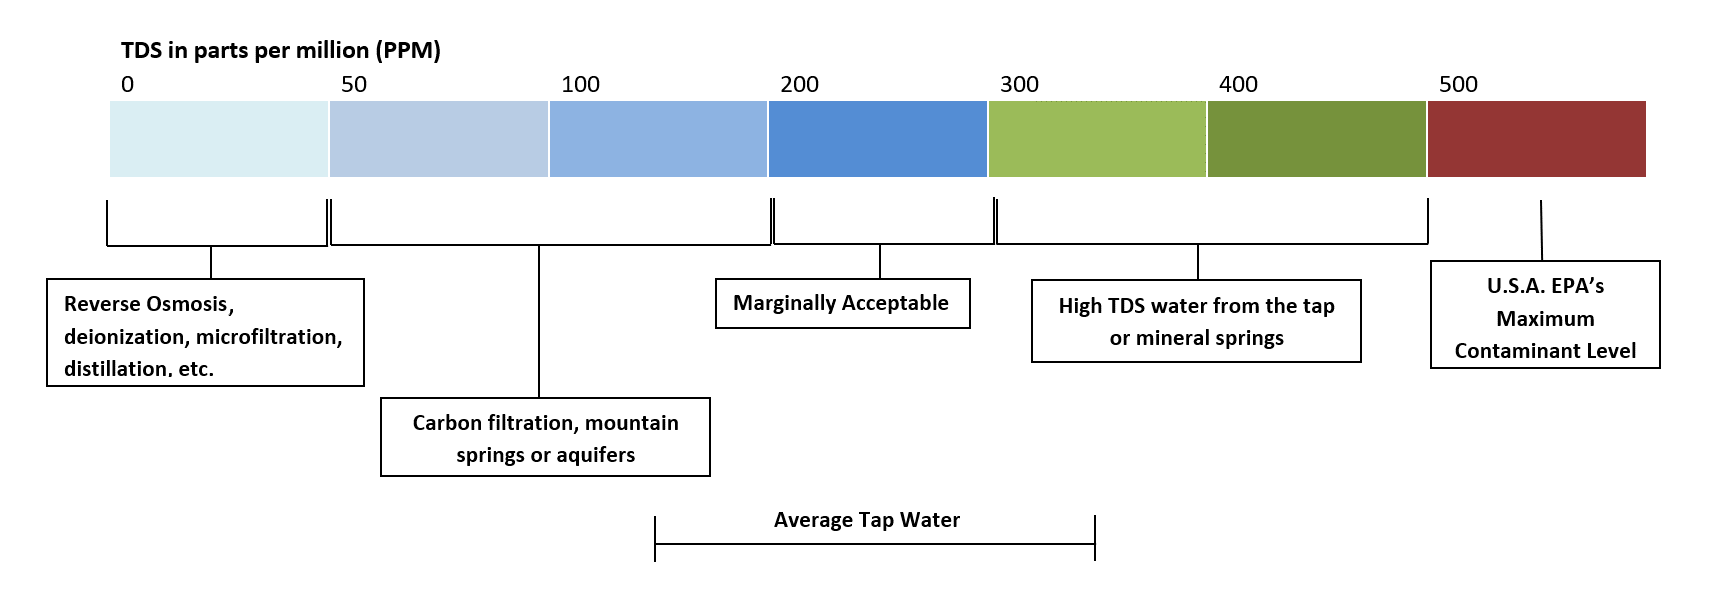

Picture Credit: https://www.masterwater.com
# ***It can be concluded that there is no significant difference between the potable and non-potable samples of the water regarding solids.Both are almost overlapping.***

(iv) Chloramines -A class of chemical substances known as chloramines is composed of chlorine and ammonia. Monochloramine is the specific form of chloramine used to disinfect drinking water. It is added to water at levels that are effective at killing bacteria while maintaining water safety.

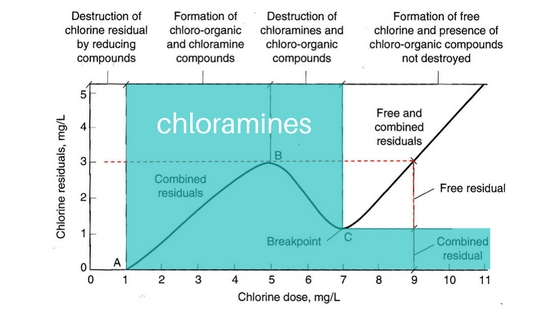

Source of the image:https://nextgws.com/chloramine-simplified-chemistry-lesson/

# ***There is no signinficant difference among the potable and non-potable values of chloramines is found ,only the density for non-potable samples is more between 5mg/L to 8mg/L  which signifies that is in safe range for drinking.***

(v) Sulfate -Sulfates are organic compounds that are naturally present in rocks, soil, and minerals. They can be found in the surrounding air, groundwater, vegetation, and food. Sulfate is mostly used in the chemical industry for commercial purposes. The amount of sulphate in saltwater is around 2,700 mg/L. The majority of freshwater sources have values between 3 and 30 mg/L, while certain regions have substantially higher levels (1000 mg/L).

# ***The sulfate range of acceptable values changes depending on type of water i.e river or sea water,as there is no adequate information regarding type of water.This cannot be considered as factor affecting potability of water in this data.***

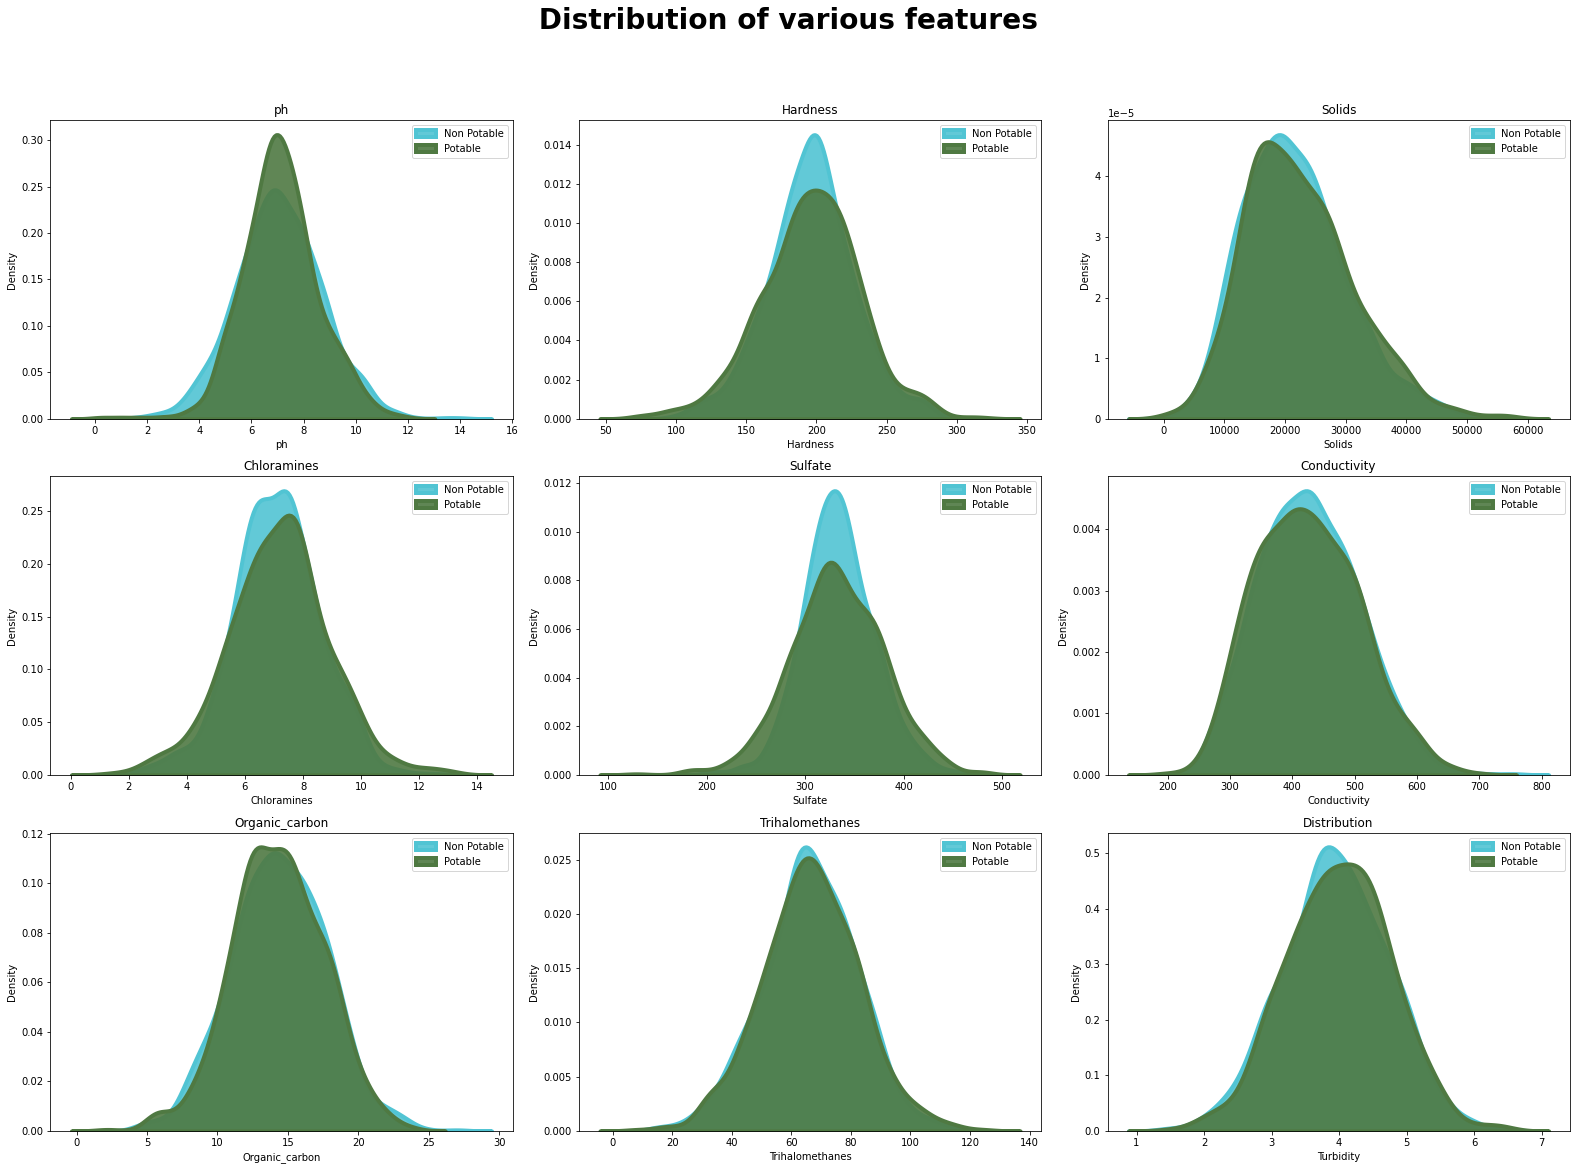

In [17]:
#the above violon and boxplots didnt show signifance difference among values thats why moving ahead to kde plot
non_potable = Water_potability.query("Potability == 0")
potable = Water_potability.query("Potability == 1")

plt.figure(figsize = (22,15))
#defining size of the figure
for ax, col in enumerate(Water_potability .columns[:9]):
    plt.subplot(3,3, ax + 1)
    #forming subplot matrix of 3*3 size
    plt.title(col)
    #keeping tittle of the feature as tittle
    plotting = sns.kdeplot(x = non_potable[col], label = "Non Potable",fill=True, common_norm=False, color="#51C4D3",alpha=.9, linewidth=4)
    #making visualization for non-potable data with blue colour
    plotting = sns.kdeplot(x = potable[col], label = "Potable",fill=True, common_norm=False, color="#4F7942",alpha=.9, linewidth=4)
    #making visualization for potable data with green colour
    plt.legend()
plt.tight_layout()
plt.title('Distribution')
plotting.figure.suptitle(' Distribution of various features ',y=1.08, size = 28, weight='bold');

(vi) Conductivity - The ability of water to conduct an electrical current is measured by its conductivity. Conductivity rises with salinity because dissolved salts and other inorganic compounds carry electrical current. Oil and other organic materials have a low electrical conductivity in water because they do not conduct electricity well. Temperature also has an impact on conductivity; the higher the conductivity, the warmer the water.

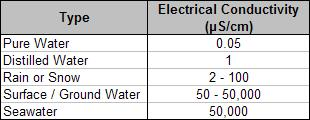

Source of the image:https://stemsoup.wordpress.com/tag/electrical-conductivity/
# ***Majority of the samples have conductivity similar to that of range for surface or ground water.However,its not just regarding water alone.The impurities present in that water as well as temperature also affects its value.So it needs multi-dimensional view for analysis.Eventhough ,it would be highly impossible to predict.So,the affect of conductivity on potability may not be certain because it depended upon multiple factors.***

(vii) Organic Carbon -Rainfall runoff introduces organic pollutants (natural organic compounds, insecticides, herbicides, and other agricultural chemicals) to streams. Organic pollutants are also present in wastewater from both domestic and industrial sources in varying degrees. Industrial organic wastes could reach streams as a result of unintentional spills or leaks. Some of the contaminants might not be entirely eliminated by the treatment procedures; as a result, they might cause issues for the sources of drinking water. The amount of organic matter in a watercourse must be known.

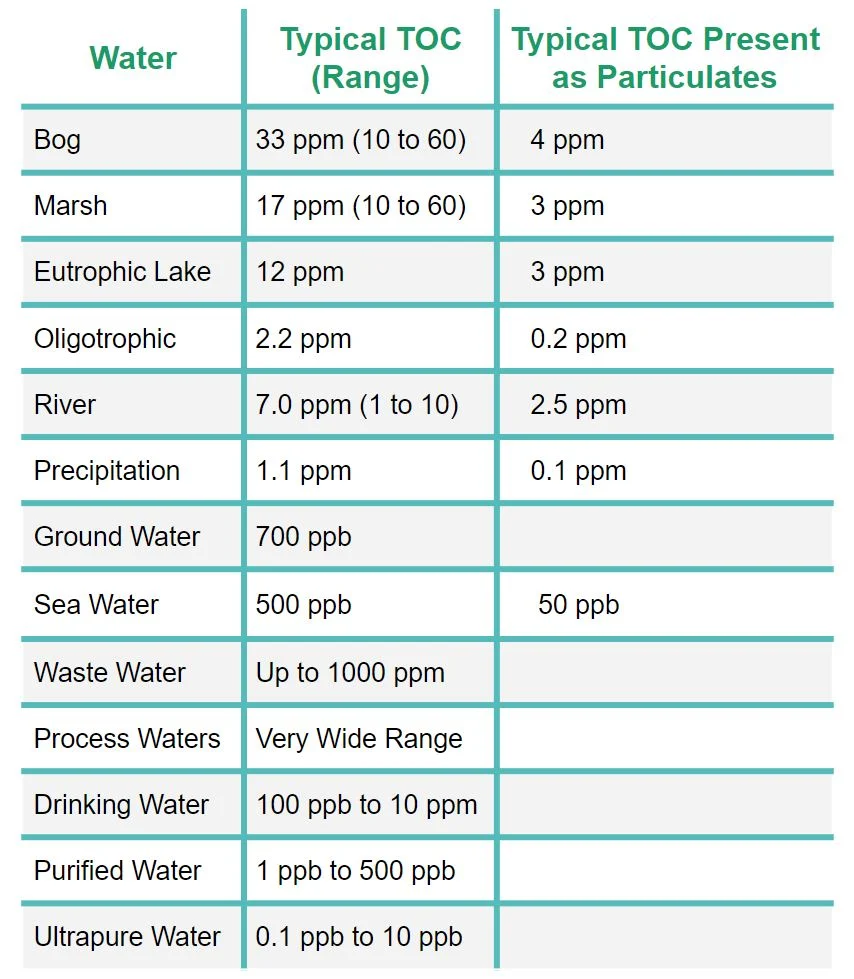

Source of the image -https://www.elgalabwater.com/blog/total-organic-carbon-toc
# ***It can be seen that,majority of the samples lies in the range of 5-22 ppm from the plots.So,these samples are of river water as well as marsh water(marsh, type of wetland ecosystem characterized by poorly drained mineral soils and by plant life dominated by grasses).These cannot alone affect potability of water ,however few people from some traditions still drinking river and underground water as well.***

(viii) Trihalomethanes -Chemicals called THMs can be discovered in chlorine-treated water. The amount of organic matter in the water, the quantity of chlorine needed to treat the water, and the temperature of the treated water all affect the concentration of THMs in drinking water. THM concentrations up to 80 ppm are regarded as safe for drinking water.

# ***The pre and post sample values of 80ppm are overlapping with potable as well as non-potable water.So,It is not a much significant factor on potability of water to categorise.***

(ix) Turbidity -Turbidity is a metric used to assess a liquid's relative clarity. It is a measurement of the amount of light scattered by the components of water when light is shone through a water sample. It is an optical property of water. The turbidity increases with the intensity of scattered light. Clay, silt, extremely minute inorganic and organic materials, algae, dissolved coloured organic compounds, plankton, and other microscopic organisms are some of the substances that make water turbid.the value of less than 5 NTU considered as the safe for drinking water.

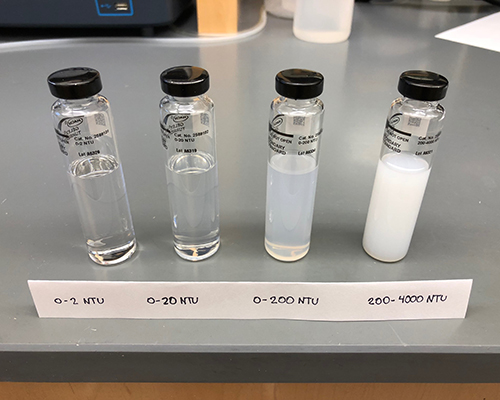

source of the image-https://www.montana.edu/barleybreeding/learning-center/learn-about-testing/turbidimeter.html

# ***Here also,the potable and non-potable samples of water are overalapping.It again reminds us that its not just remains on one factor to determine potability of water.***

# Ph level in water

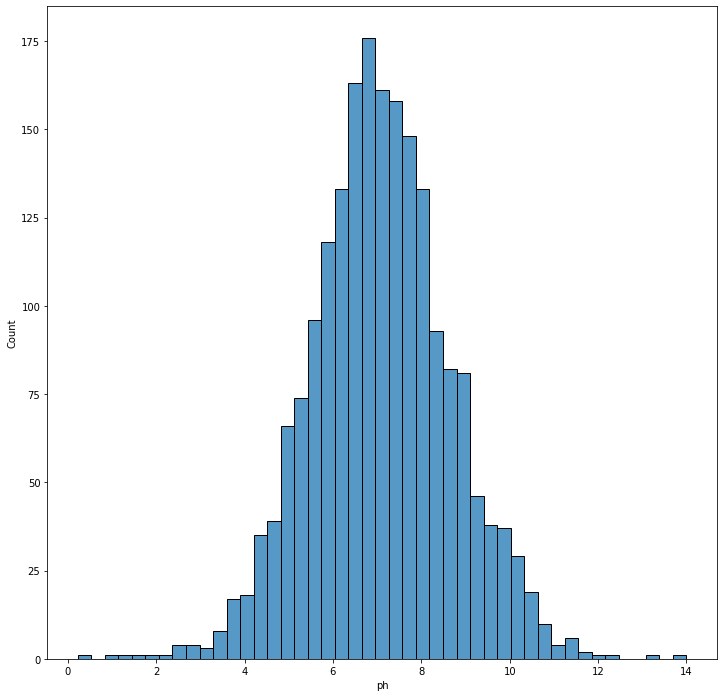

In [18]:
plt.figure(figsize = (12,12))
sns.histplot(Water_potability['ph'])
#just additional graphs for clear understanding,valuable insights are found already from above kde,violon and box plots.

# Sulphate level in water

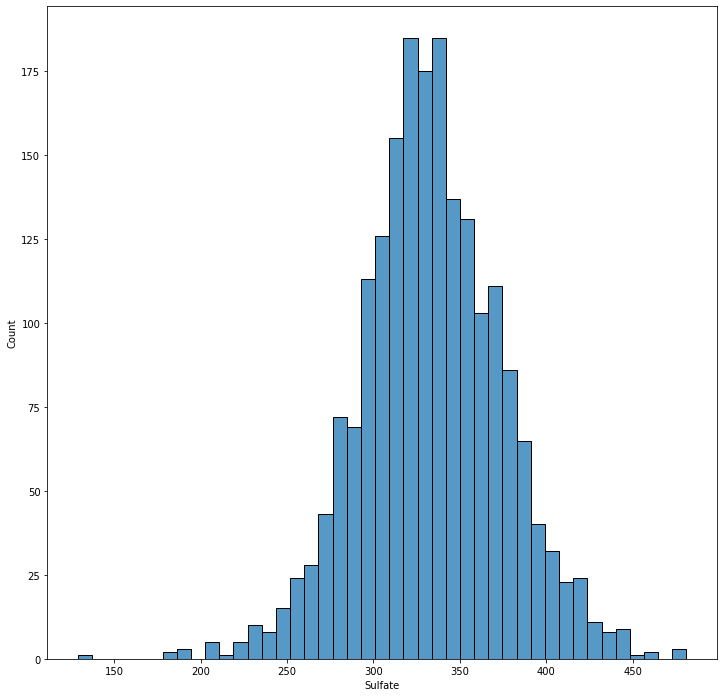

In [19]:
plt.figure(figsize = (12,12))
sns.histplot(Water_potability['Sulfate'])
#just additional graphs for clear understanding,valuable insights are found already from above kde,violon and box plots.

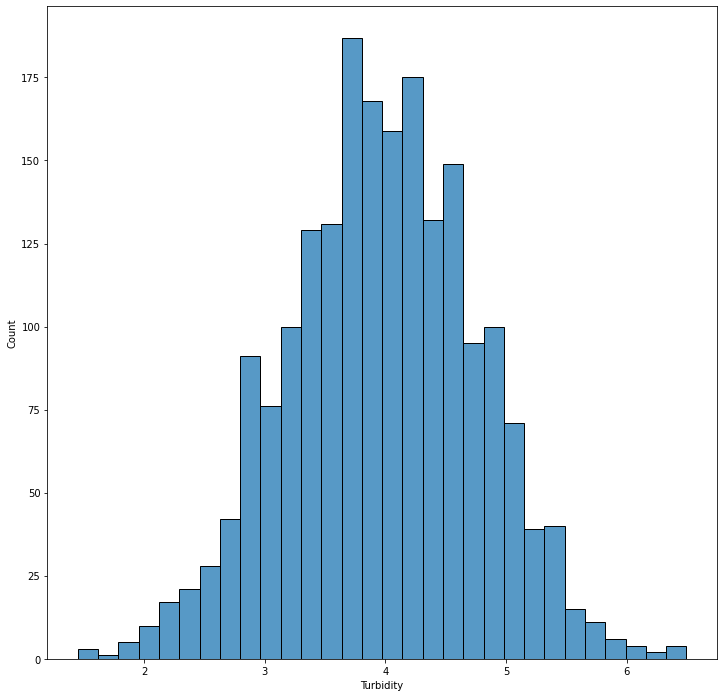

In [20]:
plt.figure(figsize = (12,12))
sns.histplot(Water_potability['Turbidity'])
#just additional graphs for clear understanding,valuable insights are found already from above kde,violon and box plots.

In [21]:
phMean_0 = Water_potability[Water_potability['Potability'] == 0]['ph'].mean(skipna=True)
Water_potability.loc[(Water_potability['Potability'] == 0) & (Water_potability['ph'].isna()), 'ph'] = phMean_0
phMean_1 = Water_potability[Water_potability['Potability'] == 1]['ph'].mean(skipna=True)
Water_potability.loc[(Water_potability['Potability'] == 1) & (Water_potability['ph'].isna()), 'ph'] = phMean_1

SulfateMean_0 = Water_potability[Water_potability['Potability'] == 0]['Sulfate'].mean(skipna=True)
Water_potability.loc[(Water_potability['Potability'] == 0) & (Water_potability['Sulfate'].isna()), 'Sulfate'] = SulfateMean_0
SulfateMean_1 = Water_potability[Water_potability['Potability'] == 1]['Sulfate'].mean(skipna=True)
Water_potability.loc[(Water_potability['Potability'] == 1) & (Water_potability['Sulfate'].isna()), 'Sulfate'] = SulfateMean_1

TrihalomethanesMean_0 = Water_potability[Water_potability['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
Water_potability.loc[(Water_potability['Potability'] == 0) & (Water_potability['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_0
TrihalomethanesMean_1 = Water_potability[Water_potability['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
Water_potability.loc[(Water_potability['Potability'] == 1) & (Water_potability['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_1

In [22]:
X = Water_potability.drop('Potability', axis=1)
y = Water_potability.Potability

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(1608, 9) (403, 9)


# Model Development 

In [23]:
models = [LogisticRegression(), LinearSVC(), RandomForestClassifier(), DecisionTreeClassifier()]
model_names = ['LogisticRegression', 'LinearSVM', 'RandomForestClassifier', 'DecisionTree']
acc = []

In [24]:
for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred, y_test))

In [25]:
models = {'Modelling Algo': model_names, 'Accuracy': acc}

In [26]:
models_score = pd.DataFrame(models)

In [27]:
models_score

,Modelling Algo,Accuracy
0,LogisticRegression,0.573201
1,LinearSVM,0.575682
2,RandomForestClassifier,0.650124
3,DecisionTree,0.622829


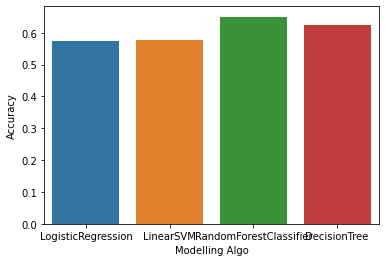

In [28]:
sns.barplot(x='Modelling Algo', y='Accuracy', data=models_score)

In [29]:
models_score

,Modelling Algo,Accuracy
0,LogisticRegression,0.573201
1,LinearSVM,0.575682
2,RandomForestClassifier,0.650124
3,DecisionTree,0.622829


In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68       231
           1       0.57      0.50      0.53       172

    accuracy                           0.62       403
   macro avg       0.61      0.61      0.61       403
weighted avg       0.62      0.62      0.62       403



# **CONCLUSION -**

***WHICH QUALITIES  OF WATER ARE  MAKING IT UNABLE TO DRINK? WHAT ARE IMPACTS OF EACH QUALITY? ***

# Solution :  ***It can be concluded that the potability of water is not just limited to exceeding limit of one particular quality of water.The potability is a mixed reaction of many factors.It is highly unpredictable based on only one value.But with lot of more samples,more insights can be drawn.Those samples should be classified under different regions as well as traditions of people.Because ,some people in few cultures still drinking under-ground water and river water.Out of all ,Turbidity,which can be visually seen and pH value which can be seen by taste are most influencing factors for determining potability of water.Because,visually seeing and tasting impacts more for a human being rather than determining any labaratory tests.***

# Four Machine learning models are built to predict the potability of water and their performance is compared. ***bold text***

